In [1]:
import pandas as pd
import numpy as np

In [2]:
Prices_raw= pd.read_csv('../data/Prices.csv', encoding='utf-8',thousands=',')
Export_Import_raw = pd.read_csv('../data/Cross_Border.csv',encoding='utf-8',thousands=',')
Consumption_raw = pd.read_csv('../data/Cosumption.csv',encoding='utf-8',thousands=',')
Generation_raw = pd.read_csv('../data/Generation.csv',encoding='utf-8',thousands=',')

In [3]:
Prices_raw['Start'] = Prices_raw['Unnamed: 0']
Consumption_raw['Start'] = Consumption_raw['Unnamed: 0']
Generation_raw['Start'] = Generation_raw['Unnamed: 0']
Export_Import_raw['Start'] = Export_Import_raw['Unnamed: 0']

In [4]:
Prices_raw['Start'] = pd.to_datetime(Prices_raw['Start'])
Prices_raw = Prices_raw.set_index('Start')
Export_Import_raw['Start'] = pd.to_datetime(Export_Import_raw['Start'])
Export_Import_raw = Export_Import_raw.set_index('Start')
Consumption_raw['Start'] = pd.to_datetime(Consumption_raw['Start'])
Consumption_raw = Consumption_raw.set_index('Start')
Generation_raw['Start'] = pd.to_datetime(Generation_raw['Start'])
Generation_raw = Generation_raw.set_index('Start')

In [5]:
Generation_raw.rename(inplace= True, columns={
    'Biomass [MWh] Original resolutions':'Biomass',
       'Hydropower [MWh] Original resolutions':'Hydropower',
       'Wind offshore [MWh] Original resolutions':'Wind_offshore',
       'Wind onshore [MWh] Original resolutions':'Wind_onshore',
       'Photovoltaics [MWh] Original resolutions':'Photovoltaics',
       'Other renewable [MWh] Original resolutions':'Other_renewable',
       'Nuclear [MWh] Original resolutions':'Nuclear',
       'Lignite [MWh] Original resolutions':'Lignite',
       'Hard coal [MWh] Original resolutions':'Hard_coal',
       'Fossil gas [MWh] Original resolutions':'Fossil_gas',
       'Hydro pumped storage [MWh] Original resolutions':'Hydro_pumped_storage',
       'Other conventional [MWh] Original resolutions':'Other_conventional',
         'Sum [MWh]':'Generation_sum'
})



In [6]:
Consumption_raw.rename(inplace=True, columns={
    'Total (grid load) [MWh] Original resolutions':'Total_sum',
       'Residual load [MWh] Original resolutions':'Residual',
       'Hydro pumped storage [MWh] Original resolutions':'Hydro'
})


In [7]:
Prices_raw.rename(inplace=True, columns={
    'Germany/Luxembourg [€/MWh] Calculated resolutions':'Germany_Luxembourg',
       'Belgium [€/MWh] Calculated resolutions':'Belgium',
       'France [€/MWh] Calculated resolutions':'France',
       'Austria [€/MWh] Calculated resolutions':'Austria',
       'Poland [€/MWh] Calculated resolutions':'Poland',
       'Czech Republic [€/MWh] Calculated resolutions':'Czech_Republic',
       'Switzerland [€/MWh] Calculated resolutions':'Switzerland',
})

In [8]:
countries = ['Belgium', 'France', 'Poland', 'Austria', 'Czech Republic', 'Switzerland']
all_contries = countries + ['Netherlands', 'Denmark', 'Luxembourg', 'Sweden', 'Norway']

Export_Import_raw['Export_sum'] = 0
Export_Import_raw['Import_sum'] = 0

for country in countries:
    export_col = f'{country} (export) [MWh] Original resolutions'
    import_col = f'{country} (import) [MWh] Original resolutions'
    sum_col = f'{country.replace(" ", "_")}_sum'
    Export_Import_raw[sum_col] = Export_Import_raw[export_col] + Export_Import_raw[import_col]



for contries in all_contries:
    export_cols = f'{contries} (export) [MWh] Original resolutions'
    import_cols = f'{contries} (import) [MWh] Original resolutions'

    Export_Import_raw['Export_sum'] += Export_Import_raw[export_cols]
    Export_Import_raw['Import_sum'] += Export_Import_raw[import_cols]

# Calculate the remainder sum
export_import_sums = [f'{country.replace(" ", "_")}_sum' for country in countries]
Export_Import_raw['Remainder_sum'] = Export_Import_raw['Sum [MWh]'] - Export_Import_raw[export_import_sums].sum(axis=1)


In [9]:
Export_Import_raw.rename(inplace=True, columns={
    'Sum [MWh]':'Export_Import_sum'
})

Drop the other columns: 


In [10]:
Generation = Generation_raw.drop(columns=['Unnamed: 0','End date'])
Consumption = Consumption_raw.drop(columns= ['Unnamed: 0','End date'])
Prices = Prices_raw.drop(columns=
        ['Unnamed: 0','End date','Denmark 1 [€/MWh] Calculated resolutions',
       'Denmark 2 [€/MWh] Calculated resolutions',
       'Netherlands [€/MWh] Calculated resolutions',
       'Norway 2 [€/MWh] Calculated resolutions',
       'Sweden 4 [€/MWh] Calculated resolutions', 
       'Northern Italy [€/MWh] Calculated resolutions',
       'Slovenia [€/MWh] Calculated resolutions',
       'Hungary [€/MWh] Calculated resolutions'
       ])
Export_Import = Export_Import_raw.drop(columns=
        ['Unnamed: 0','End date', 'Netherlands (export) [MWh] Original resolutions',
       'Netherlands (import) [MWh] Original resolutions',
       'Switzerland (export) [MWh] Original resolutions',
       'Switzerland (import) [MWh] Original resolutions',
       'Denmark (export) [MWh] Original resolutions',
       'Denmark (import) [MWh] Original resolutions',
       'Czech Republic (export) [MWh] Original resolutions',
       'Czech Republic (import) [MWh] Original resolutions',
       'Luxembourg (export) [MWh] Original resolutions',
       'Luxembourg (import) [MWh] Original resolutions',
       'Sweden (export) [MWh] Original resolutions',
       'Sweden (import) [MWh] Original resolutions',
       'Austria (export) [MWh] Original resolutions',
       'Austria (import) [MWh] Original resolutions',
       'France (export) [MWh] Original resolutions',
       'France (import) [MWh] Original resolutions',
       'Poland (export) [MWh] Original resolutions',
       'Poland (import) [MWh] Original resolutions',
       'Norway (export) [MWh] Original resolutions',
       'Norway (import) [MWh] Original resolutions',
       'Belgium (export) [MWh] Original resolutions',
       'Belgium (import) [MWh] Original resolutions'
       ])

In [11]:
Import_Export = Export_Import*-1

Import_Export.rename(columns={'Export_Import_sum':'Import_Export_sum'}, inplace=True)
Generation = pd.concat([Generation,Import_Export], axis=1)

In [12]:
Generation['Total_sum'] = Generation['Generation_sum']+Generation['Import_Export_sum']

| Generation           |       | Consumption          |       | Prices             |         | Export_Import (+/-)**    |       |
|----------------------|-------|----------------------|-------|--------------------|---------|-----------------|-------|
|                      |       |                      |       |                    |         |                 |       |
| Column               | Unit  | Column               | Unit  | Column             | Unit    | Column         | Unit  |
| Biomass              | [MWh] | Total_sum                | [MWh] | Germany_Luxembourg | [€/MWh] | Export_Import_sum             | [MWh] |
| Hydropower           | [MWh] | Residual             | [MWh] | Belgium            | [€/MWh] | Belgium_sum     | [MWh] |
| Wind_offshore        | [MWh] | Hydro_pumped_storage | [MWh] | France             | [€/MWh] | France_sum      | [MWh] |
| Wind_onshore         | [MWh] |                      |       | Poland             | [€/MWh] | Poland_sum      | [MWh] |
| Photovoltaics        | [MWh] |                      |       | Austria            | [€/MWh] | Austrian_sum    | [MWh] |
| Other_renewable      | [MWh] |                      |       | Switzerland        | [€/MWh] | Switzerland_sum | [MWh] |
| Nuclear              | [MWh] |                      |       | Czech_Republic     | [€/MWh] |Czech_Republic_sum| [MWh] |
| Lignite              | [MWh] |                      |       |                    |         | Export_sum                | [MWh]      |
| Hard_coal            | [MWh] |                      |       |                    |         | Import_sum                |  [MWh]     |
| Fossil_gas           | [MWh] |                      |       |                    |         |                 |       |
| Hydro_pumped_storage | [MWh] |                      |       |                    |         |                 |       |
| Other_conventional   | [MWh] |                      |       |                    |         |                 |       |
| Generation_sum                  | [MWh] |                      |       |                    |         |                 |       |
| Import_Export_sum*   | [MWh] |                      |       |                    |         |                 |       |
| Belgium_sum   | [MWh] |                      |       |                    |         |                 |       |
| Export_sum   | [MWh] |                      |       |                    |         |                 |       |
| Import_sum   | [MWh] |                      |       |                    |         |                 |       |
| France_sum   | [MWh] |                      |       |                    |         |                 |       |
| Poland_sum   | [MWh] |                      |       |                    |         |                 |       |
| Austrian_sum   | [MWh] |                      |       |                    |         |                 |       |
| Switzerland_sum   | [MWh] |                      |       |                    |         |                 |       |
| Chzech_Republic_sum   | [MWh] |                      |       |                    |         |                 |       |
| Total_sum   | [MWh] |                      |       |                    |         |                 |       |
|    |  |                      |       |                    |         |                 |       |
| *Import_Export_sum   | = | Export_Import_sum x (-1)                     |       |                    |         | **Exports are positive, Imports negative       |       |
| All country sums are inverted   |  |                      |       |                    |         |                 |       |

## Trend-Seasonal Decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import month_plot


def decomposition_df(df, column, frequency='MS',aggregation_method='sum', type='additive'):
    '''
    Process a dataframe to decompose its time series data and add trend, seasonal, residual, and trend+seasonal columns.
    
    Parameters:
    - df: pandas DataFrame containing the data to be processed
    - column: the column to be processed in the dataframe
    - frequency: the frequency of the decomposition, default monthly 
        - D - daily
        - h- hourly
        - W- weekly 

        look here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
    -aggregation_method: the method of the decomposition, default sum
        -mean
        -min
        -max


    -type: the used model in the decomposition, default = additive
        - multiplicative 
    
    
    Returns:
    - df_Frequency: the processed DataFrame with additional columns
    '''
    aggregation_func = getattr(pd.DataFrame, aggregation_method)
    df_Frequency=df[[column]].resample(frequency).apply(aggregation_func)
    decompositon= seasonal_decompose(df_Frequency[column], model=type)


    df_Frequency['Trend'] = decompositon.trend
    df_Frequency['Seasonal'] = decompositon.seasonal
    df_Frequency['Residual'] = decompositon.resid
    df_Frequency['Trend+Seasonal'] = df_Frequency['Seasonal'] + df_Frequency['Trend']

    return df_Frequency


In [14]:
Prices_GER_monthly = decomposition_df(Prices, 'Germany_Luxembourg','MS','mean')
Prices_GER_weekly = decomposition_df(Prices,'Germany_Luxembourg','W', 'mean')
Prices_GER_daily = decomposition_df(Prices,'Germany_Luxembourg', 'D','mean')
Prices_GER_hourly = decomposition_df(Prices,'Germany_Luxembourg','h','mean')


Generation_monthly = decomposition_df(Generation,'Generation_sum')
Generation_weekly = decomposition_df(Generation,'Generation_sum','W')
Generation_daily = decomposition_df(Generation,'Generation_sum','D')
Generation_hourly = decomposition_df(Generation,'Generation_sum','h')

Consumption_monthly = decomposition_df(Consumption, 'Total_sum')
Consumption_weekly = decomposition_df(Consumption,'Total_sum','W')
Consumption_daily = decomposition_df(Consumption,'Total_sum', 'D')
Consumption_hourly = decomposition_df(Consumption,'Total_sum','h')

Export_Import_monthly = decomposition_df(Export_Import, 'Export_Import_sum')
Export_Import_weekly = decomposition_df(Export_Import,'Export_Import_sum','W')
Export_Import_daily = decomposition_df(Export_Import,'Export_Import_sum', 'D')
Export_Import_hourly = decomposition_df(Export_Import,'Export_Import_sum','h')

In [15]:
Prices_FRA_monthly = decomposition_df(Prices, 'France', 'MS', 'mean')
Prices_Austria_monthly = decomposition_df(Prices, 'Austria', 'MS', 'mean')
Prices_Switzerland_monthly = decomposition_df(Prices, 'Switzerland', 'MS', 'mean')
Prices_Belgium_monthly = decomposition_df(Prices, 'Belgium', 'MS', 'mean')
Prices_Czech_Republic_monthly = decomposition_df(Prices, 'Czech_Republic', 'MS', 'mean')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Price

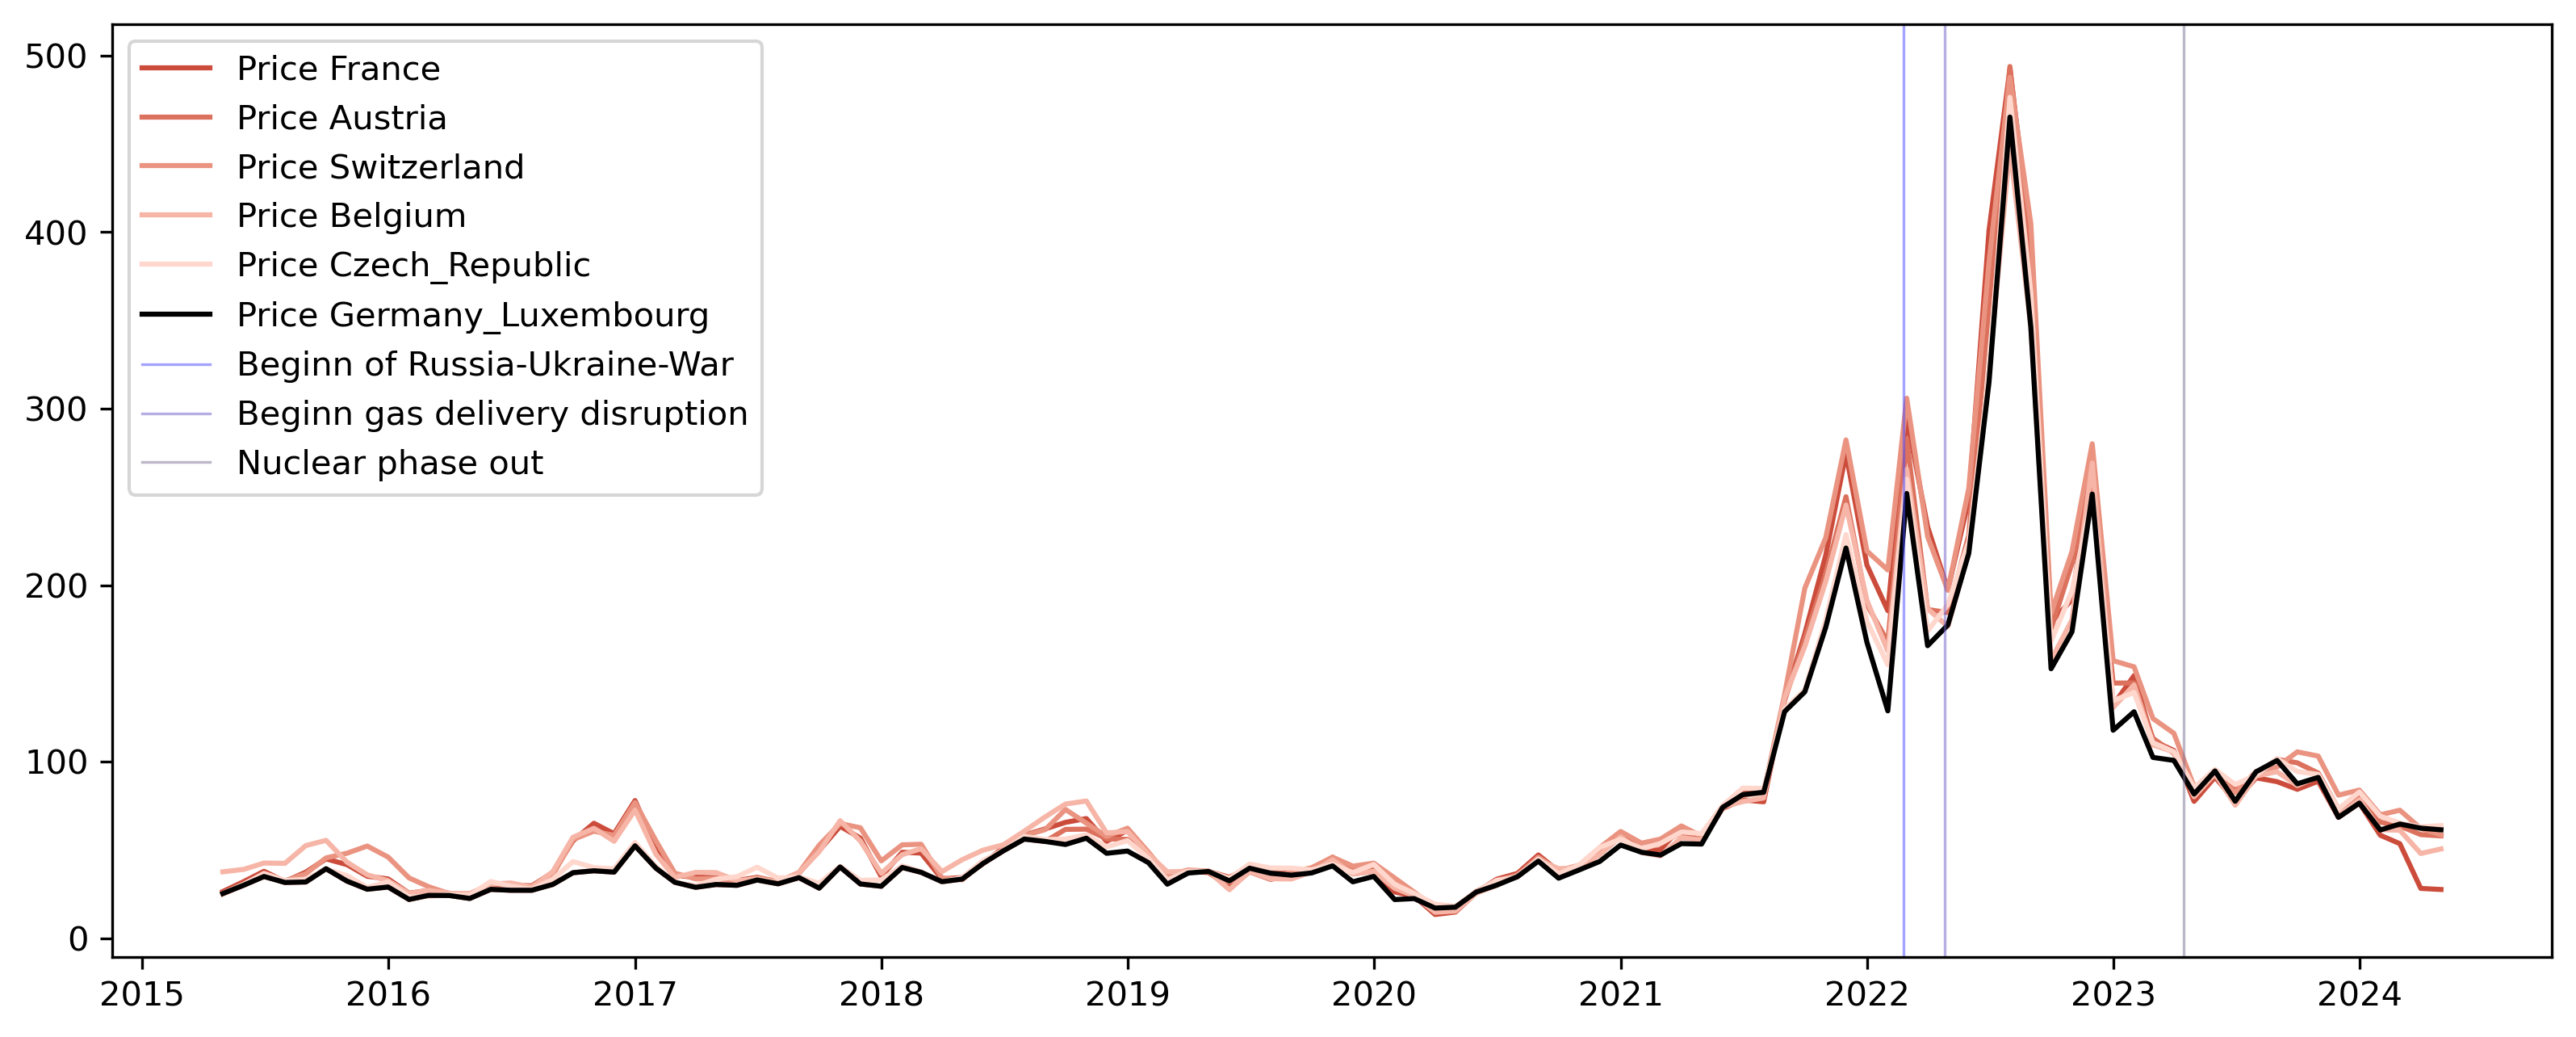

In [17]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_FRA_monthly['France'], label = 'Price France',color='#cc4c3c')
plt.plot(Prices_Austria_monthly['Austria'], label = 'Price Austria', color='#dc715d')
plt.plot(Prices_Switzerland_monthly['Switzerland'], label = 'Price Switzerland', color='#ea9380')
plt.plot(Prices_Belgium_monthly['Belgium'], label = 'Price Belgium', color='#f6b5a6')
plt.plot(Prices_Czech_Republic_monthly['Czech_Republic'], label = 'Price Czech_Republic', color='#ffd7cd')
plt.plot(Prices_GER_monthly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#000000')

plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()


In [328]:
Inflation_data = pd.read_csv('../data/prc_hicp_midx__custom_11891216_linear.csv')

Inflation_data['coicop'].replace('CP00', 'All-items', inplace=True)
Inflation_data['coicop'].replace('CP0451', 'Electricity', inplace=True)
Inflation_data['coicop'].replace('ELC_GAS', 'Electricity_gas_solid_fuels_heat_energy', inplace=True)

In [329]:
Inflation_data=Inflation_data.drop(index=[0,1,111,112, 222,223]) #deleting of the month march and april for all 3 categories to adjust them with our price data, note index based on Januar 2015

In [330]:
Inflation_monthly = Inflation_data.loc[:,['coicop','TIME_PERIOD','OBS_VALUE']]

Inflation_monthly['TIME_PERIOD'] = pd.to_datetime(Inflation_monthly['TIME_PERIOD'], format='%Y-%m')
Inflation_monthly.set_index('TIME_PERIOD', inplace=True)

Inflation_monthly_all_items = Inflation_monthly.loc[Inflation_monthly['coicop'] == 'All-items']
Inflation_monthly_electricity = Inflation_monthly.loc[Inflation_monthly['coicop'] == 'Electricity']

In [331]:
Inflation_motnhly_electricity= Inflation_monthly_electricity.drop(columns='coicop')
Inflation_monthly_all_items= Inflation_monthly_all_items.drop(columns='coicop')

In [332]:
Inflation_weekly_electricity = Inflation_motnhly_electricity.resample('W').ffill()
Inflation_weekly_all_items = Inflation_monthly_all_items.resample('W').ffill()

In [334]:
new_rows = pd.DataFrame(data={'OBS_VALUE':[151.27,151.27,151.27], 'TIME_PERIOD':['2024-05-12','2024-05-19','2024-05-26']})
new_rows['TIME_PERIOD'] = pd.to_datetime(new_rows['TIME_PERIOD'])
new_rows= new_rows.set_index('TIME_PERIOD')

In [335]:
new_rows2 = pd.DataFrame(data={'OBS_VALUE':[126.31,126.31,126.31], 'TIME_PERIOD':['2024-05-12','2024-05-19','2024-05-26']})
new_rows2['TIME_PERIOD'] = pd.to_datetime(new_rows2['TIME_PERIOD'])
new_rows2= new_rows2.set_index('TIME_PERIOD')

In [336]:
Inflation_weekly_electricity = pd.concat([Inflation_weekly_electricity, new_rows], axis=0)
Inflation_weekly_all_items = pd.concat([Inflation_weekly_electricity, new_rows], axis=0)

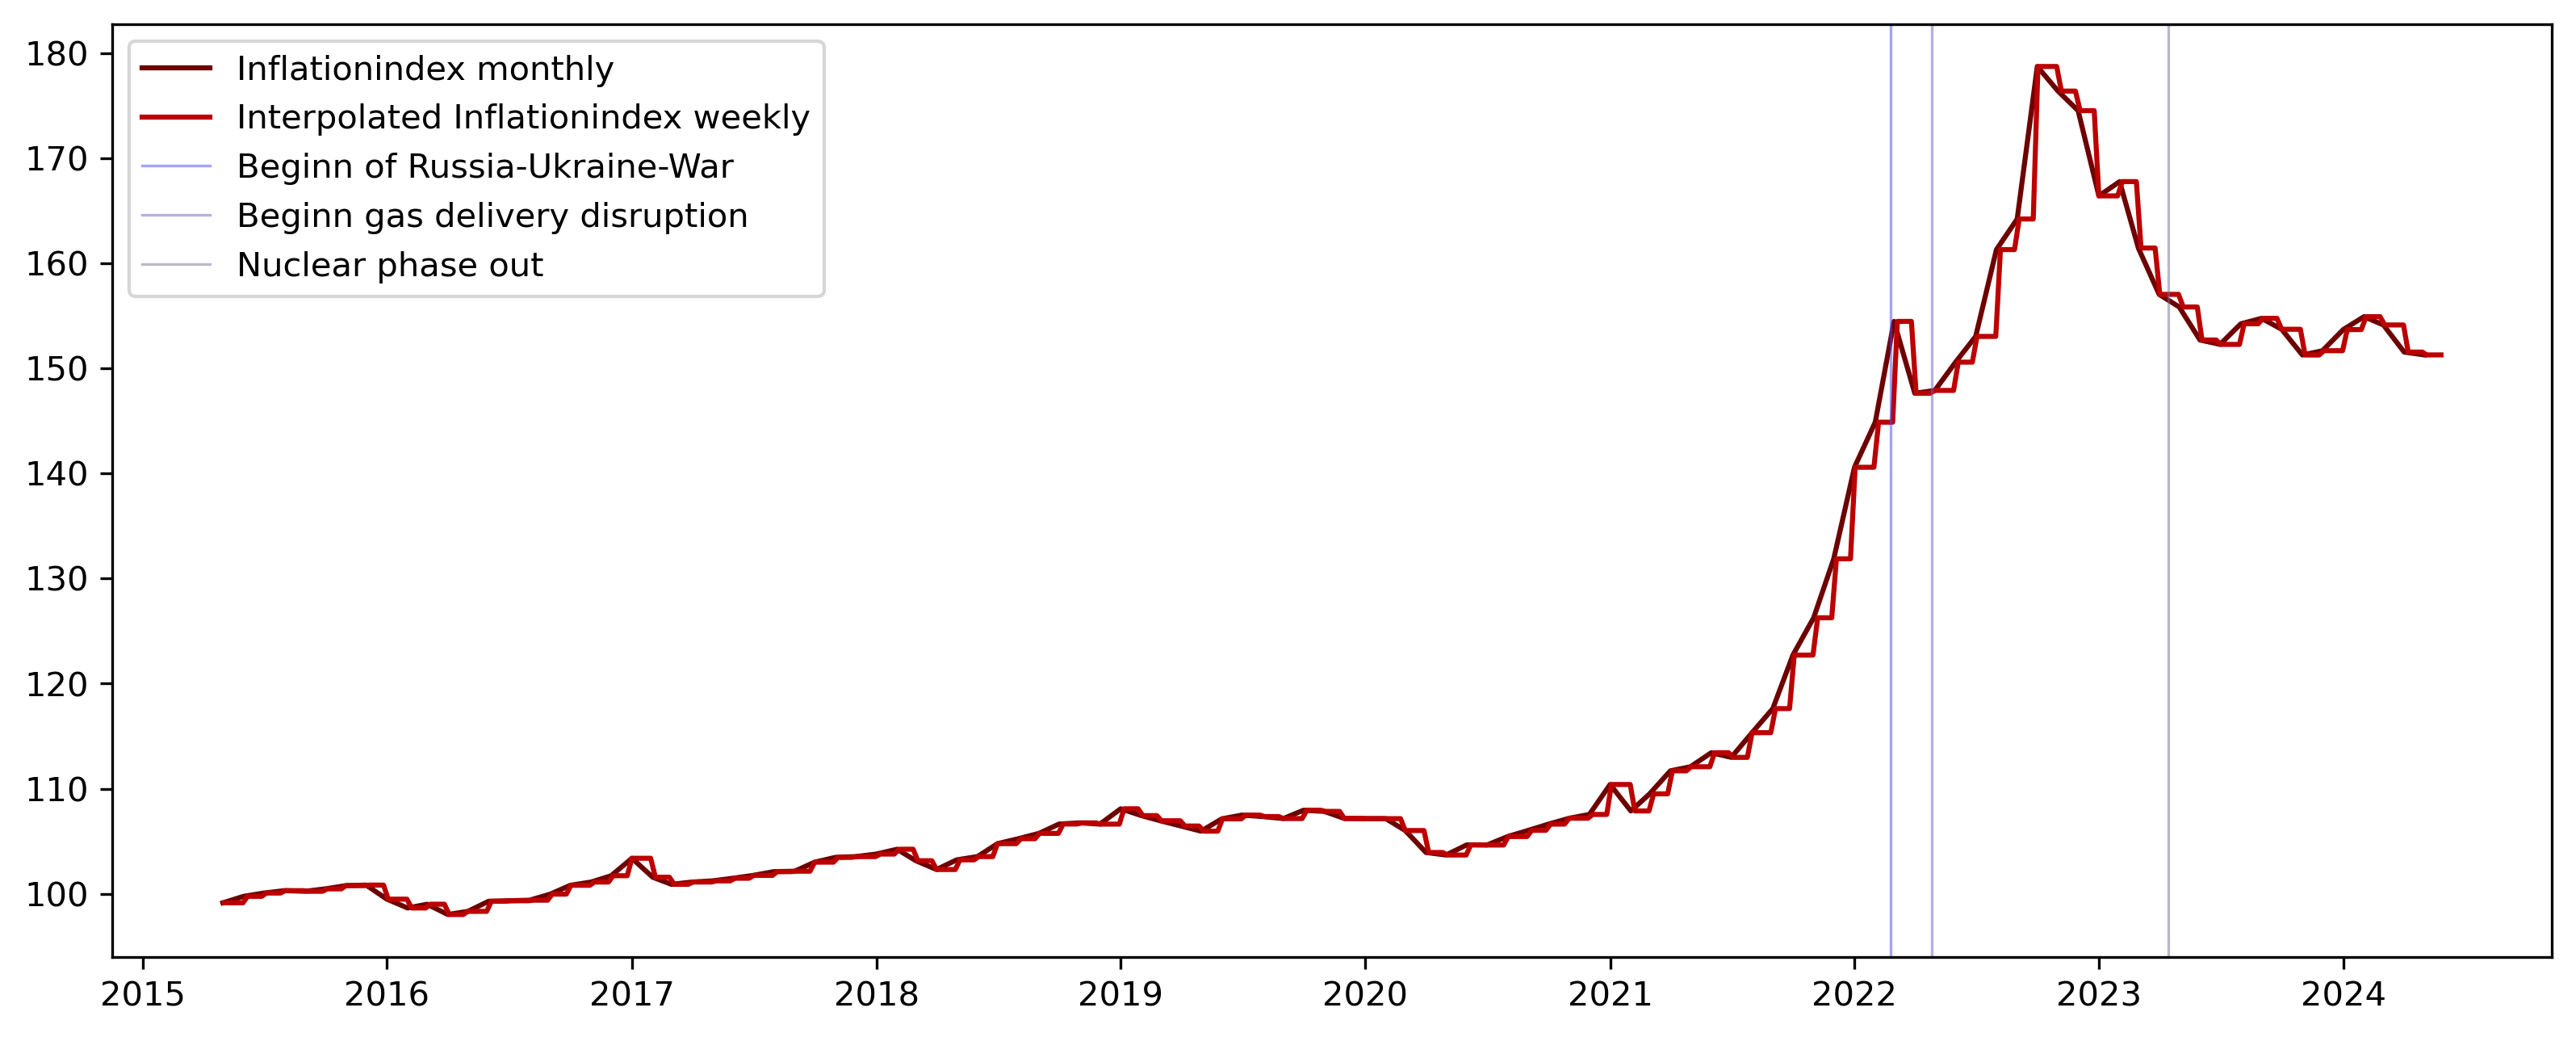

In [338]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Inflation_motnhly_electricity['OBS_VALUE'], label = 'Inflationindex monthly', color = '#6d0000')
plt.plot(Inflation_weekly_electricity['OBS_VALUE'], label = 'Interpolated Inflationindex weekly',color='#bc0000')
# plt.plot(Prices_GER_weekly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#000000')




plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

In [370]:
Prices_GER_weekly['Germany_Luxembourg_adjusted'] = Prices_GER_weekly['Germany_Luxembourg'] / Inflation_weekly_electricity['OBS_VALUE'] *100

In [371]:
decompositon= seasonal_decompose(Prices_GER_weekly['Germany_Luxembourg_adjusted'], model='additive')



Prices_GER_weekly['Trend_adjusted'] = decompositon.trend
Prices_GER_weekly['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_weekly['Residual_adjusted'] = decompositon.resid
Prices_GER_weekly['Trend+Seasonal_adjusted'] = Prices_GER_weekly['Seasonal_adjusted'] + Prices_GER_weekly['Trend_adjusted']


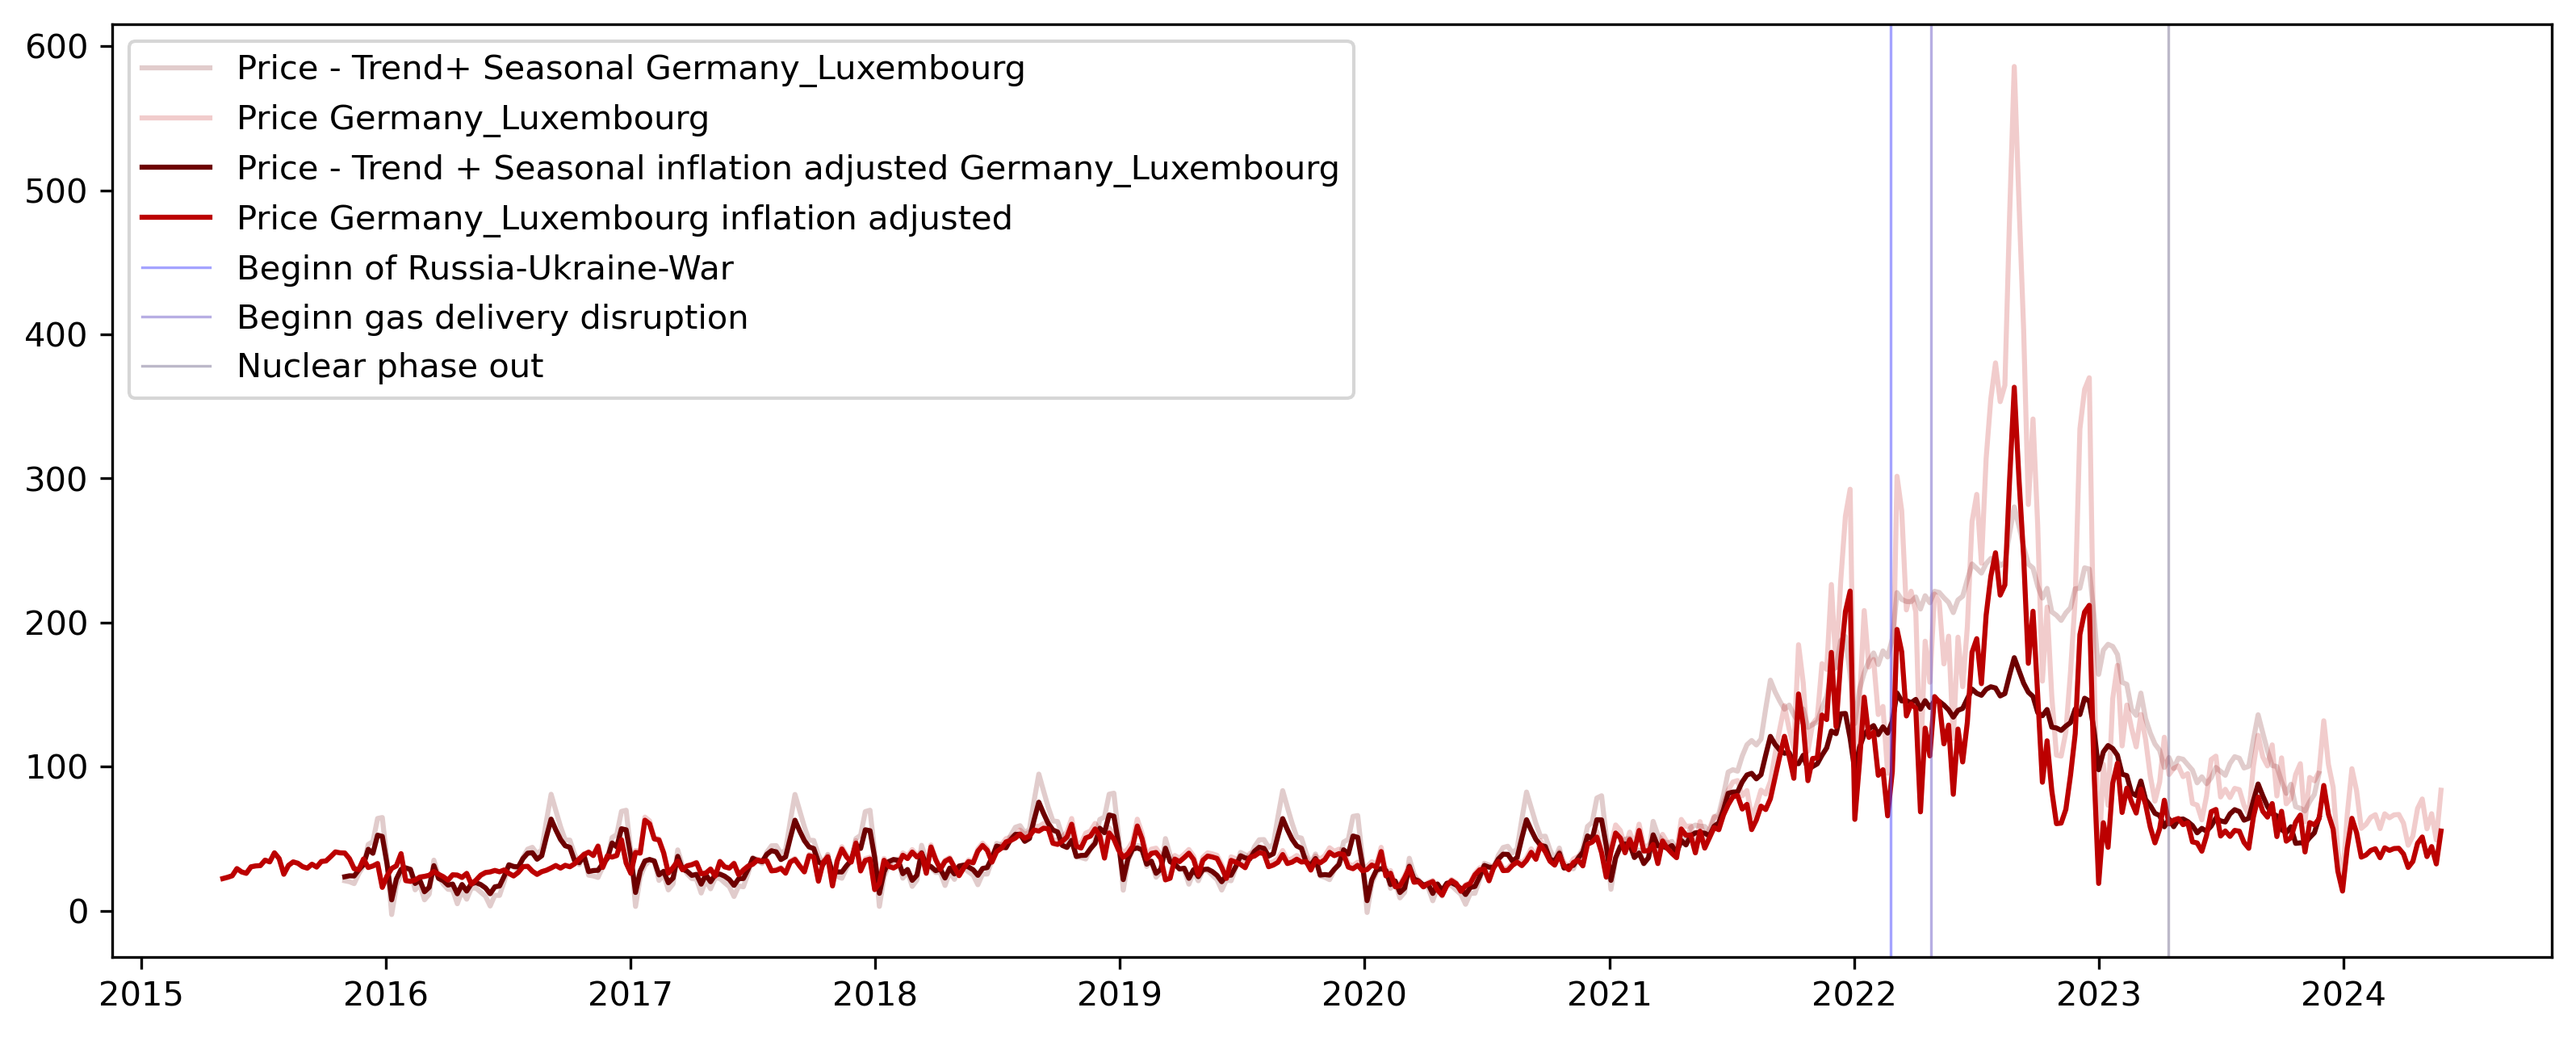

In [372]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Trend+Seasonal'], label = 'Price - Trend+ Seasonal Germany_Luxembourg', color = '#6d0000', alpha =0.2)
plt.plot(Prices_GER_weekly['Germany_Luxembourg'], label = 'Price Germany_Luxembourg',color='#bc0000', alpha =.2)
plt.plot(Prices_GER_weekly['Trend+Seasonal_adjusted'], label = 'Price - Trend + Seasonal inflation adjusted Germany_Luxembourg', color = '#6d0000')
plt.plot(Prices_GER_weekly['Germany_Luxembourg_adjusted'], label = 'Price Germany_Luxembourg inflation adjusted',color='#bc0000')





plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

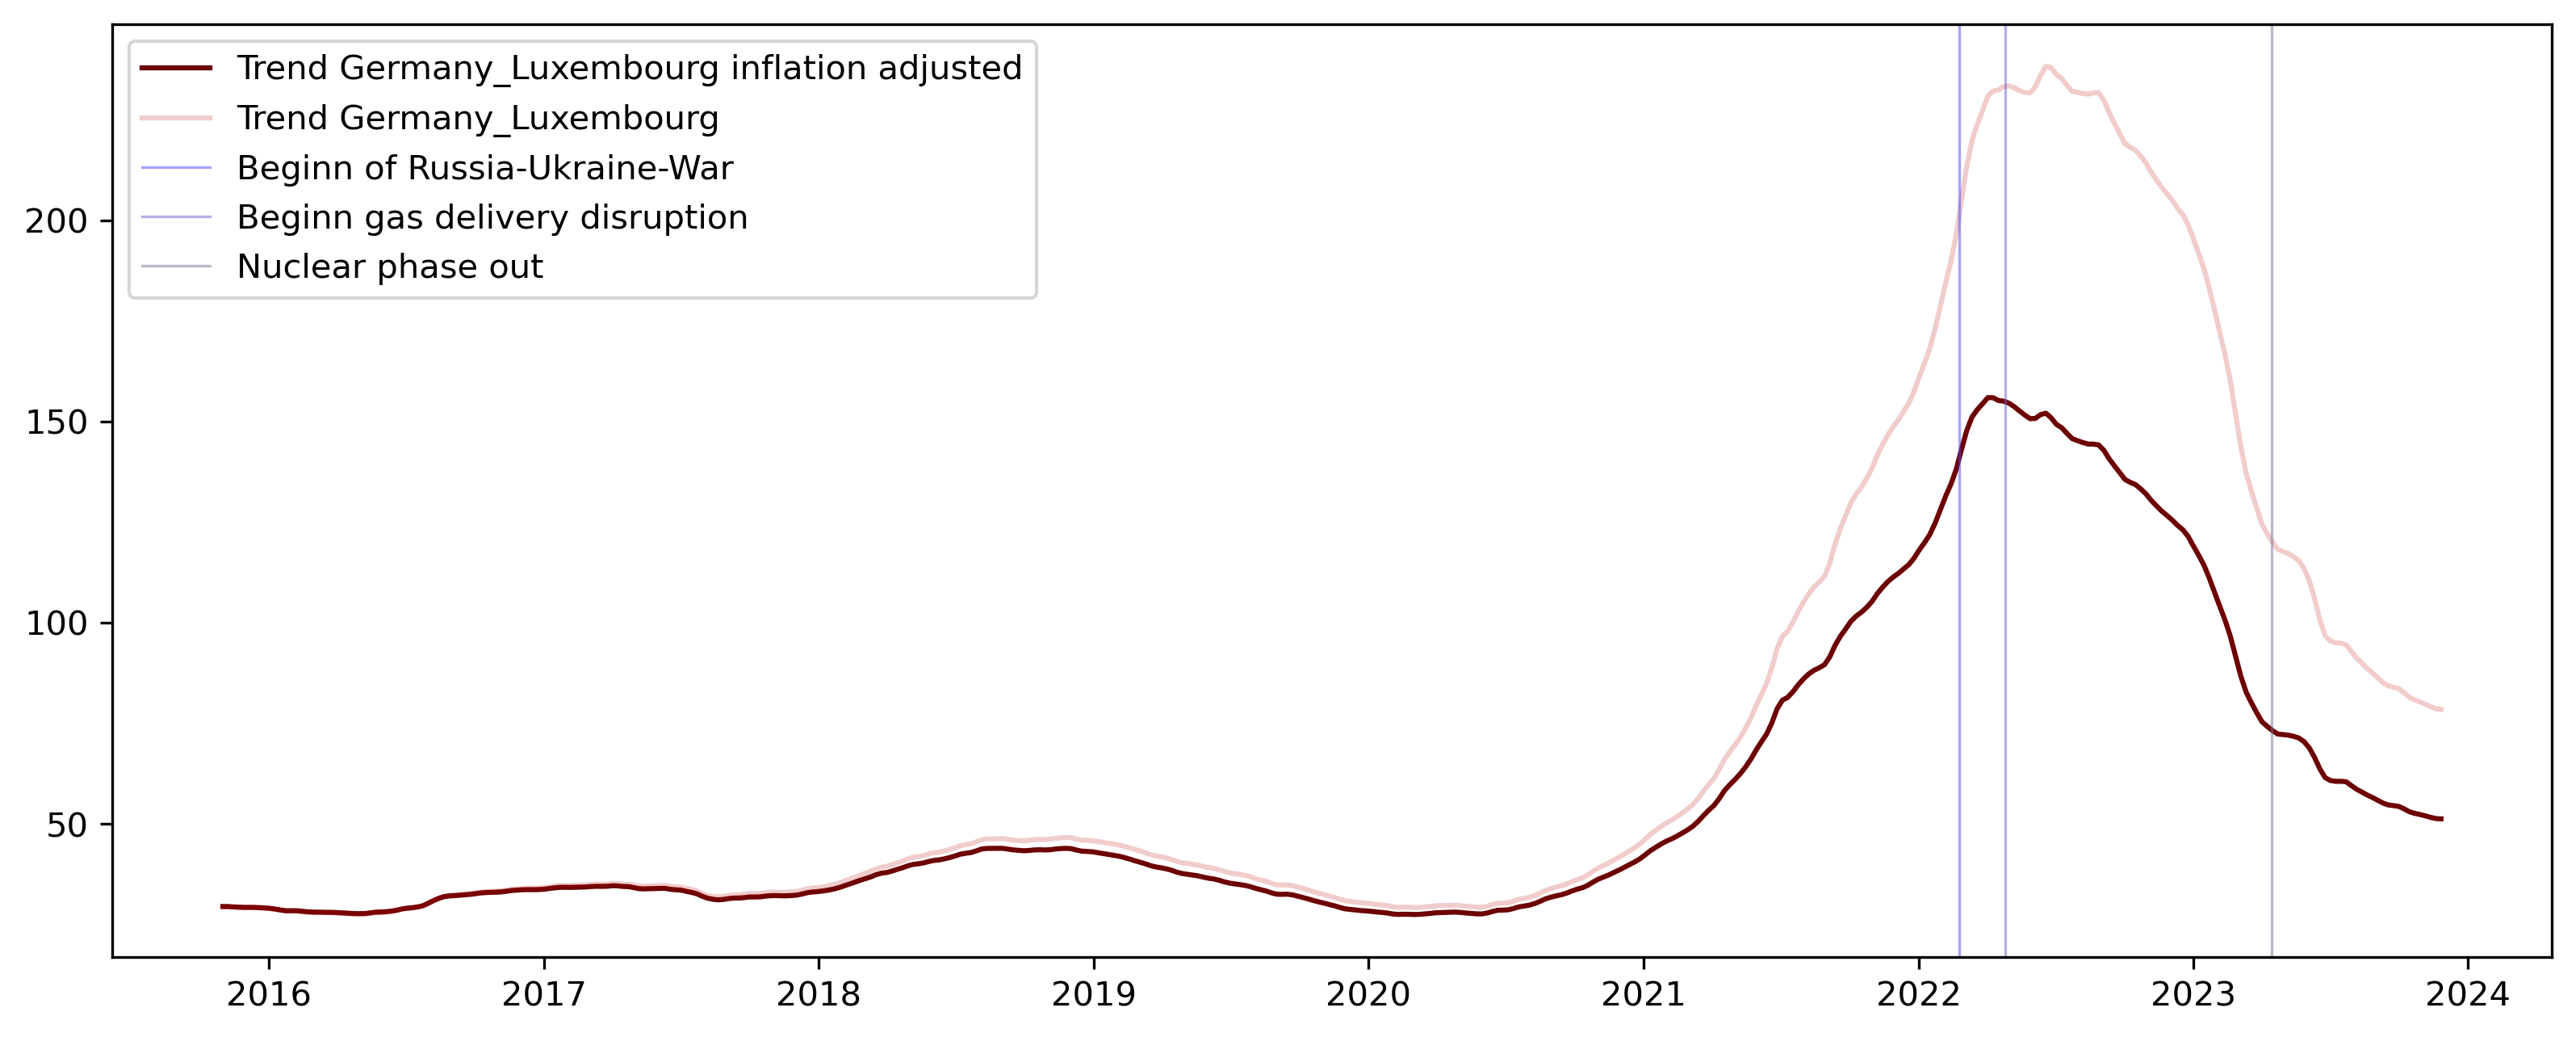

In [360]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_GER_weekly['Trend_adjusted'], label = 'Trend Germany_Luxembourg inflation adjusted', color = '#6d0000')
plt.plot(Prices_GER_weekly['Trend'], label = 'Trend Germany_Luxembourg', color = '#bc0000' ,alpha = .2)




plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

wir sehen eine eindeutige Veränderung

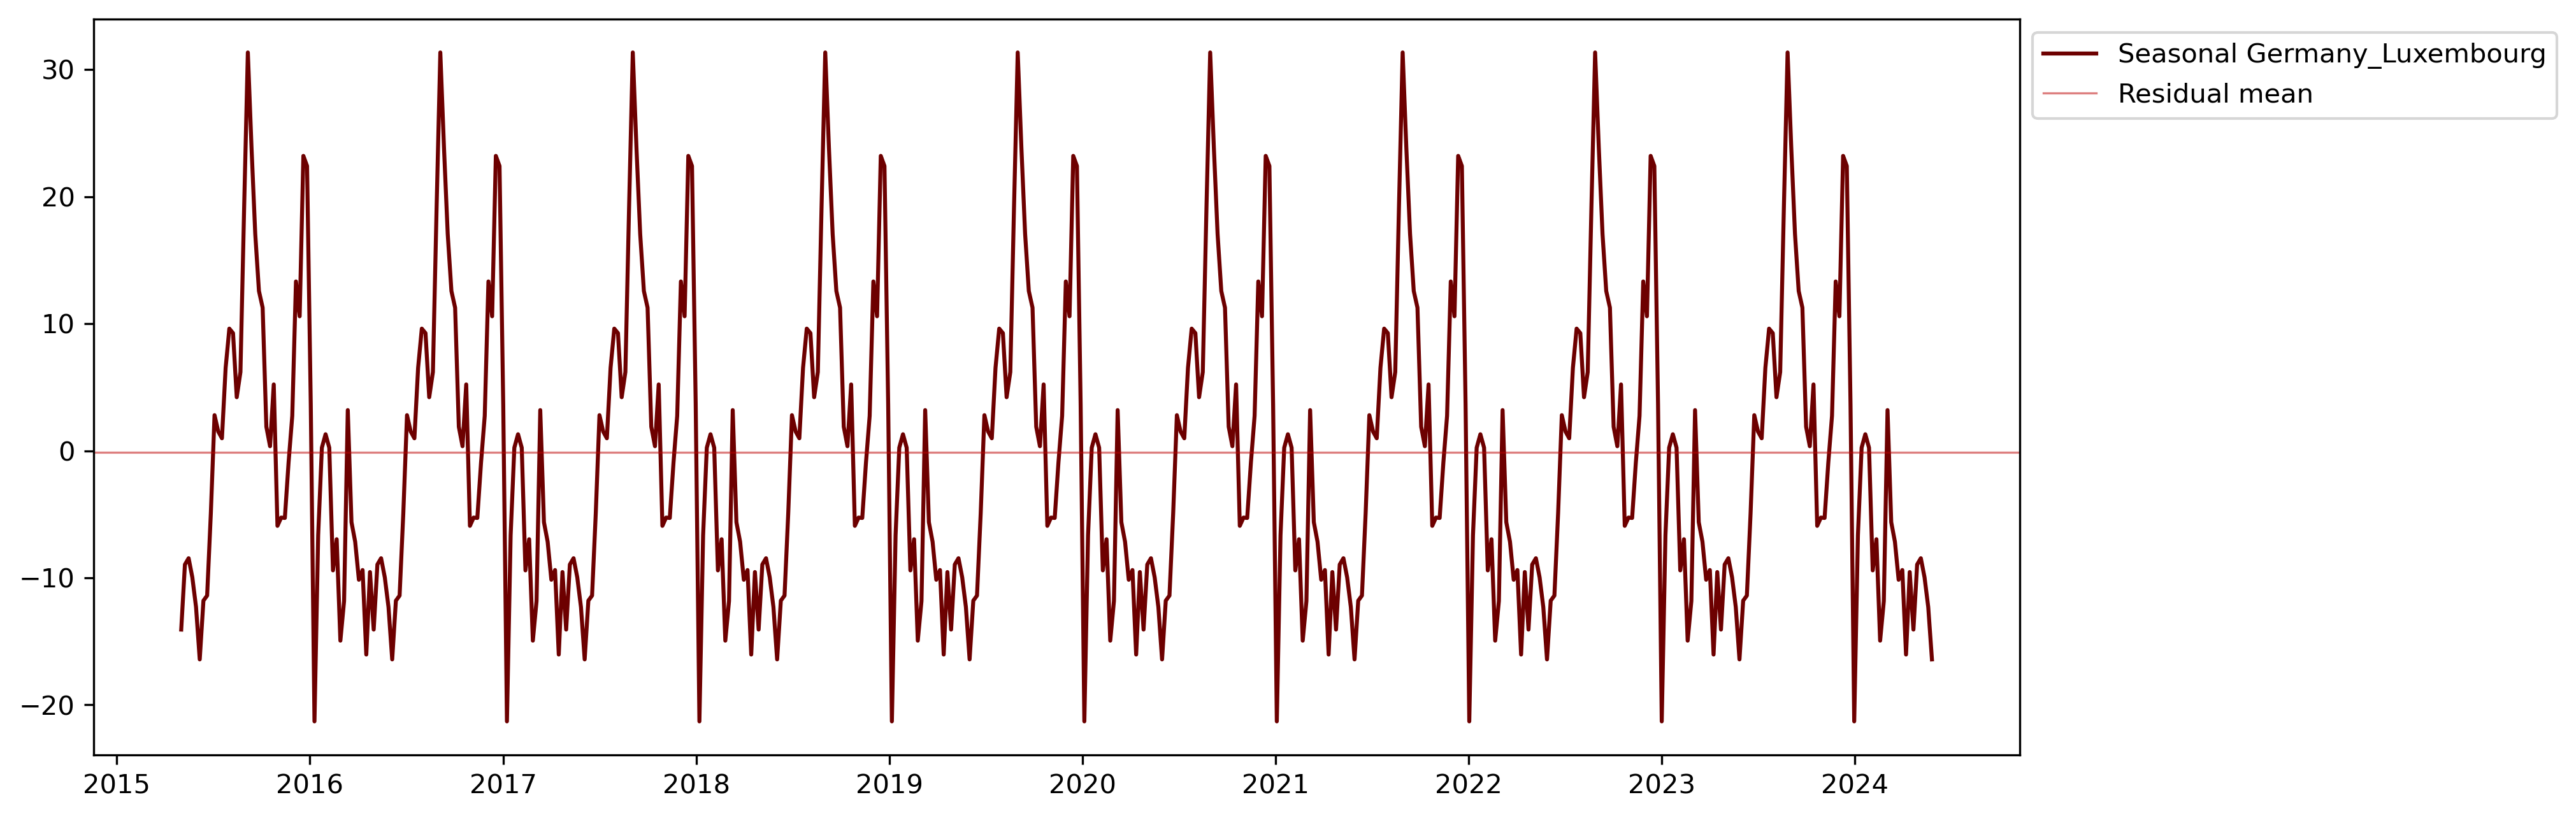

mean_Prices_GER_weekly_seasonal: -0.14803449232621924


In [363]:
mean_Prices_GER_weekly_seasonal = np.mean(Prices_GER_weekly['Seasonal_adjusted'])


plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_GER_weekly['Seasonal_adjusted'], label = 'Seasonal Germany_Luxembourg', color = '#6d0000')




plt.axhline(y=mean_Prices_GER_weekly_seasonal,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')


plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

print(f'mean_Prices_GER_weekly_seasonal: {mean_Prices_GER_weekly_seasonal}')

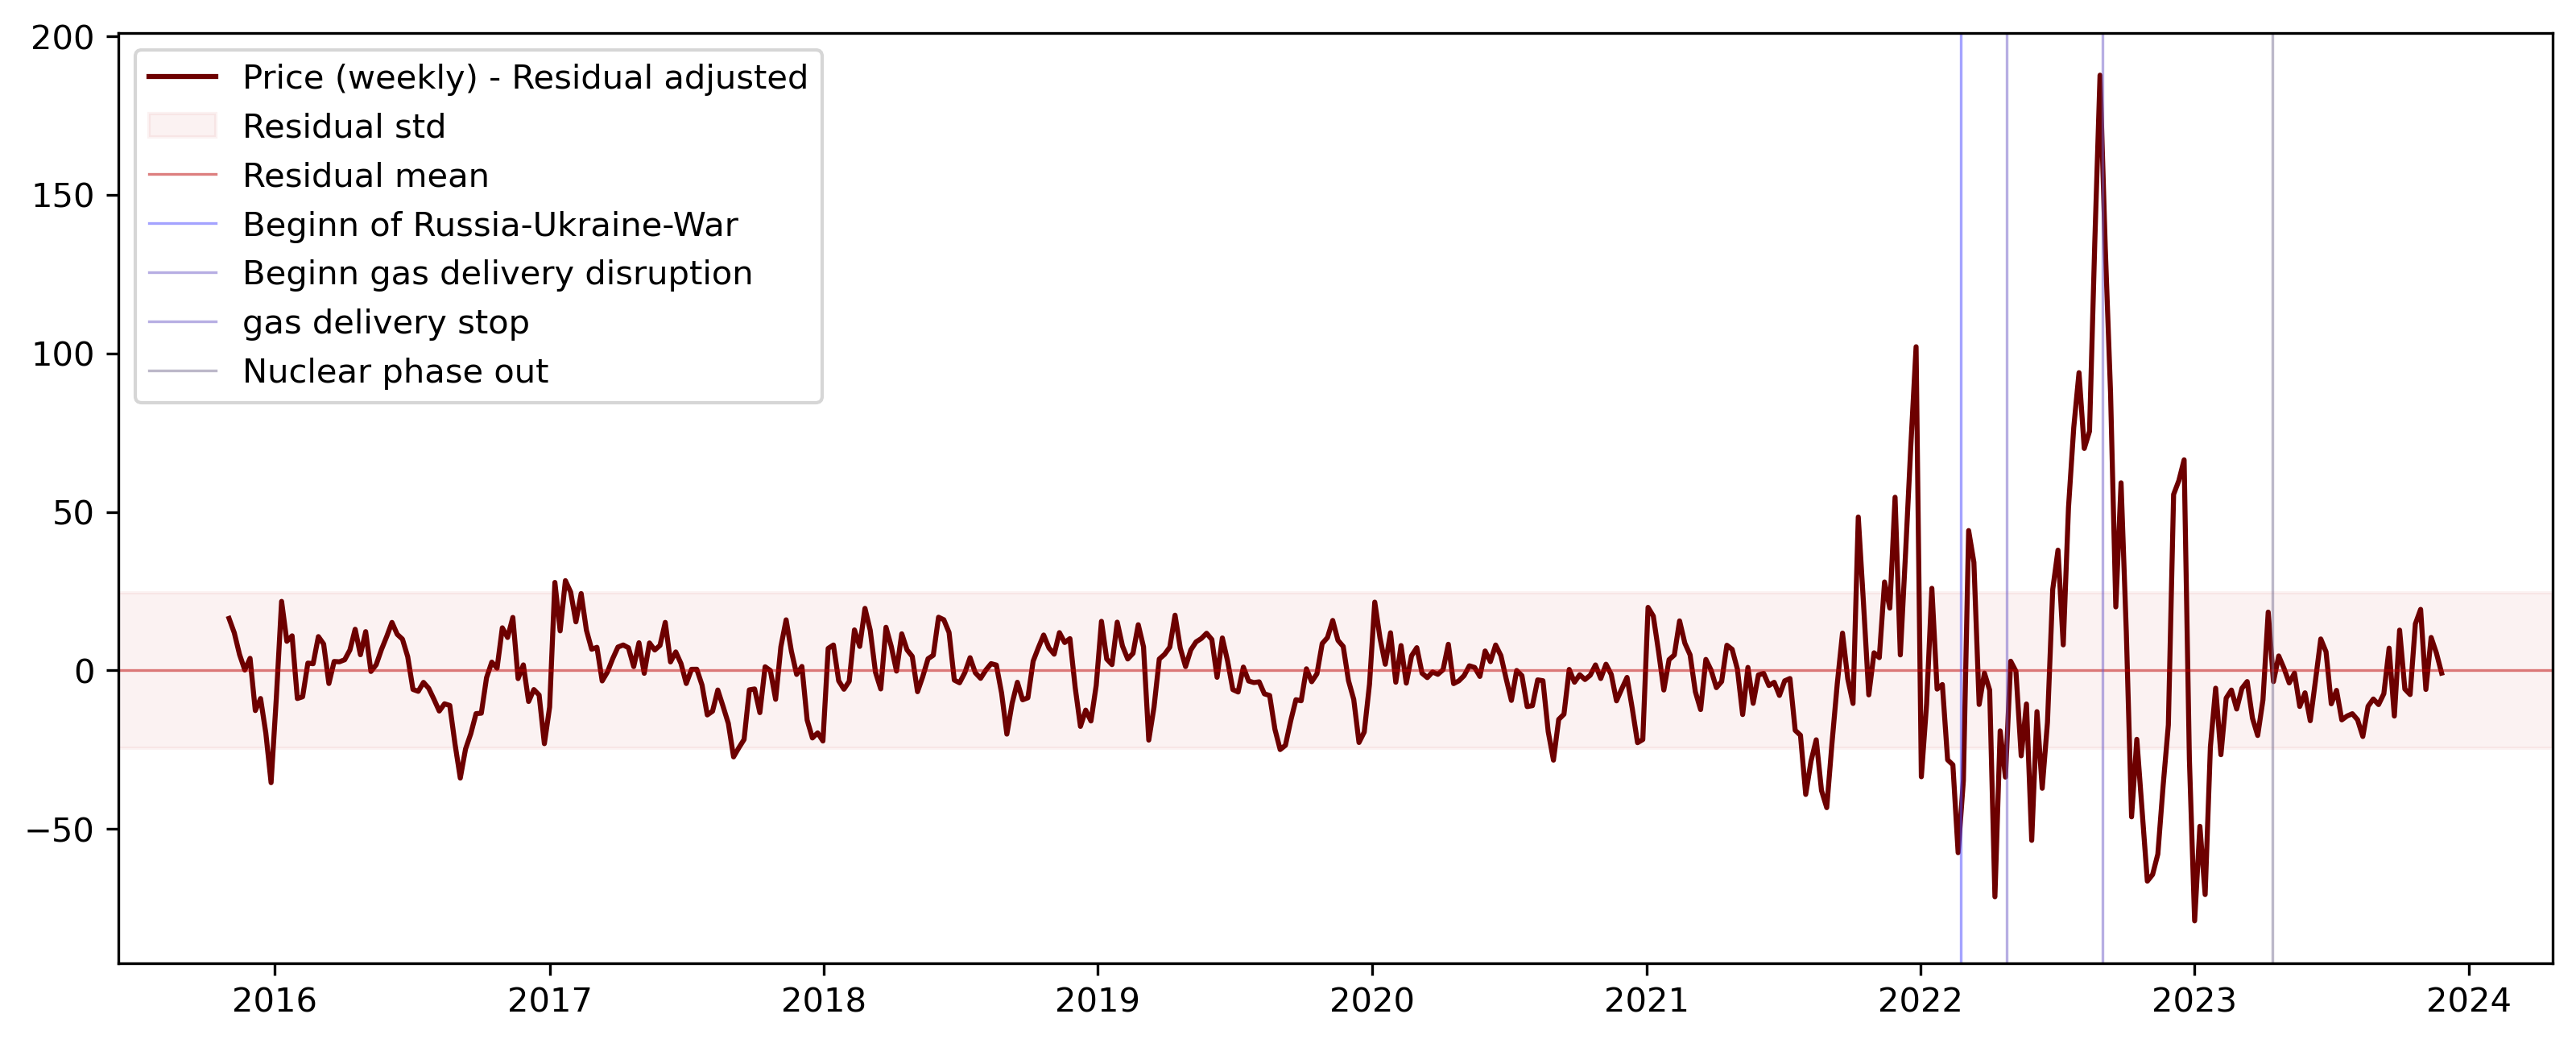

mean_Prices_GER_weekly_residual: 0.12770983216438064
std_Prices_GER_weekly_residual: 24.509322794739003


In [364]:
mean_Prices_GER_weekly_residual = np.mean(Prices_GER_weekly['Residual_adjusted'])
std_Prices_GER_weekly_residual = np.std(Prices_GER_weekly['Residual_adjusted'])


plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Residual_adjusted'], label = 'Price (weekly) - Residual adjusted', color = '#6d0000')
plt.axhspan(ymin=-std_Prices_GER_weekly_residual,ymax=std_Prices_GER_weekly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Prices_GER_weekly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')



plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

print(f'mean_Prices_GER_weekly_residual: {mean_Prices_GER_weekly_residual}')
print(f'std_Prices_GER_weekly_residual: {std_Prices_GER_weekly_residual}')

### Generation + Import & Consumption + Export

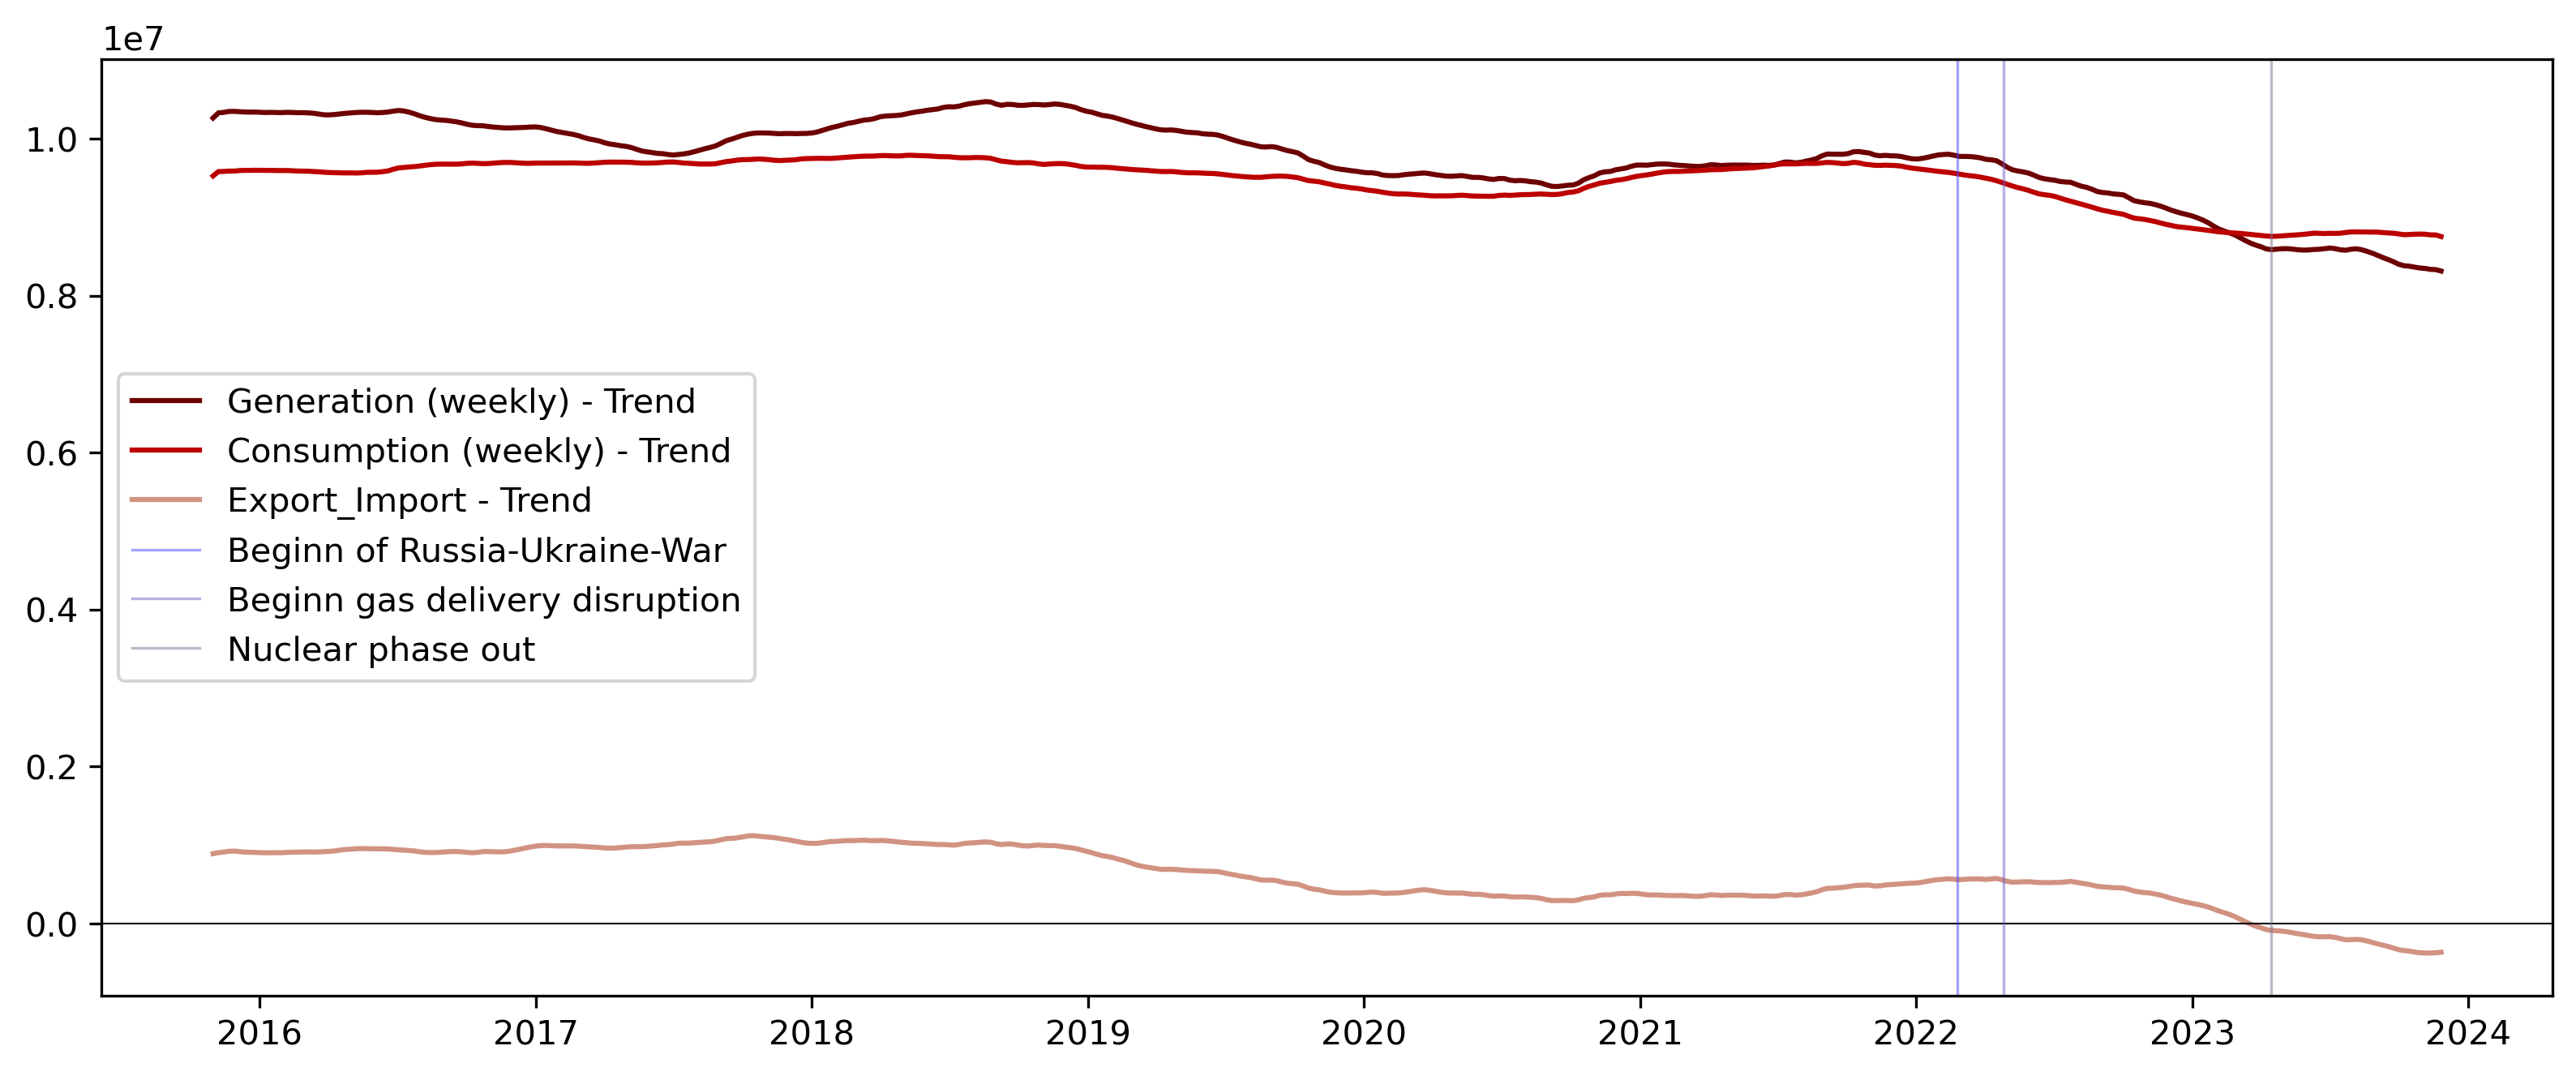

In [22]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Generation_weekly['Trend'], label = 'Generation (weekly) - Trend ', color = '#6d0000')
plt.plot(Consumption_weekly['Trend'], label = 'Consumption (weekly) - Trend',color='#bc0000')
plt.plot(Export_Import_weekly['Trend'], label = 'Export_Import - Trend', color = '#d29282')
plt.axhline(y=0,color = '#000000', linewidth = 0.5)

plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()


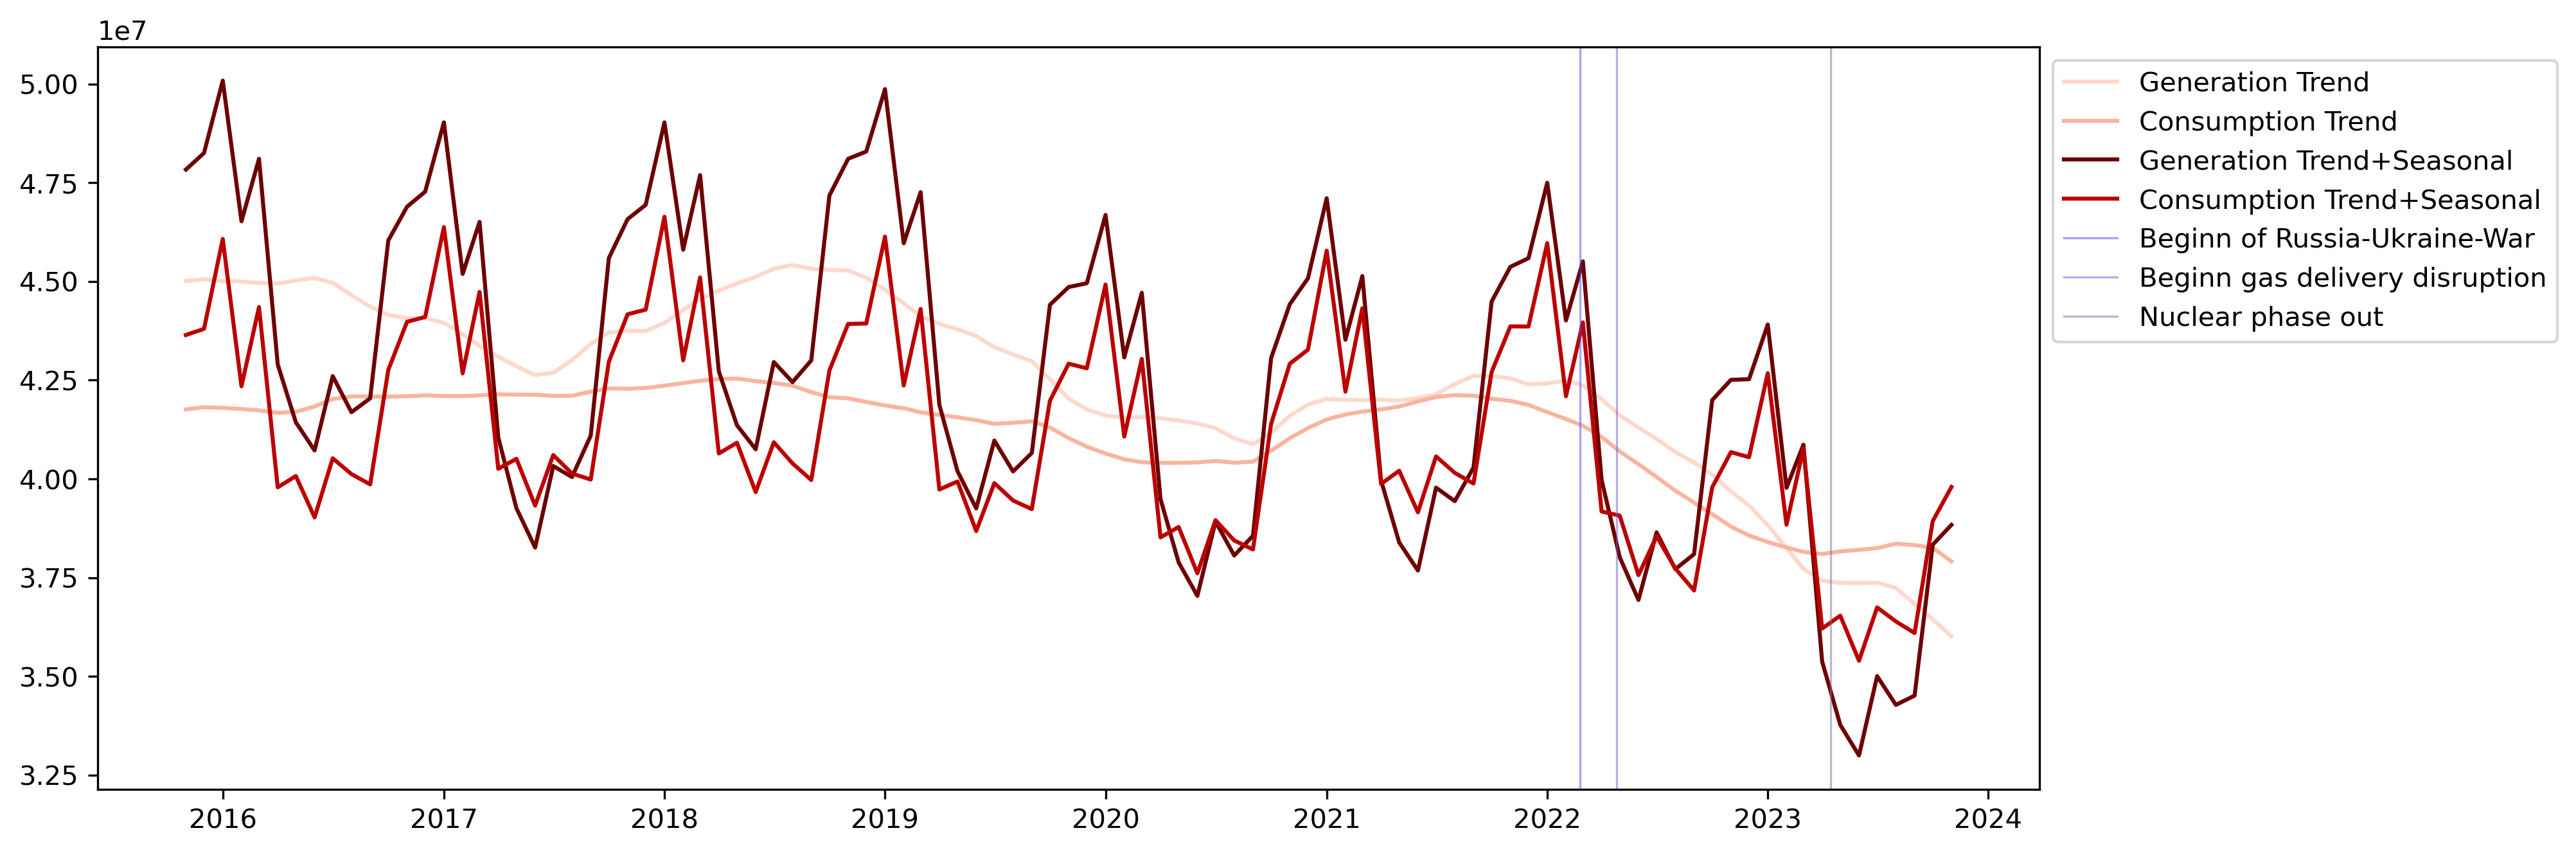

In [23]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Generation_monthly['Trend'], color= '#ffd8cb', label='Generation Trend')
plt.plot(Consumption_monthly['Trend'], color= '#f7b59f', label='Consumption Trend')
plt.plot(Generation_monthly['Trend+Seasonal'],color='#6d0000', label='Generation Trend+Seasonal')
plt.plot(Consumption_monthly['Trend+Seasonal'],color='#bc0000', label='Consumption Trend+Seasonal')


plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

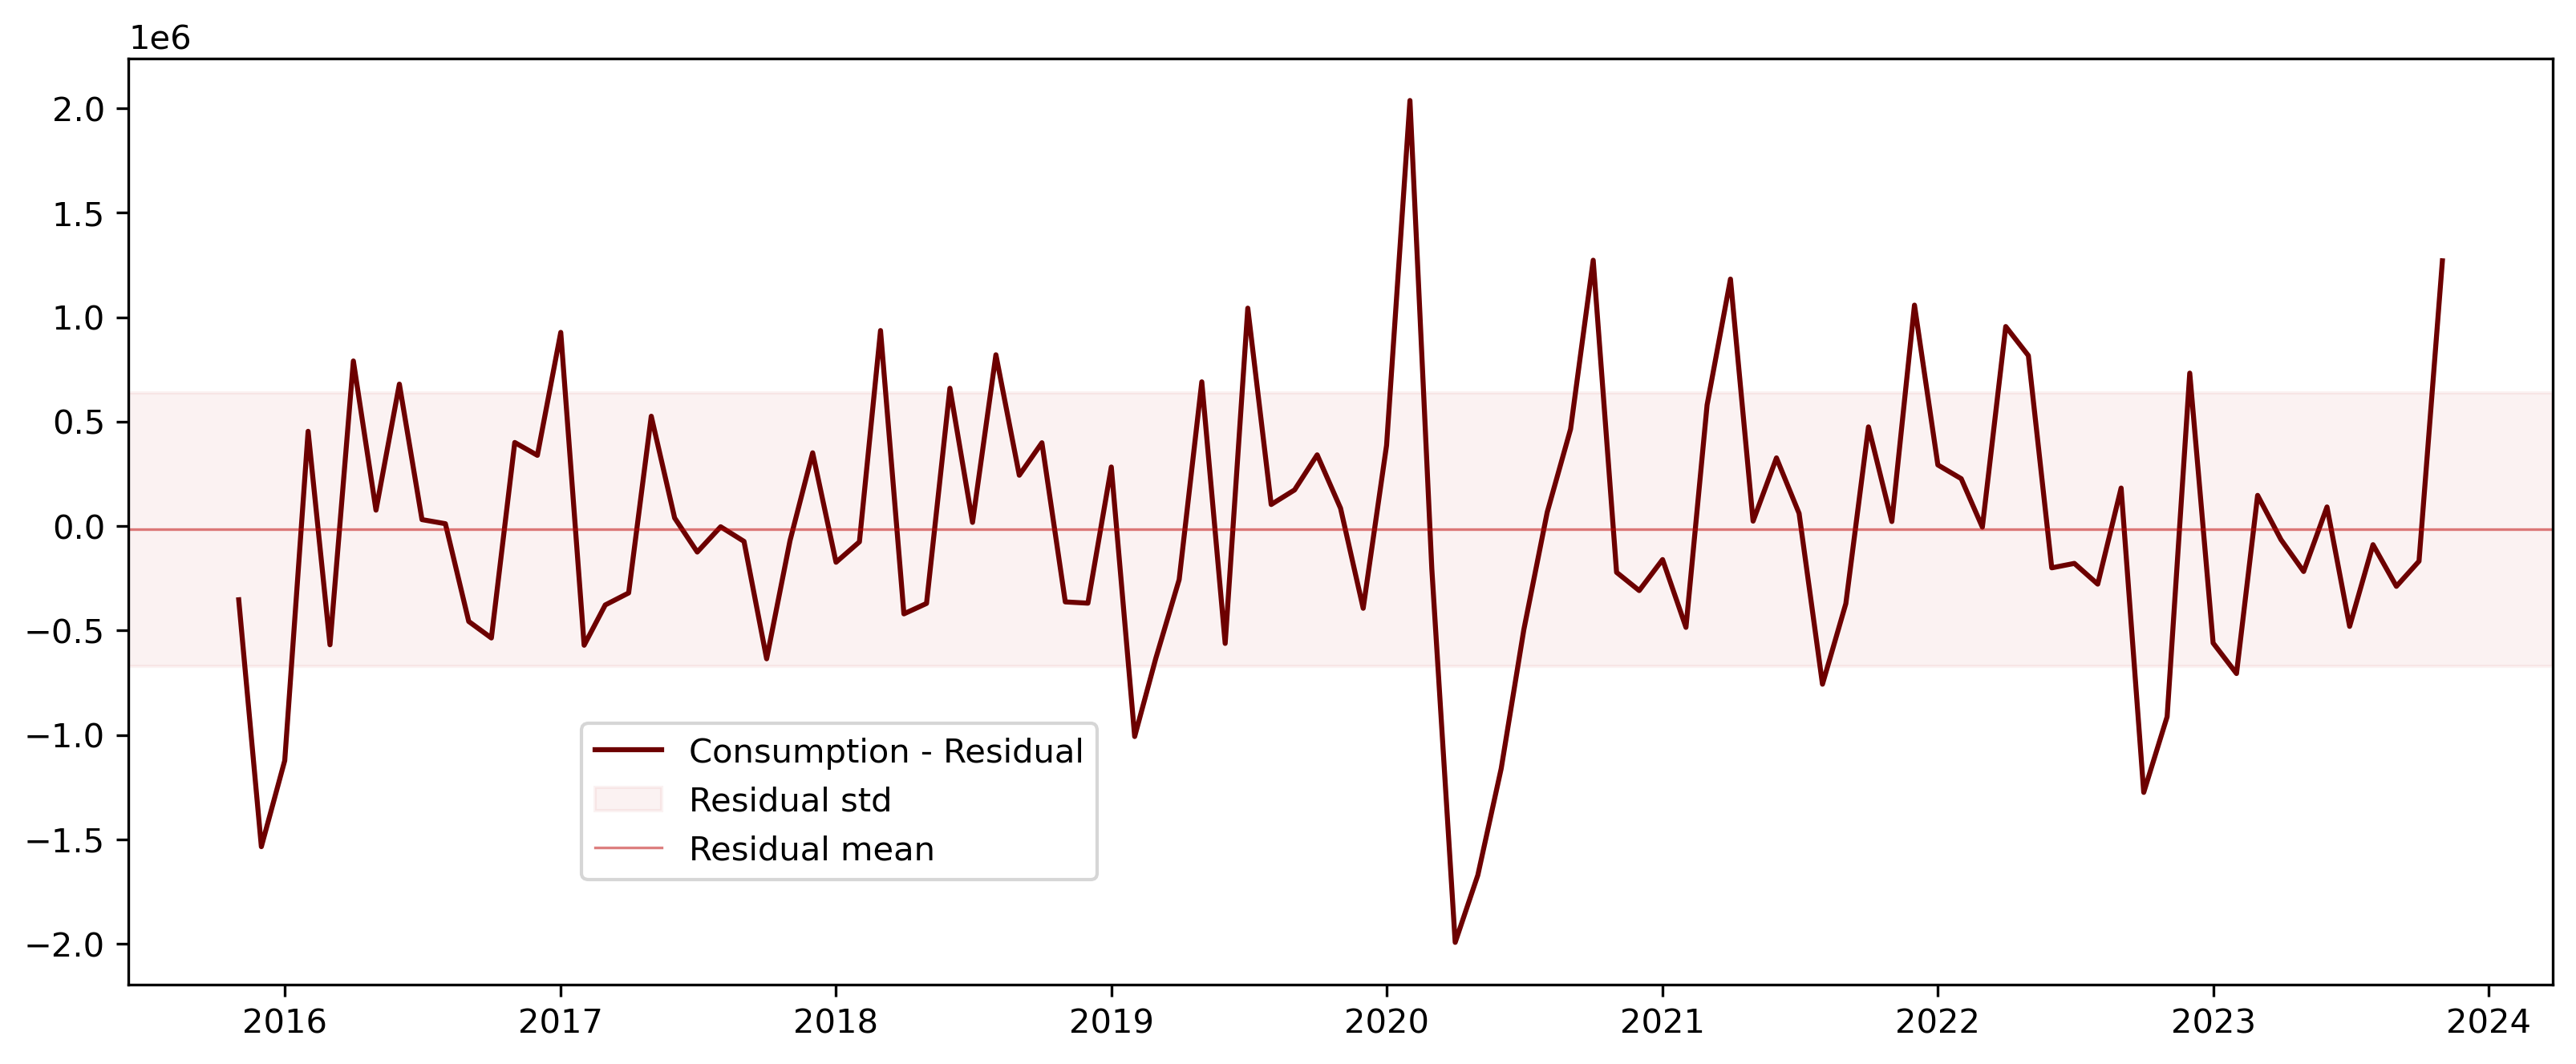

In [24]:
mean_Consumption_monthly_residual = np.mean(Consumption_monthly['Residual'])
std_Consumption_monthly_residual = np.std(Consumption_monthly['Residual'])


plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Consumption_monthly['Residual'], label = 'Consumption - Residual', color = '#6d0000')
plt.axhspan(ymin=mean_Consumption_monthly_residual-std_Consumption_monthly_residual,ymax=mean_Consumption_monthly_residual+std_Consumption_monthly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Consumption_monthly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')




plt.legend(bbox_to_anchor=(0.18,0.3))
plt.show()

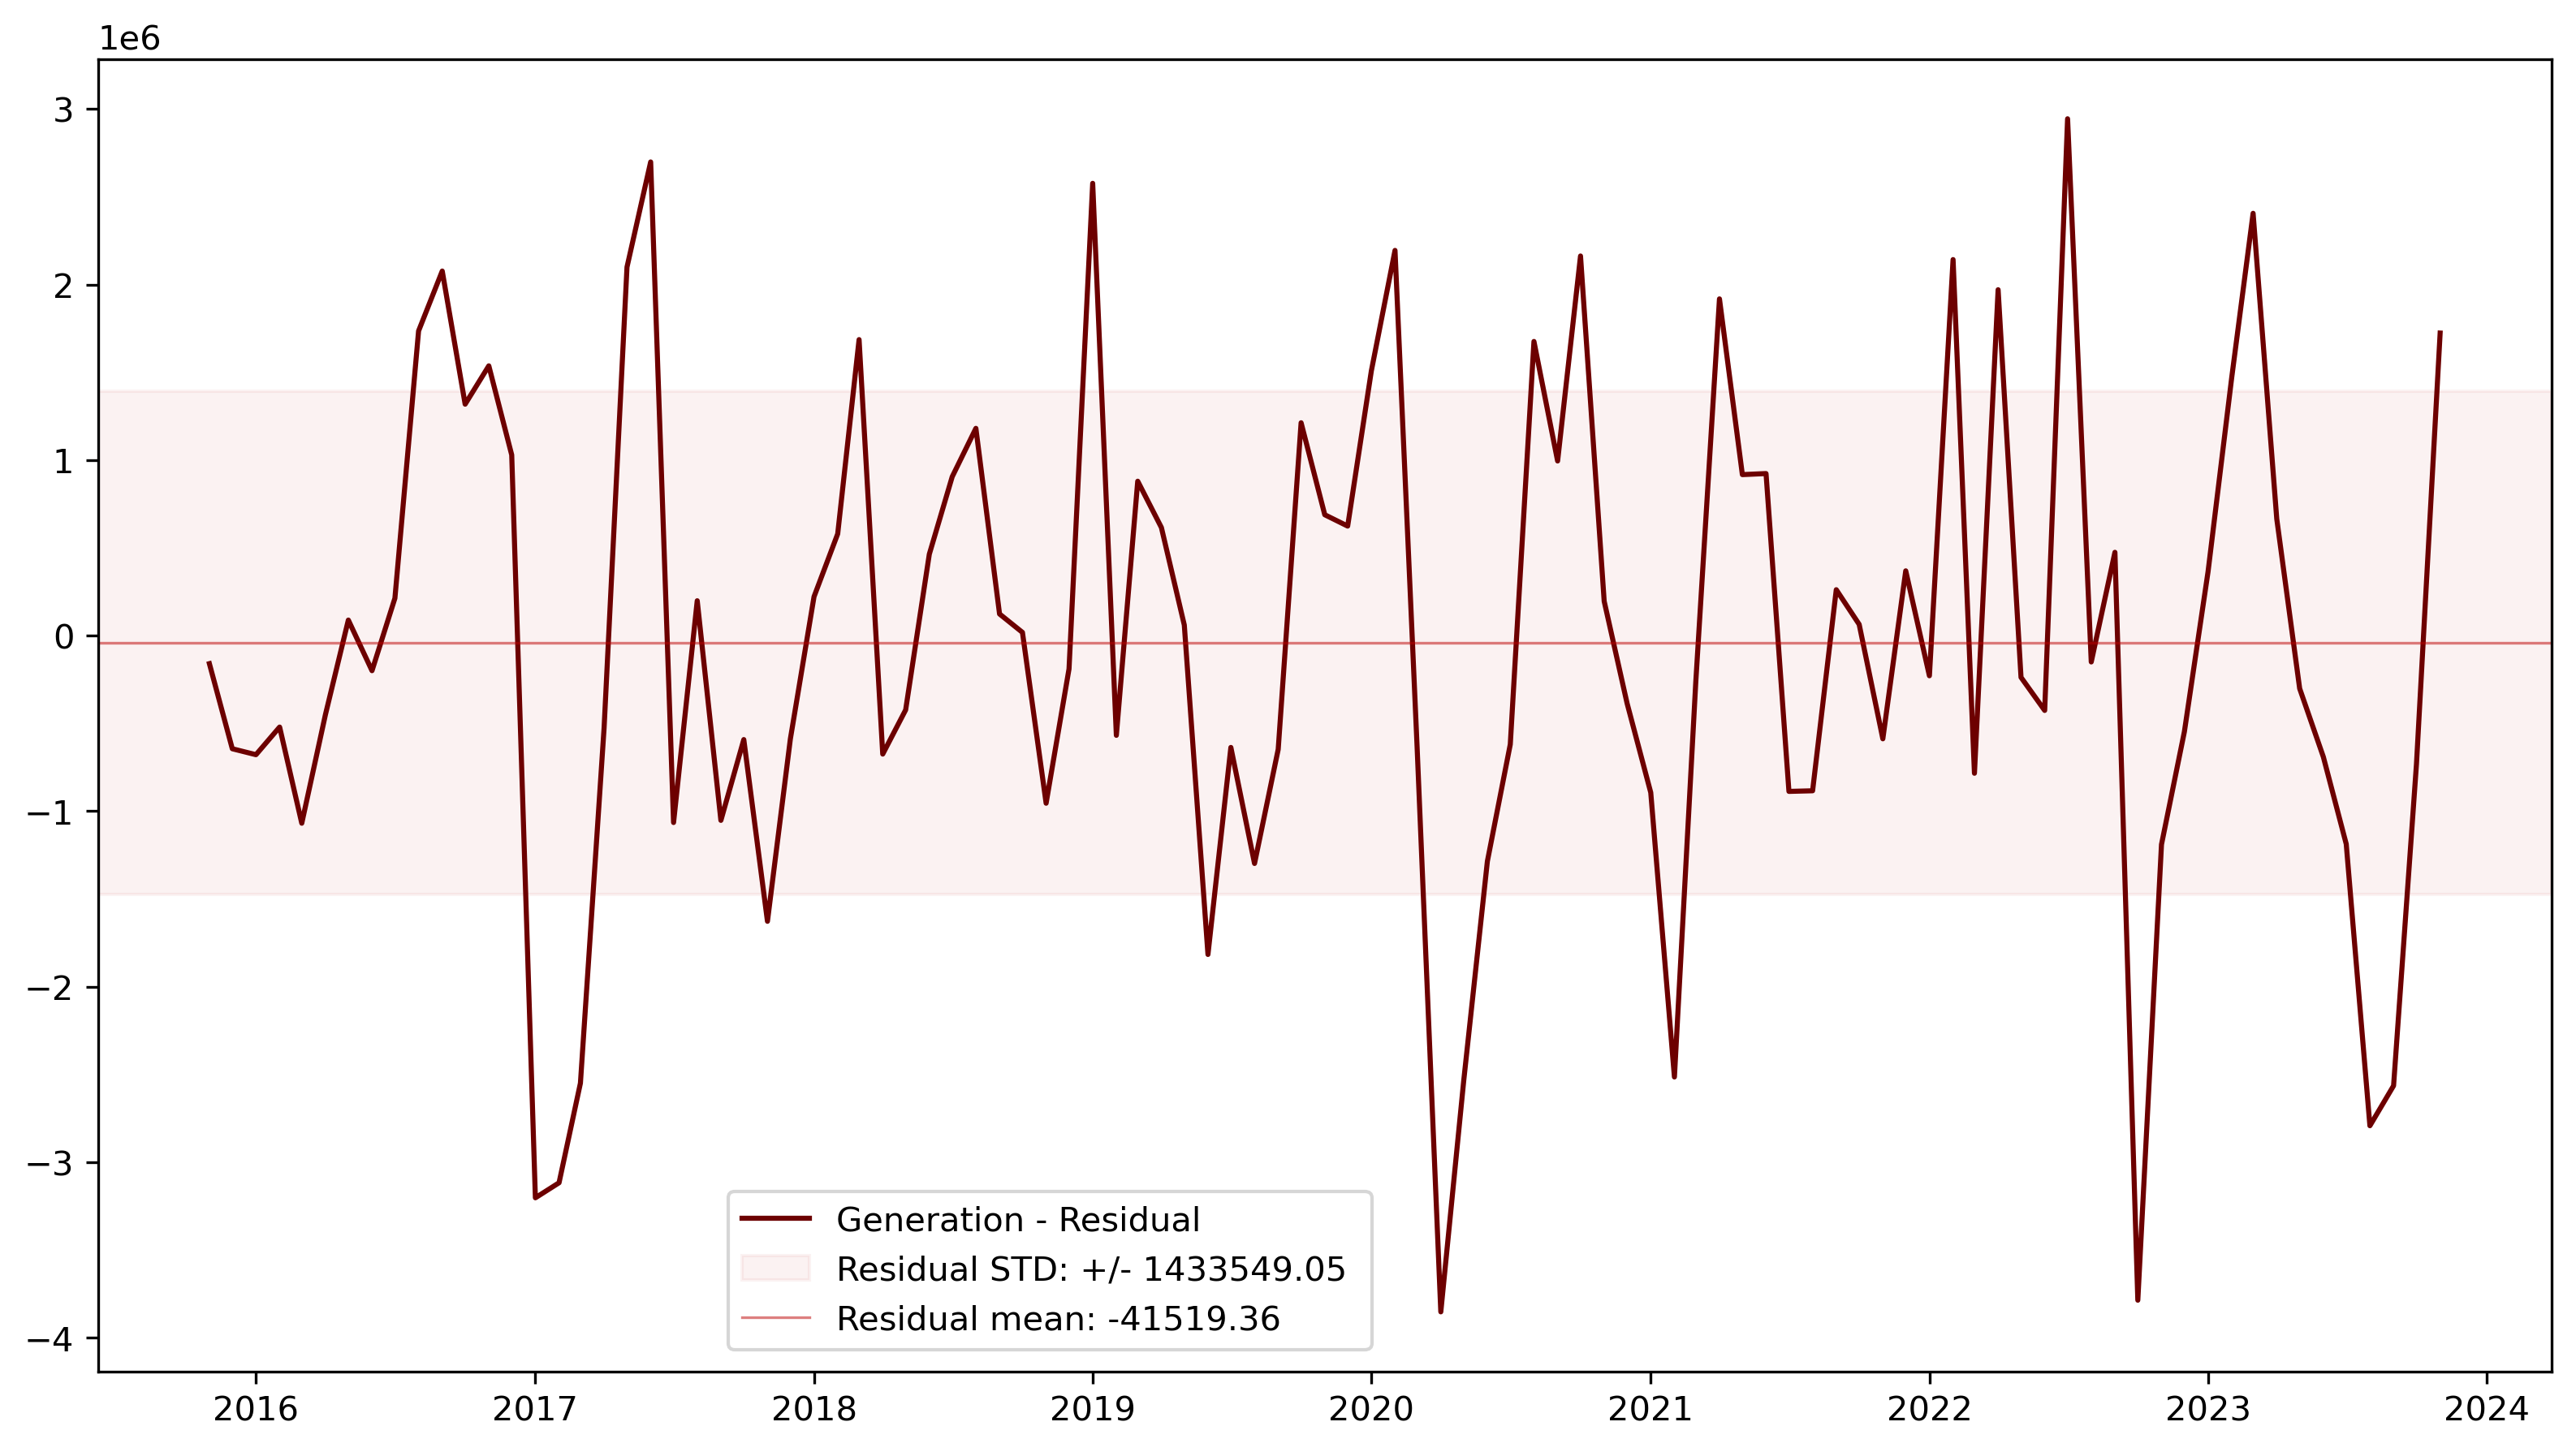

In [25]:
mean_Generation_monthly_residual = np.mean(Generation_monthly['Residual'])
std_Generation_monthly_residual = np.std(Generation_monthly['Residual'])


plt.figure(figsize= (13,7), dpi = 300)

plt.plot(Generation_monthly['Residual'], label = 'Generation - Residual', color = '#6d0000')
plt.axhspan(ymin=mean_Generation_monthly_residual-std_Generation_monthly_residual,ymax=mean_Generation_monthly_residual+std_Generation_monthly_residual, alpha = 0.05, label = f'Residual STD: +/- {(std_Generation_monthly_residual).round(2)} ',color = '#bc0000')
plt.axhline(y=mean_Generation_monthly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = f'Residual mean: {(mean_Generation_monthly_residual).round(2)}')





plt.legend(bbox_to_anchor=(0.25, 0.15))
plt.show()

In [26]:
Import_reversed = Export_Import
Import_reversed['Import_sum'] = Import_reversed['Import_sum']* (-1) 

In [27]:
Export_monthly = decomposition_df(Export_Import, 'Export_sum')
Import_monthly = decomposition_df(Import_reversed, 'Import_sum')
Export_weekly = decomposition_df(Export_Import, 'Export_sum','W')
Import_weekly = decomposition_df(Import_reversed, 'Import_sum','W')


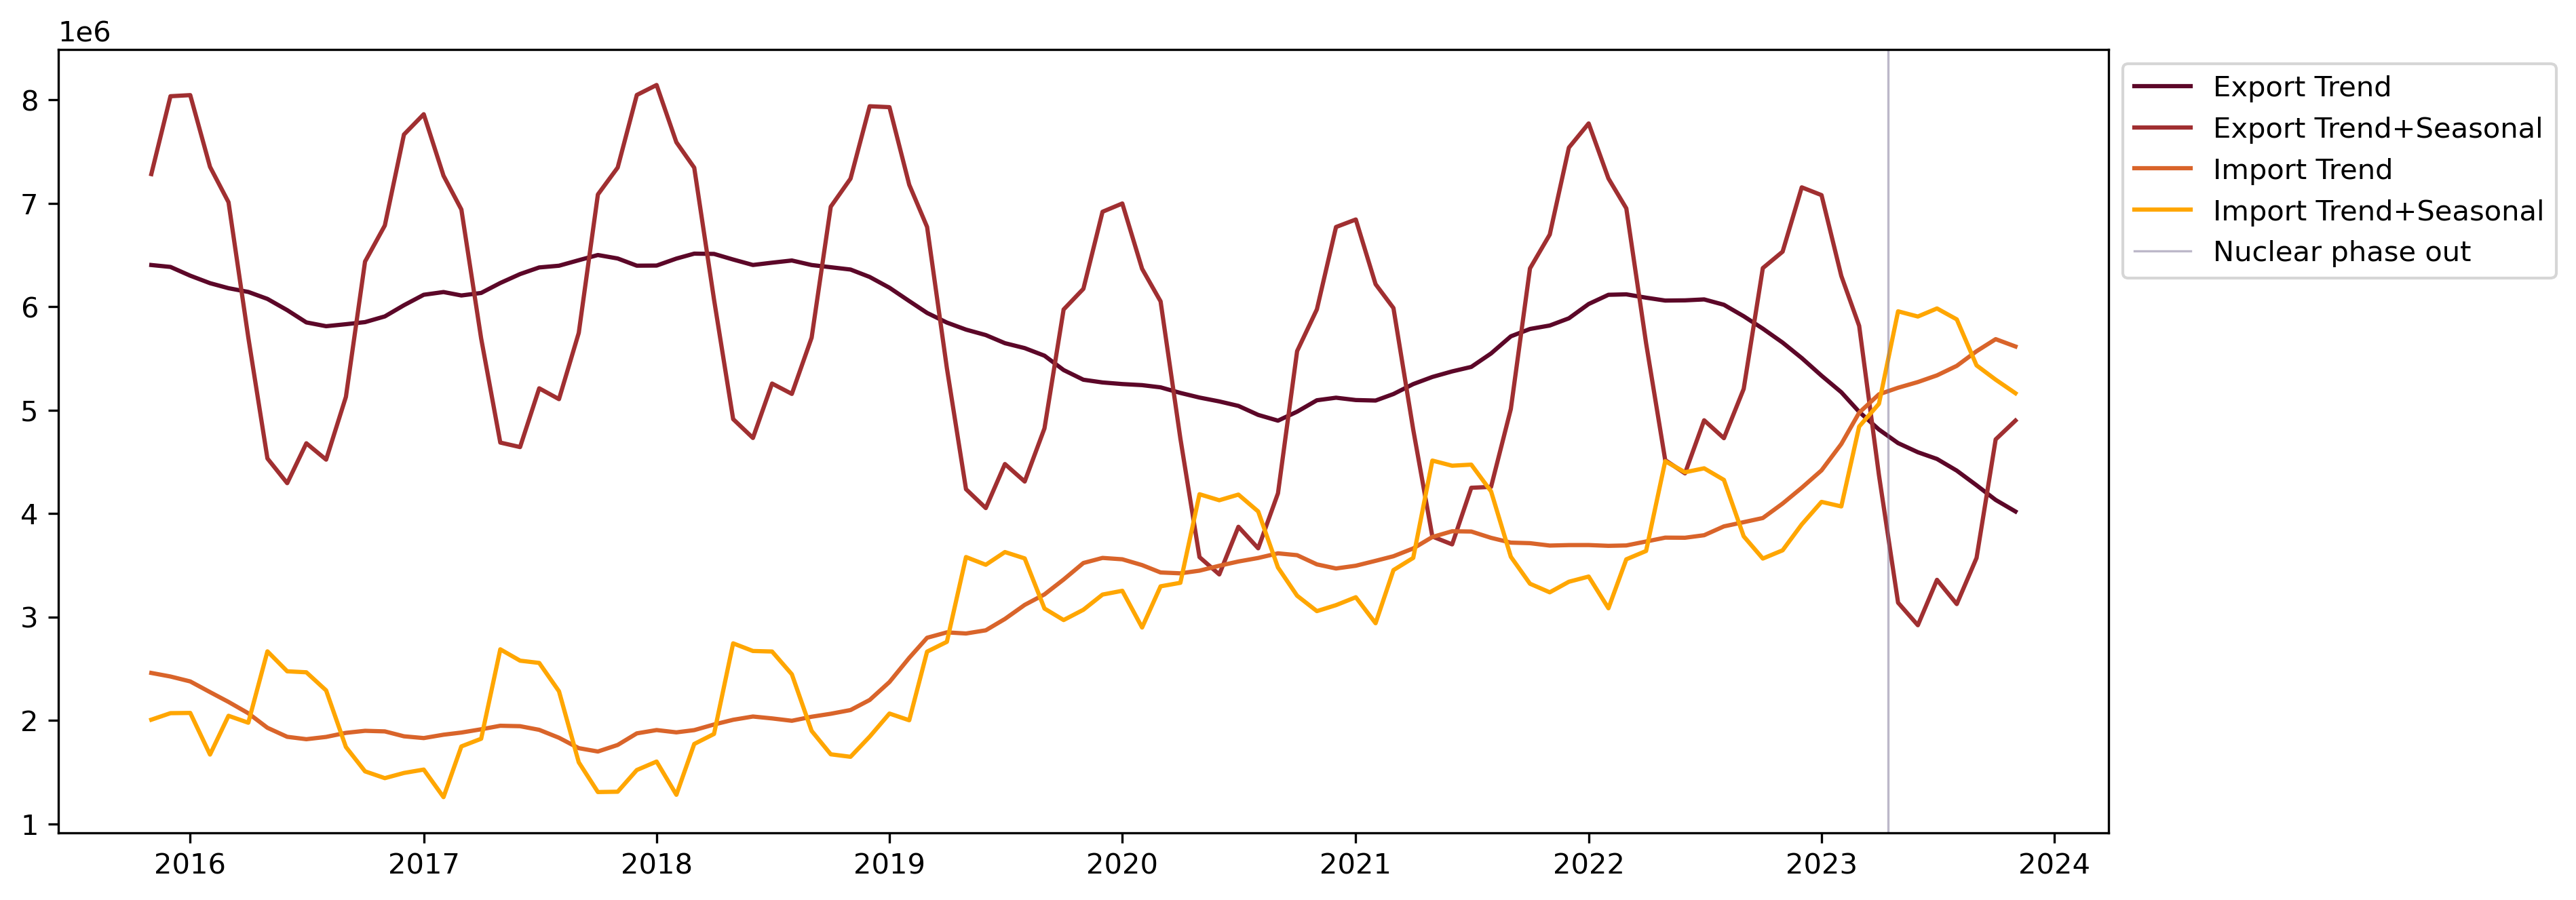

In [28]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Export_monthly['Trend'], color= '#5c0728', label='Export Trend')
plt.plot(Export_monthly['Trend+Seasonal'],color='#a02f31', label='Export Trend+Seasonal')
plt.plot(Import_monthly['Trend'], color= '#d9642a', label='Import Trend')
plt.plot(Import_monthly['Trend+Seasonal'],color='#ffa600', label='Import Trend+Seasonal')




plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

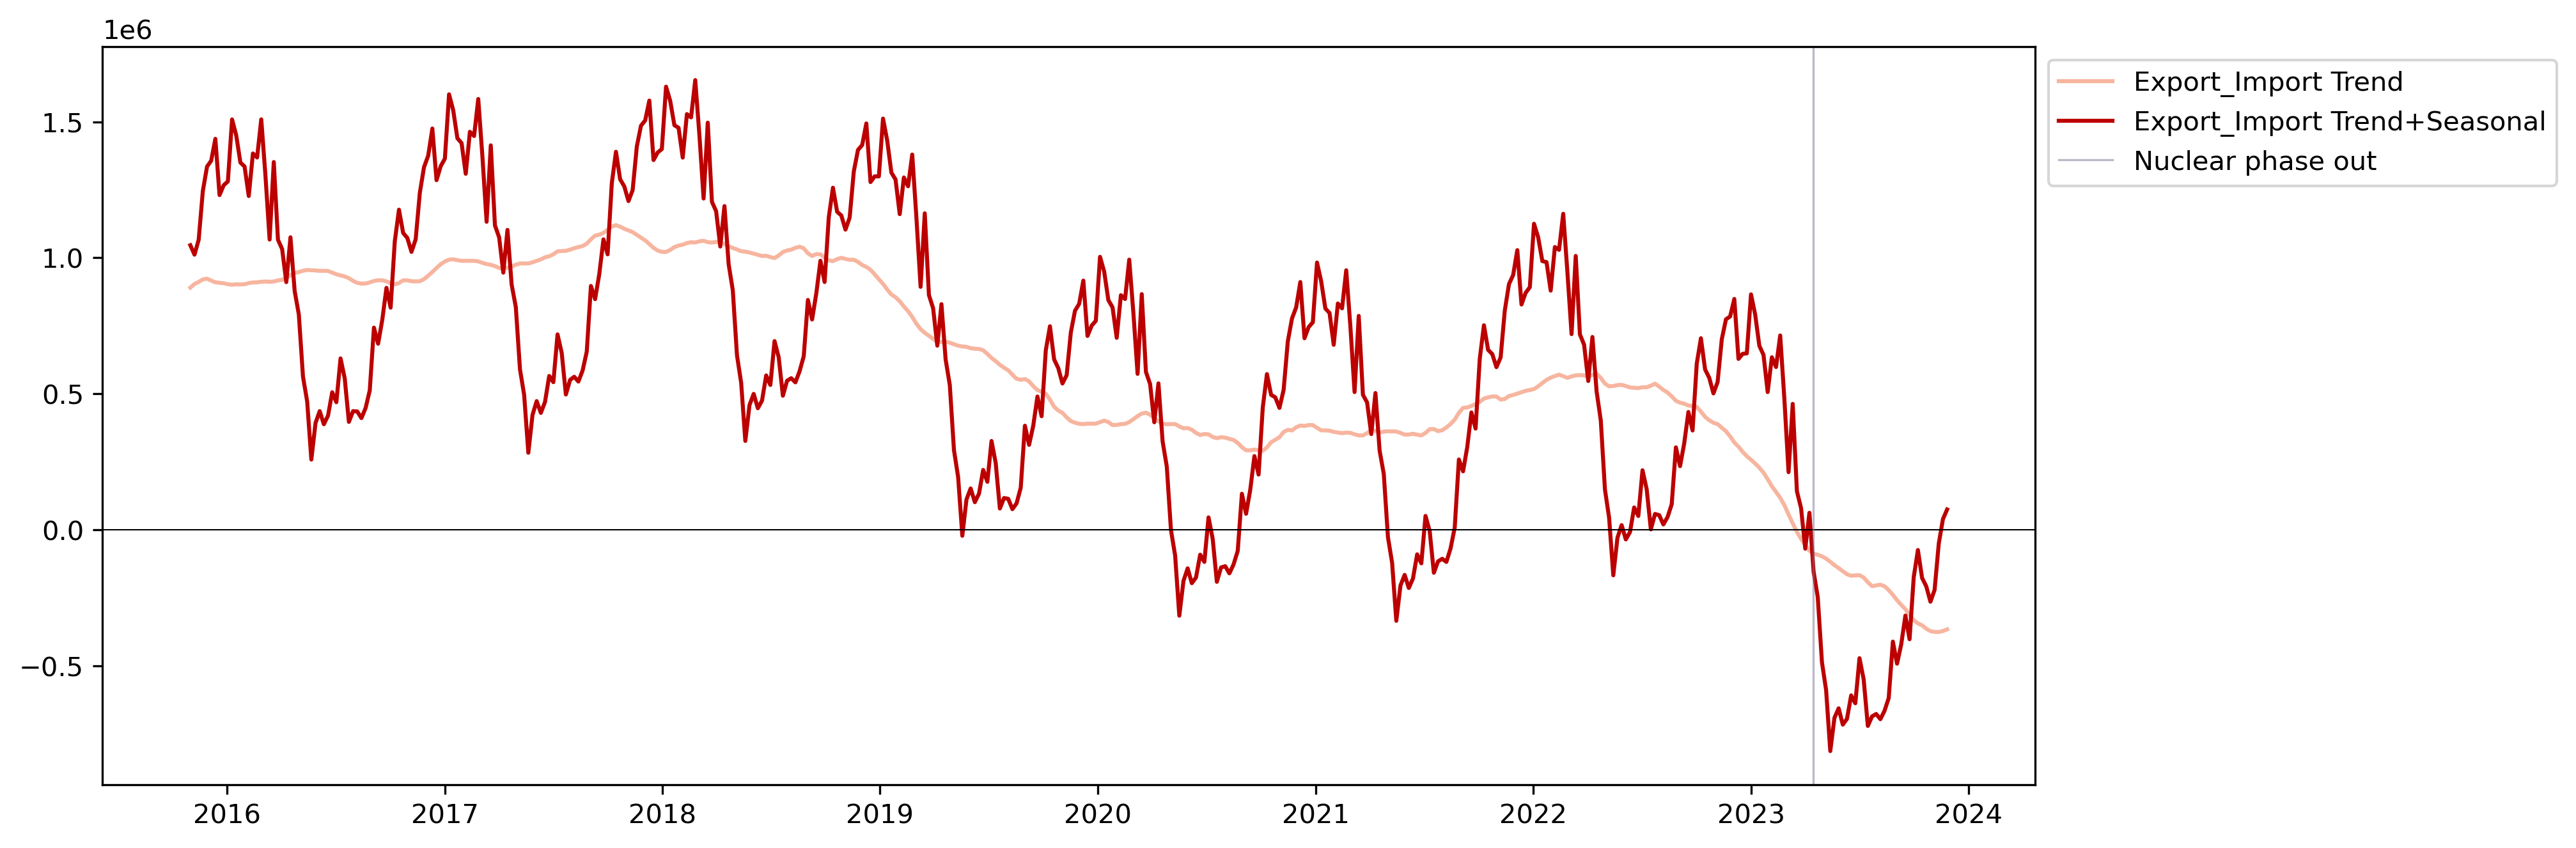

In [29]:
plt.figure(figsize=(13,5), dpi = 300)
plt.plot(Export_Import_weekly['Trend'], color= '#f7b59f', label='Export_Import Trend')
plt.plot(Export_Import_weekly['Trend+Seasonal'],color='#bc0000', label='Export_Import Trend+Seasonal')

plt.axhline(y=0,color = '#000000', linewidth = 0.5)


plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## Splitting of the data


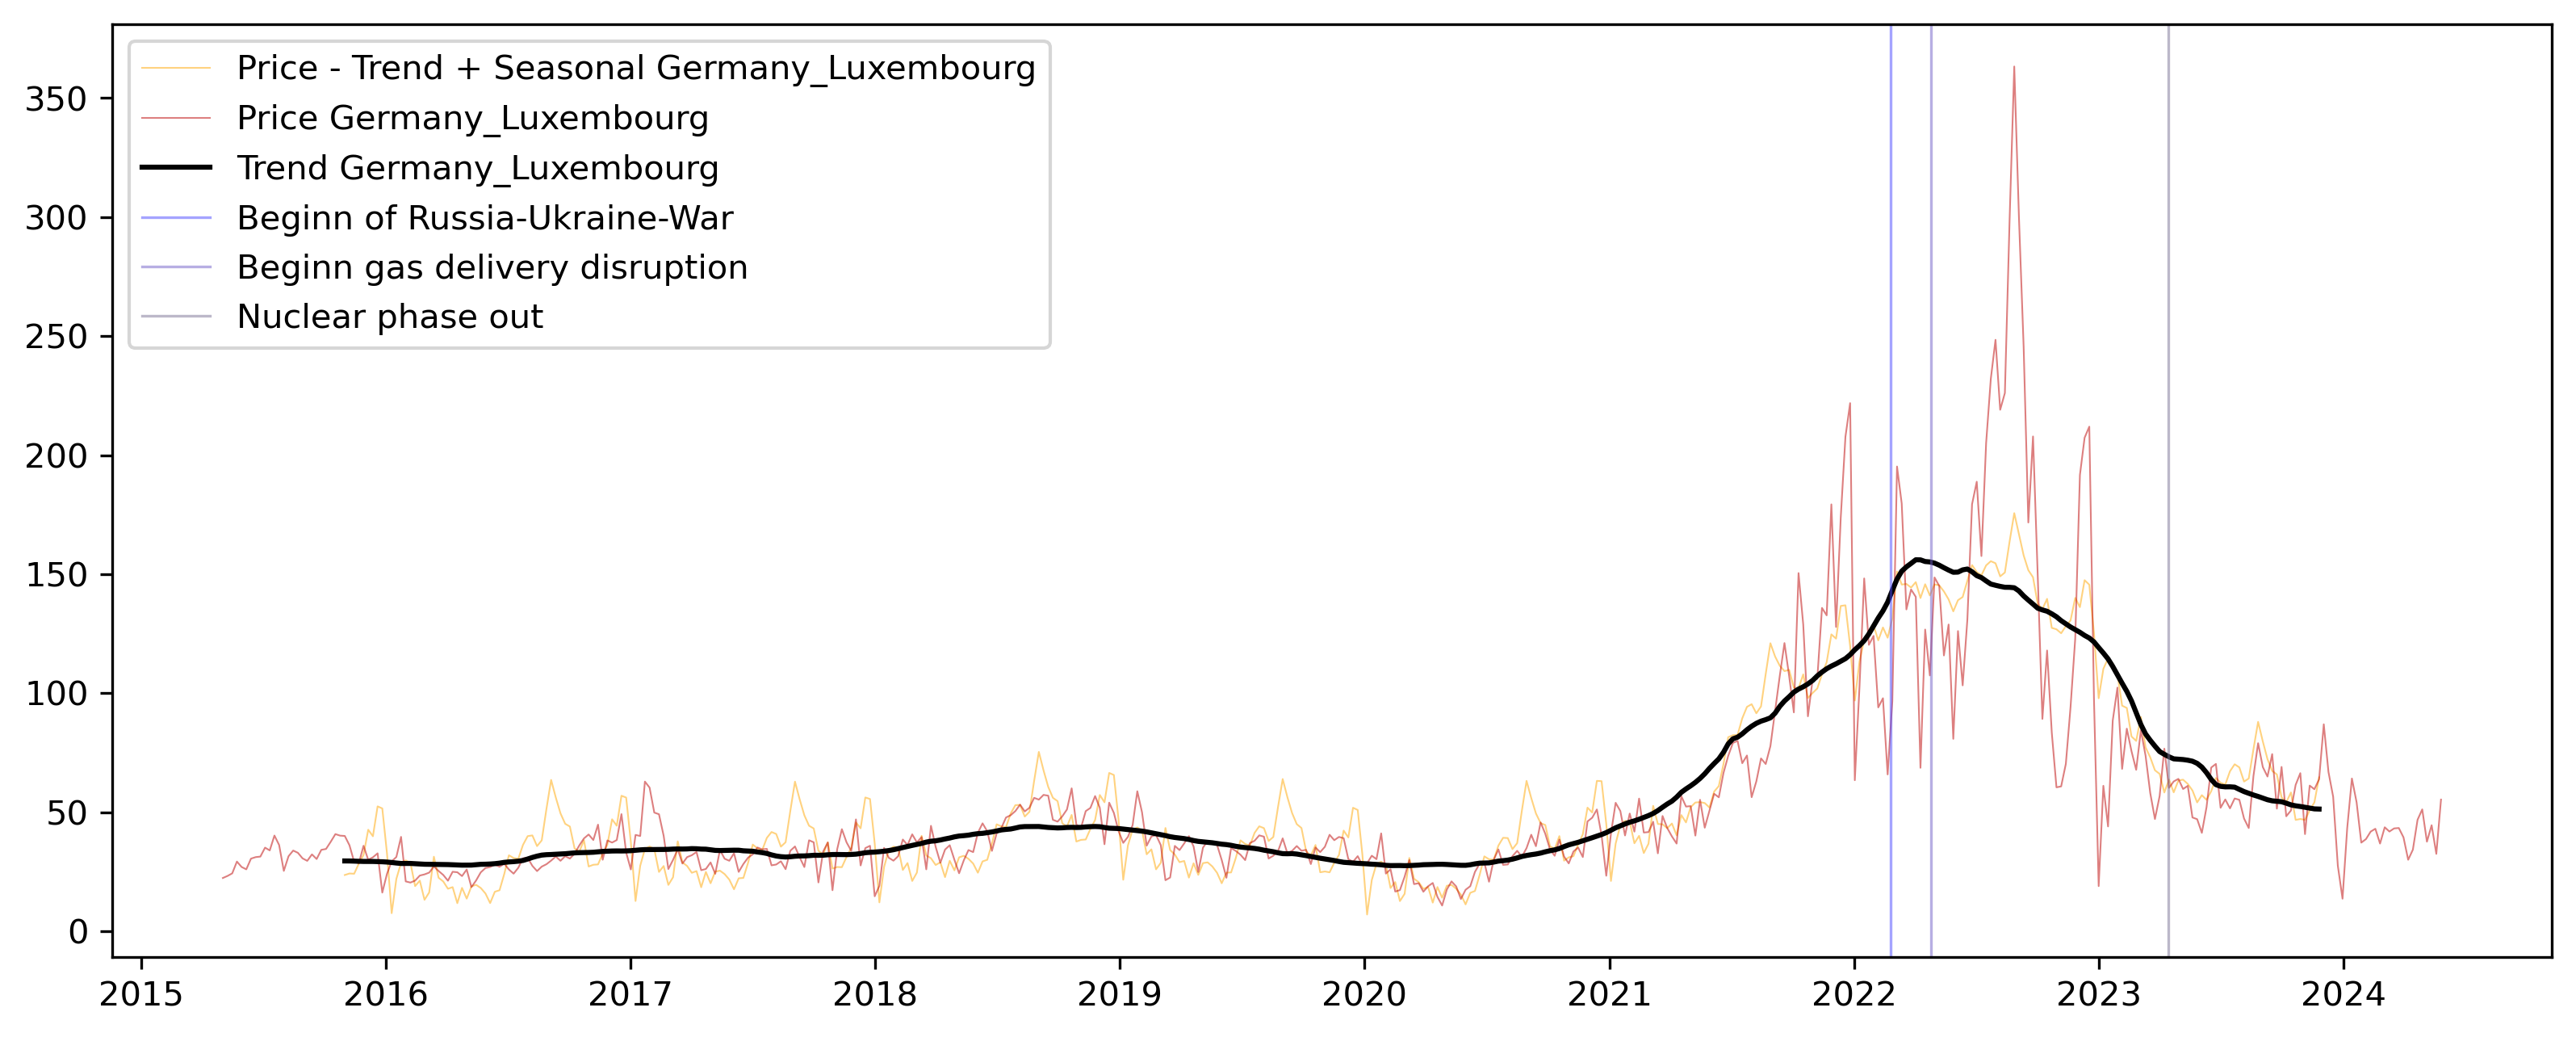

In [373]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Trend+Seasonal_adjusted'], label = 'Price - Trend + Seasonal Germany_Luxembourg', color = '#ffa600',alpha = .5, linewidth = 0.5 )
plt.plot(Prices_GER_weekly['Germany_Luxembourg_adjusted'], label = 'Price Germany_Luxembourg',color='#bc0000', alpha = .5, linewidth = 0.5 )
plt.plot(Prices_GER_weekly['Trend_adjusted'], label = 'Trend Germany_Luxembourg',color='#000000')# ,alpha = .2, linewidth = 0.5 )


# plt.axvspan(xmin = Prices_GER_weekly.index.min() ,xmax=dt.datetime(2021,5,1,0,0,0),color = '#000000', alpha = 0.05, linewidth = .8,  label = 'normal')
# plt.axvspan(xmin= dt.datetime(2021,5,1,0,0,0),xmax= Prices_GER_weekly.index.max(), alpha = 0.1, label = 'anomaly',color = '#000000')
plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

In [374]:
Prices_GER_weekly['Trend_Slope'] = Prices_GER_weekly['Trend'].diff()
Prices_GER_weekly['Trend_Slope_adjusted'] = Prices_GER_weekly['Trend_adjusted'].diff()

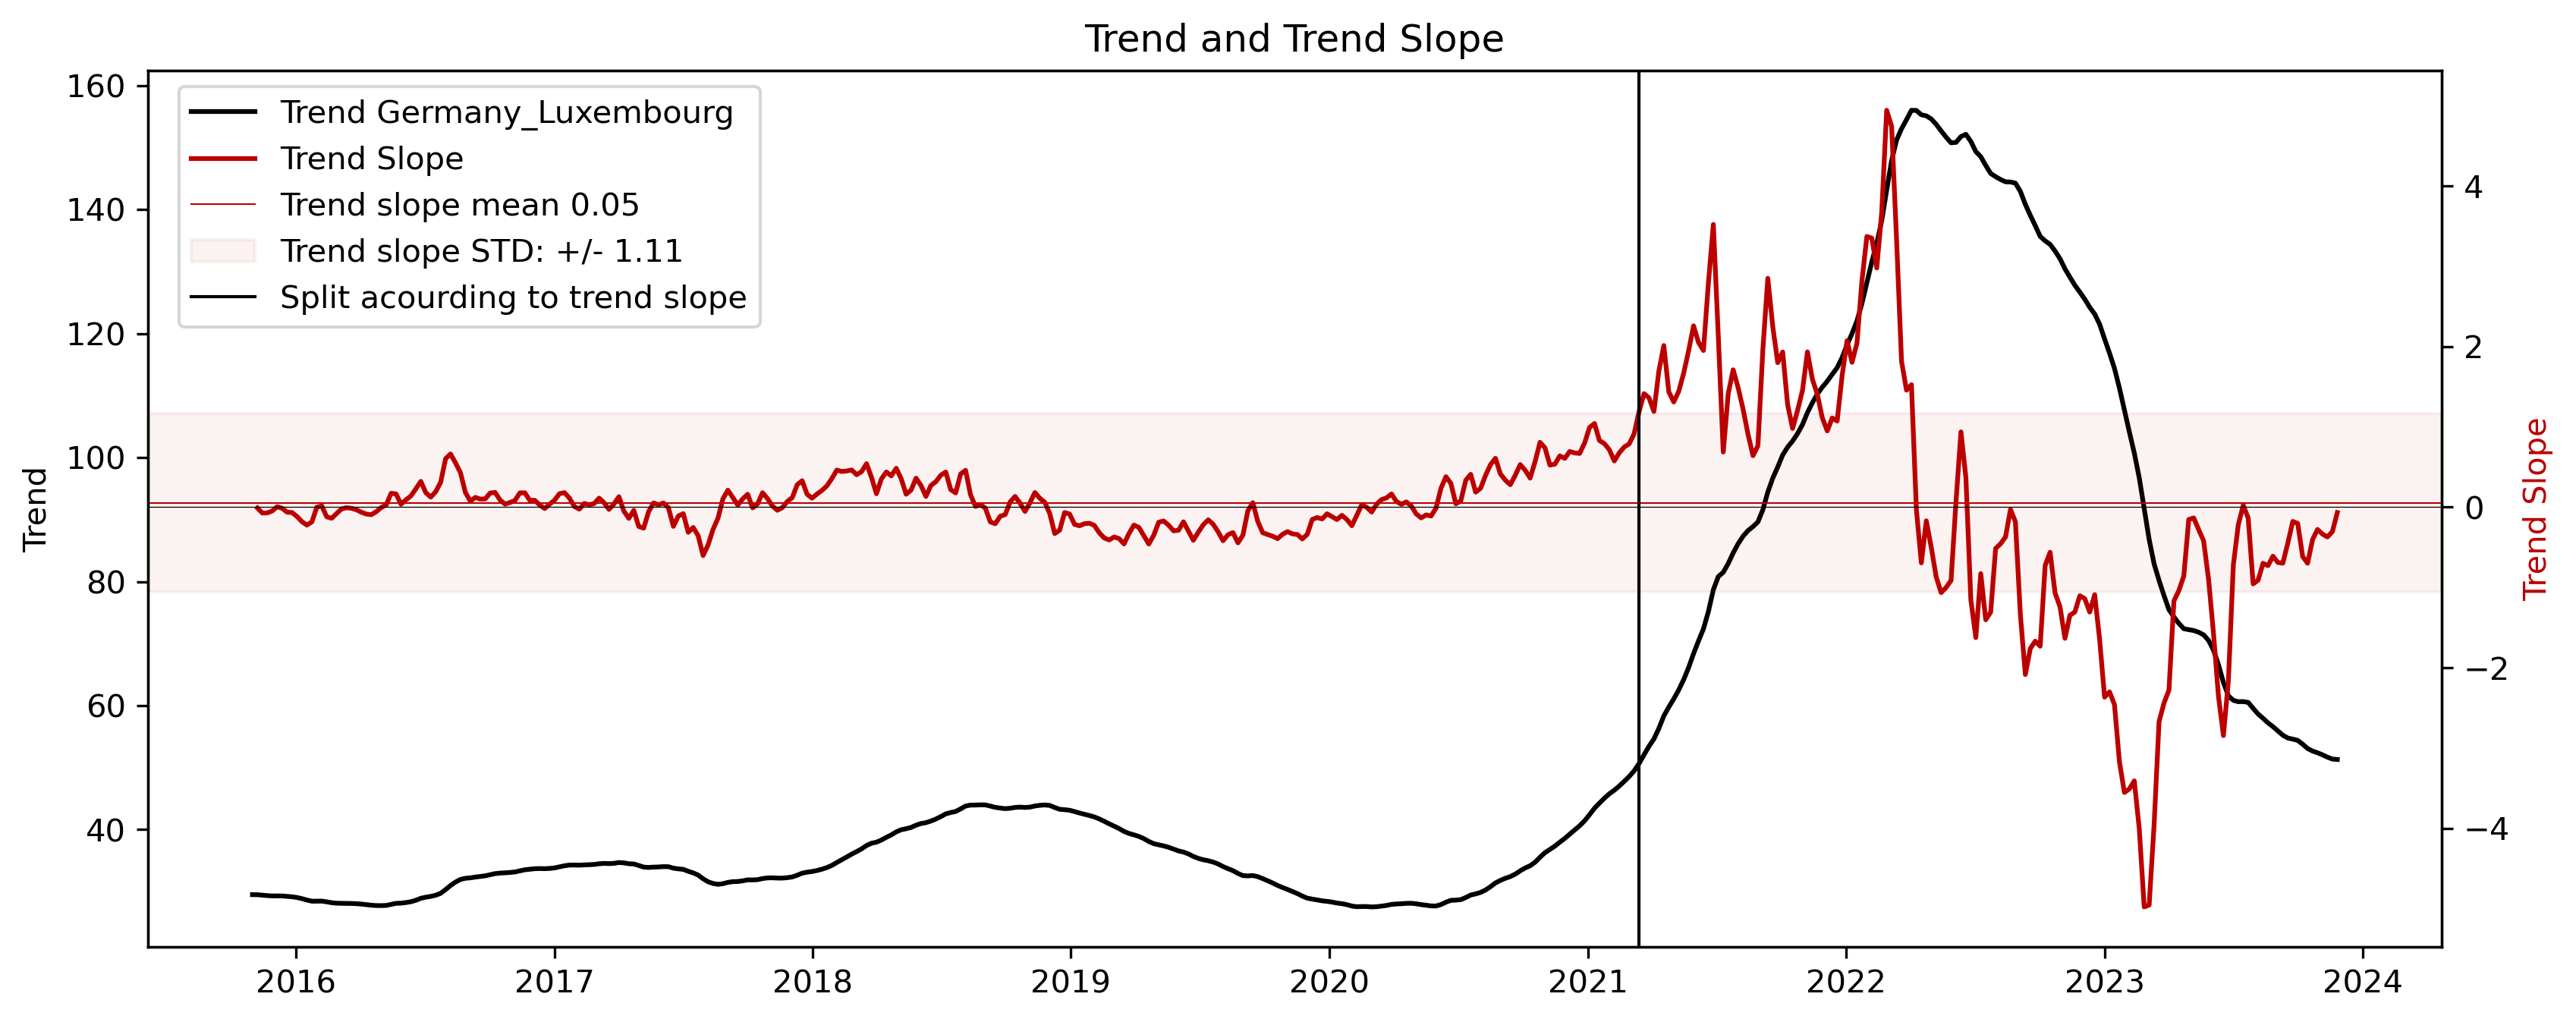

In [536]:
Trend_slope_std = Prices_GER_weekly['Trend_Slope_adjusted'].std()
Trend_slope_mean = Prices_GER_weekly['Trend_Slope_adjusted'].mean()


fig, ax1 = plt.subplots(figsize=(13, 5), dpi=300)


ax1.plot(Prices_GER_weekly.index, Prices_GER_weekly['Trend_adjusted'], label='Trend Germany_Luxembourg', color='#000000')
ax1.set_ylabel('Trend', color='#000000')


ax2 = ax1.twinx()
ax2.plot(Prices_GER_weekly.index, Prices_GER_weekly['Trend_Slope_adjusted'], label='Trend Slope', color='#bc0000')

ax2.axhline(y=Trend_slope_mean, color = '#bc0000', linewidth = 0.5, label = f'Trend slope mean {(Trend_slope_mean).round(2)}')
ax2.axhspan(ymin=Trend_slope_mean-Trend_slope_std,ymax=Trend_slope_mean+Trend_slope_std, alpha = 0.05, label = f'Trend slope STD: +/- {(Trend_slope_std).round(2)}',color = '#bc0000')

ax2.axhline(y=0, color = '#000000', linewidth = 0.3)
ax2.set_ylabel('Trend Slope', color='#bc0000')

plt.axvline(x=dt.datetime(2021,3,14),color = '#000000', alpha = 1, linewidth = 1,  label = 'Split acourding to trend slope')

fig.legend(loc = 'upper left', bbox_to_anchor=(0.13, 0.88))
plt.title('Trend and Trend Slope')
plt.show()

In [378]:
Prices_GER_weekly[['Trend_Slope_adjusted']].loc[Prices_GER_weekly['Trend_Slope_adjusted']>=(Trend_slope_mean+Trend_slope_std)].sort_index().head(1)

Trend_Slope_adjusted
Start                           
2021-03-14              1.188312

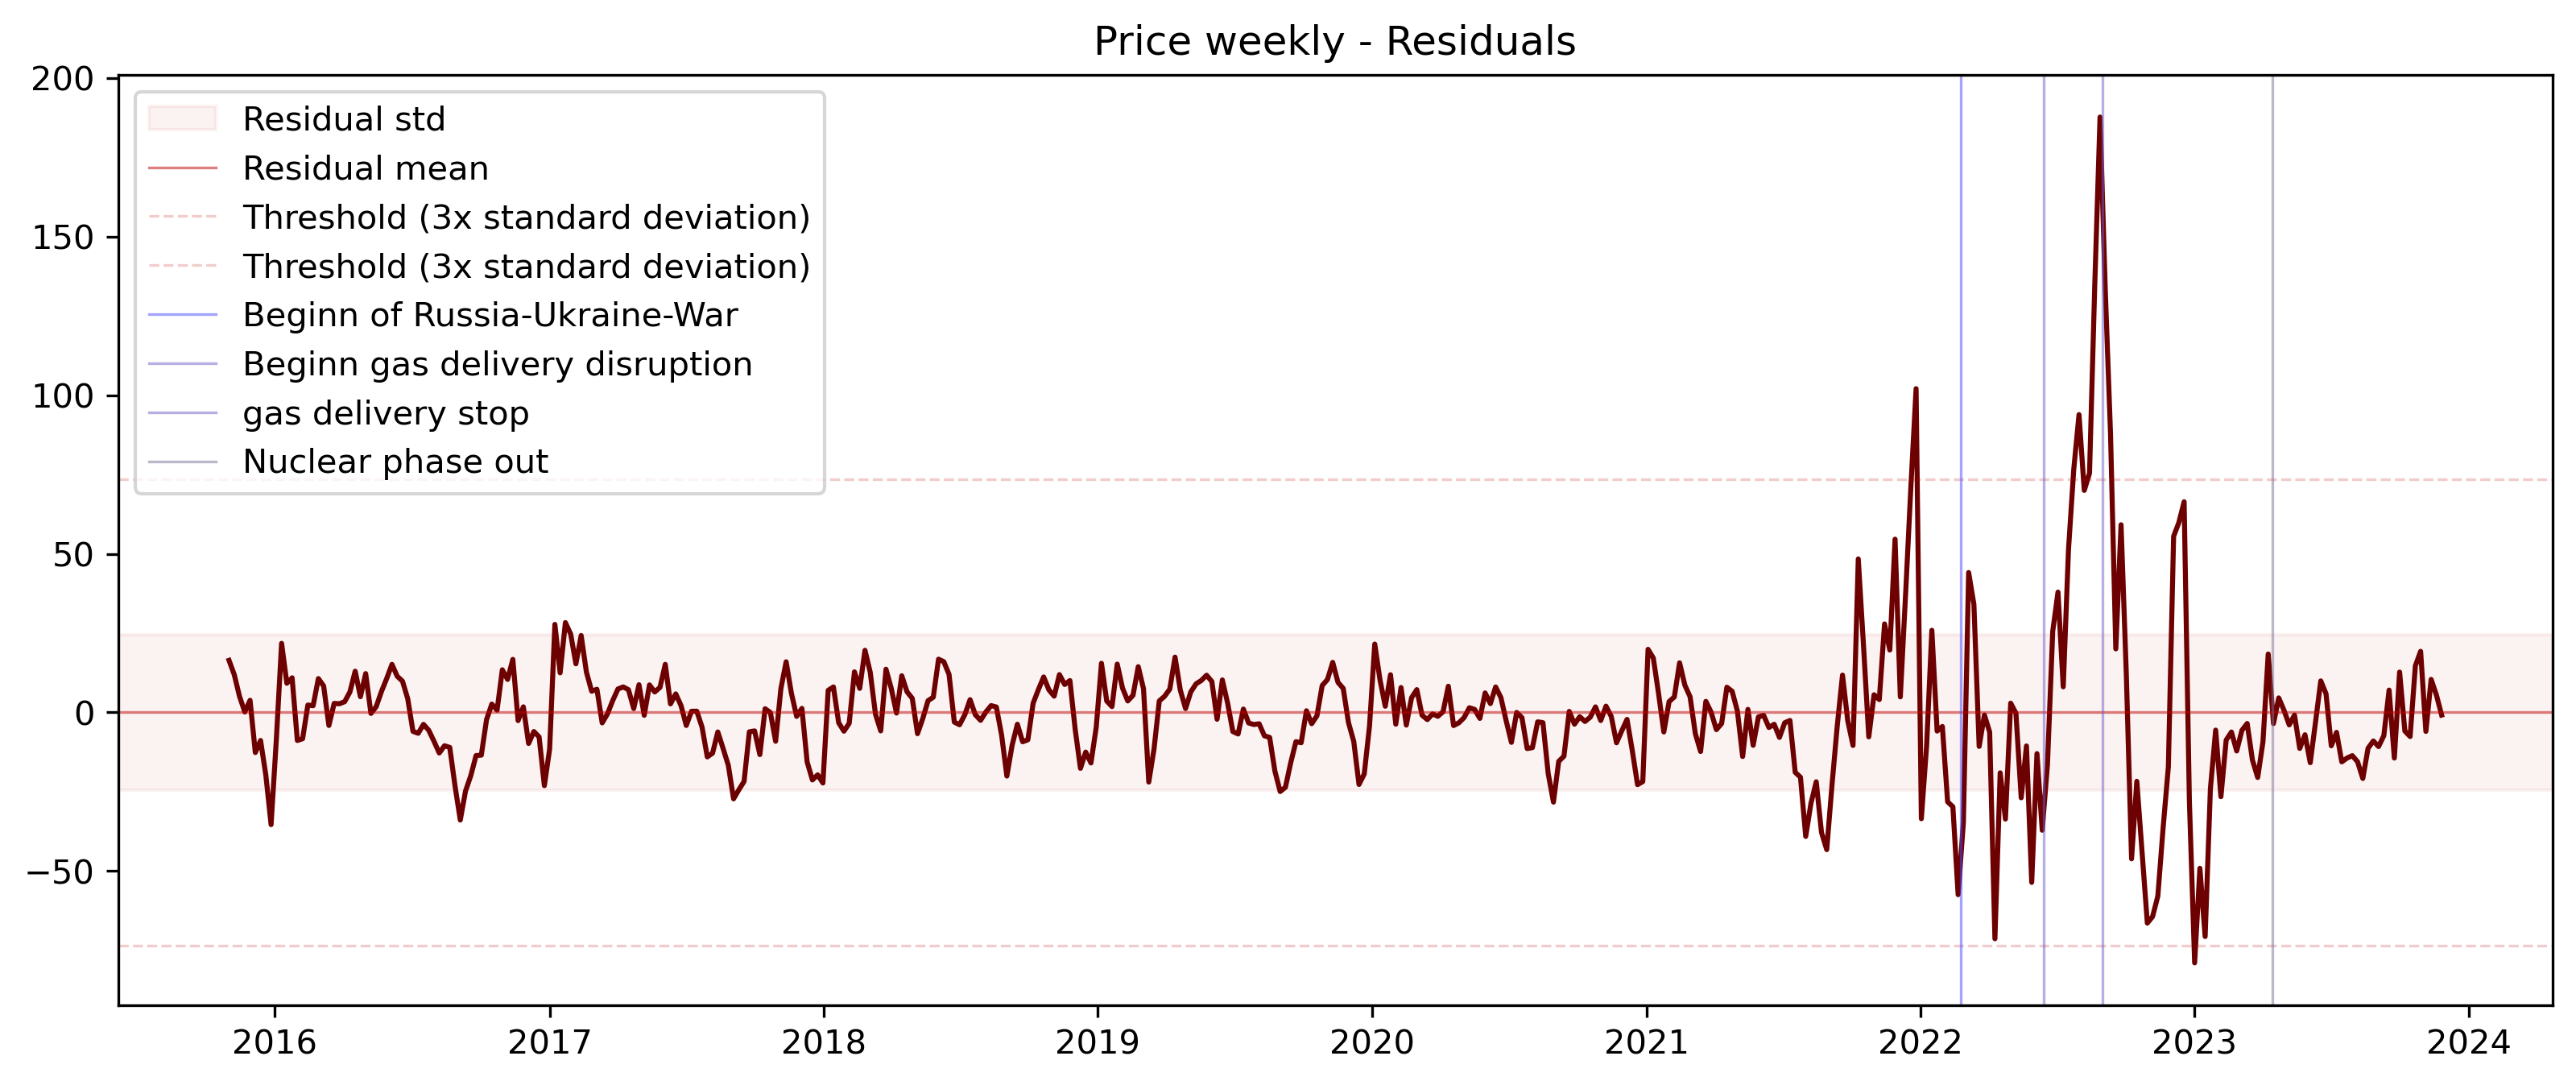

mean_Prices_GER_weekly_residual: 0.12770983216438064
std_Prices_GER_weekly_residual: 24.509322794739003


In [380]:
mean_Prices_GER_weekly_residual = np.mean(Prices_GER_weekly['Residual_adjusted'])
std_Prices_GER_weekly_residual = np.std(Prices_GER_weekly['Residual_adjusted'])
threshold = std_Prices_GER_weekly_residual*3

plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Residual_adjusted'], color = '#6d0000')
plt.axhspan(ymin=-std_Prices_GER_weekly_residual,ymax=std_Prices_GER_weekly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Prices_GER_weekly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')

plt.axhline(y=threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')
plt.axhline(y=-threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')


plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.title('Price weekly - Residuals')
plt.show()

print(f'mean_Prices_GER_weekly_residual: {mean_Prices_GER_weekly_residual}')
print(f'std_Prices_GER_weekly_residual: {std_Prices_GER_weekly_residual}')

A look at the residuals provides a clearer picture of our outliers. Several extreme points stand out. 

In [381]:
marker = Prices_GER_weekly[['Residual_adjusted']].loc[(Prices_GER_weekly['Residual_adjusted'] >=3*std_Prices_GER_weekly_residual)|(Prices_GER_weekly['Residual_adjusted'] <=-3*std_Prices_GER_weekly_residual)].sort_values('Residual_adjusted', ascending = False)


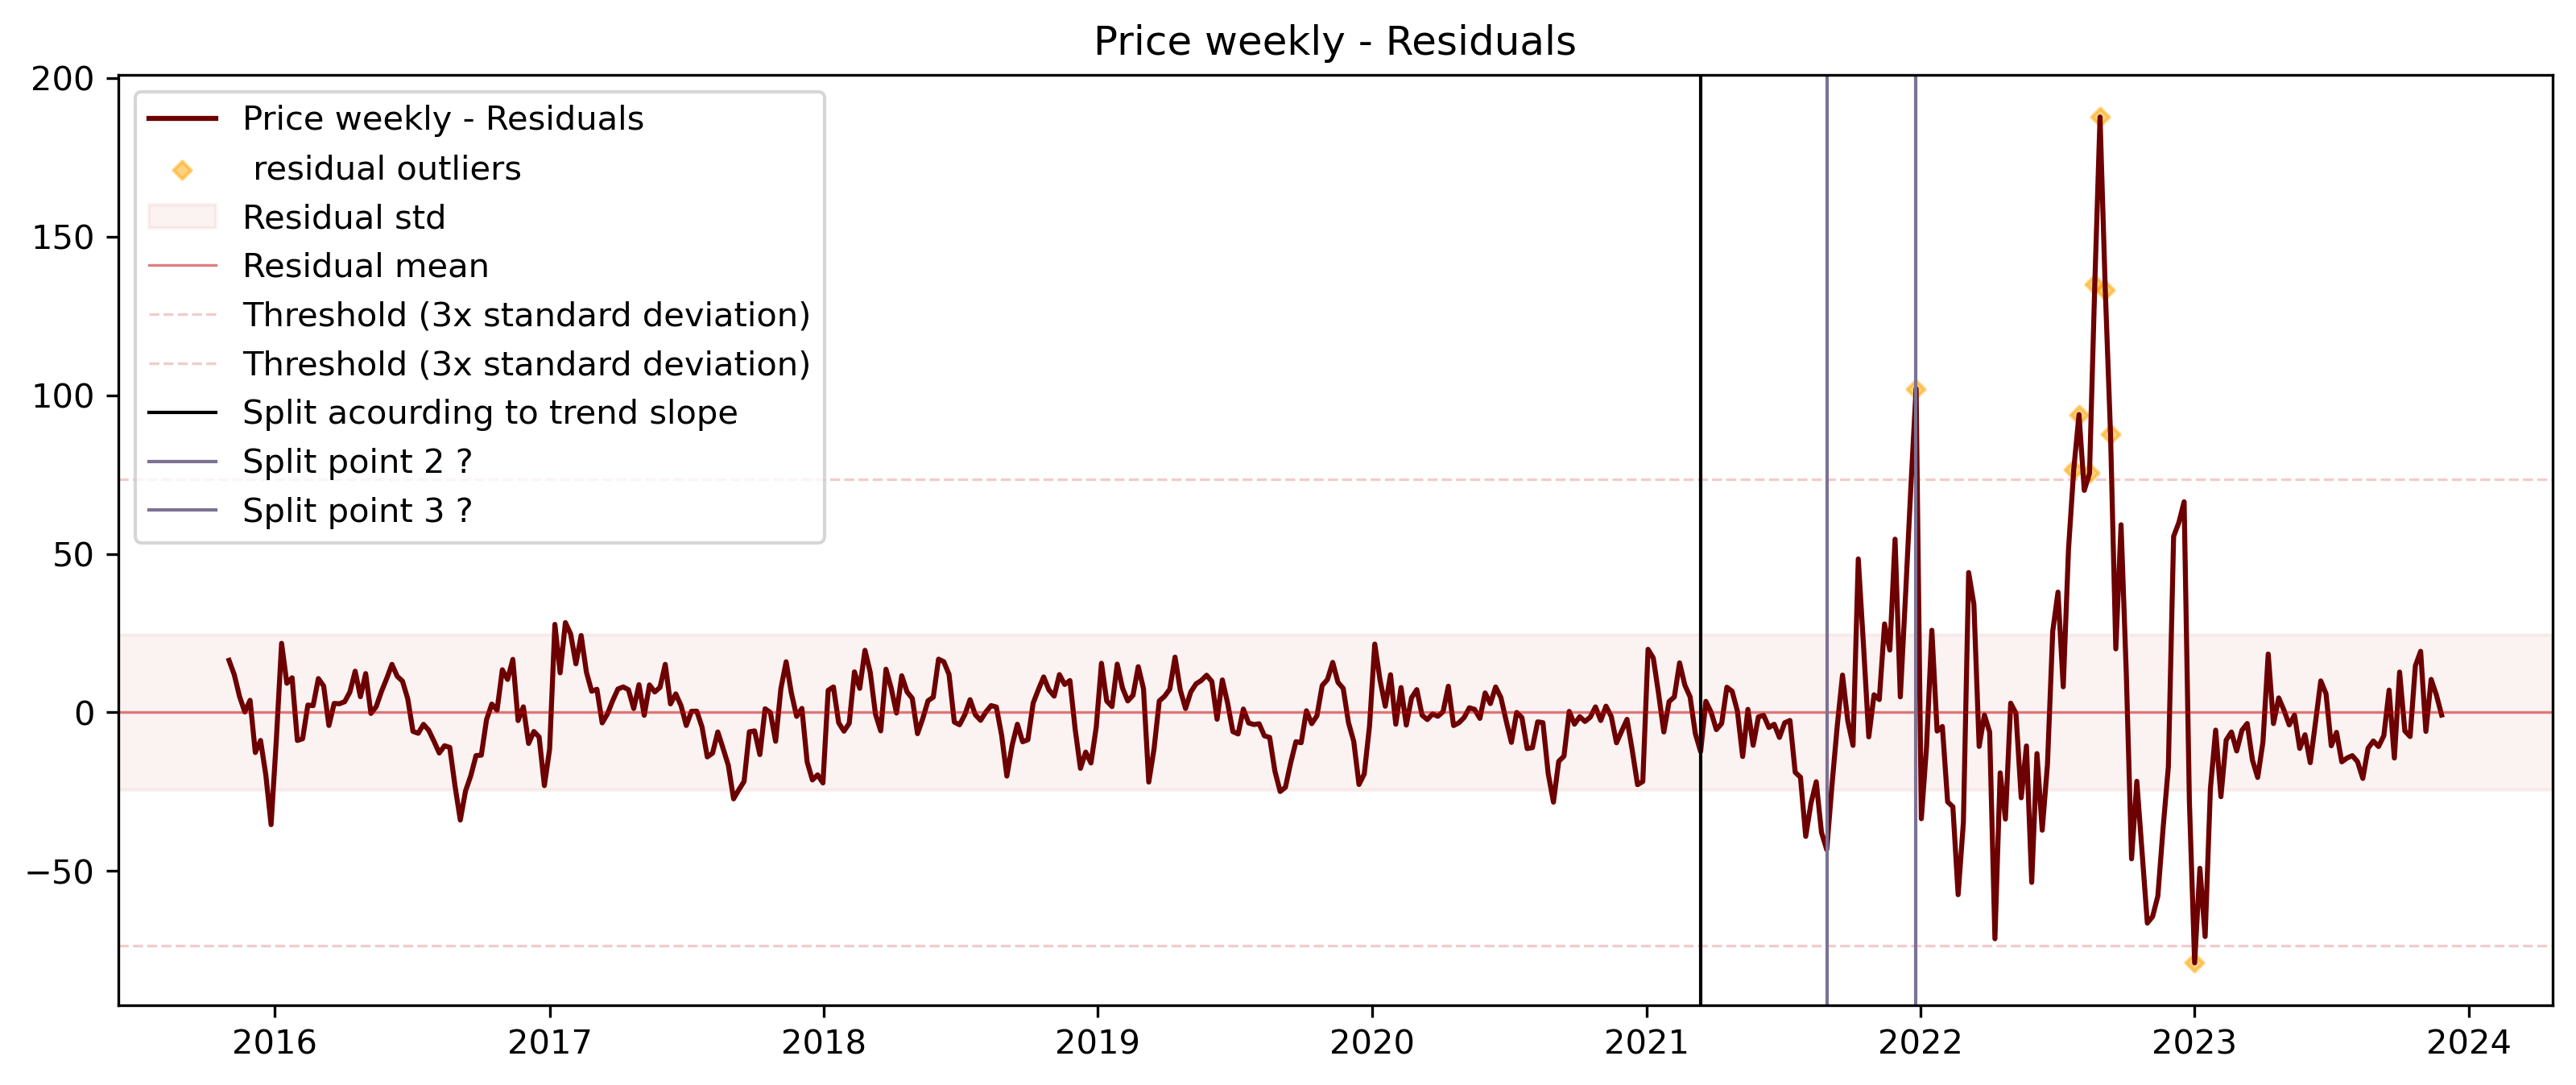

mean_Prices_GER_weekly_residual: 0.12770983216438064
std_Prices_GER_weekly_residual: 24.509322794739003


In [383]:
mean_Prices_GER_weekly_residual = np.mean(Prices_GER_weekly['Residual_adjusted'])
std_Prices_GER_weekly_residual = np.std(Prices_GER_weekly['Residual_adjusted'])
threshold = std_Prices_GER_weekly_residual*3

plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Residual_adjusted'], color = '#6d0000', label = 'Price weekly - Residuals')
plt.scatter(x=marker.index, y= marker['Residual_adjusted'], color = '#ffa600',alpha = 0.5, s=14,  marker ='D' , label = ' residual outliers')
plt.axhspan(ymin=-std_Prices_GER_weekly_residual,ymax=std_Prices_GER_weekly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Prices_GER_weekly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')

plt.axhline(y=threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')
plt.axhline(y=-threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')


#Question for Miranda:
plt.axvline(x=dt.datetime(2021,3,14),color = '#000000', alpha = 1, linewidth = 1,  label = 'Split acourding to trend slope')

plt.axvline(x=dt.datetime(2021,8,29),color = '#7b7294', alpha = 1, linewidth = 1,  label = 'Split point 2 ? ')
plt.axvline(x=dt.datetime(2021,12,26),color = '#7b7294', alpha = 1, linewidth = 1,  label = 'Split point 3 ? ')

plt.legend()
plt.title('Price weekly - Residuals')
plt.show()

print(f'mean_Prices_GER_weekly_residual: {mean_Prices_GER_weekly_residual}')
print(f'std_Prices_GER_weekly_residual: {std_Prices_GER_weekly_residual}')

In [384]:
marker.sort_index()

Residual_adjusted
Start                        
2021-12-26         102.048152
2022-07-24          76.599882
2022-07-31          93.873211
2022-08-14          75.409237
2022-08-21         134.879657
2022-08-28         187.646867
2022-09-04         133.160032
2022-09-11          87.629995
2023-01-01         -78.916212

In [418]:
date_range_change = '2021-03-14 00:00:00'
date_range_change_dt = dt.datetime.strptime(date_range_change, '%Y-%m-%d %H:%M:%S')

In [419]:
Prices_range_1 = Prices.loc[Prices.index <= date_range_change]
Prices_range_2 = Prices.loc[Prices.index > date_range_change]

Definition of the time range (monthly, weekly, daily, hourly)

In [428]:
Prices_GER_weekly_date_range_1 = decomposition_df(Prices_range_1, 'Germany_Luxembourg', 'W', 'mean')
Prices_GER_weekly_date_range_2 = decomposition_df(Prices_range_2, 'Germany_Luxembourg', 'W', 'mean').drop(index='2021-03-14')


In [446]:
Prices_GER_monthly_date_range_1 = decomposition_df(Prices_range_1, 'Germany_Luxembourg', 'MS', 'mean')
Prices_GER_monthly_date_range_2 = decomposition_df(Prices_range_2, 'Germany_Luxembourg', 'MS', 'mean').drop(index='2021-03-01')

In [447]:
Inflation_weekly_electricity_date_range_1 = Inflation_weekly_electricity.loc[Inflation_weekly_electricity.index <= date_range_change]
Inflation_weekly_electricity_date_range_2 = Inflation_weekly_electricity.loc[Inflation_weekly_electricity.index > date_range_change]

Inflation_monthly_electricity_date_range_1 = Inflation_monthly_electricity.loc[Inflation_monthly_electricity.index <= date_range_change]
Inflation_monthly_electricity_date_range_2 = Inflation_monthly_electricity.loc[Inflation_monthly_electricity.index > date_range_change]

In [432]:
Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'] = Prices_GER_weekly_date_range_1['Germany_Luxembourg'] / Inflation_weekly_electricity_date_range_1['OBS_VALUE'] *100
decompositon= seasonal_decompose(Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'], model='additive')


Prices_GER_weekly_date_range_1['Trend_adjusted'] = decompositon.trend
Prices_GER_weekly_date_range_1['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_weekly_date_range_1['Residual_adjusted'] = decompositon.resid
Prices_GER_weekly_date_range_1['Trend+Seasonal_adjusted'] = Prices_GER_weekly_date_range_1['Seasonal_adjusted'] + Prices_GER_weekly_date_range_1['Trend_adjusted']




Prices_GER_weekly_date_range_2['Germany_Luxembourg_adjusted'] = Prices_GER_weekly_date_range_2['Germany_Luxembourg'] / Inflation_weekly_electricity_date_range_2['OBS_VALUE'] *100
decompositon= seasonal_decompose(Prices_GER_weekly_date_range_2['Germany_Luxembourg_adjusted'], model='additive')


Prices_GER_weekly_date_range_2['Trend_adjusted'] = decompositon.trend
Prices_GER_weekly_date_range_2['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_weekly_date_range_2['Residual_adjusted'] = decompositon.resid
Prices_GER_weekly_date_range_2['Trend+Seasonal_adjusted'] = Prices_GER_weekly_date_range_2['Seasonal_adjusted'] + Prices_GER_weekly_date_range_2['Trend_adjusted']

In [449]:
Prices_GER_monthly_date_range_1['Germany_Luxembourg_adjusted'] = Prices_GER_monthly_date_range_1['Germany_Luxembourg'] / Inflation_monthly_electricity_date_range_1['OBS_VALUE'] *100
decompositon= seasonal_decompose(Prices_GER_monthly_date_range_1['Germany_Luxembourg_adjusted'], model='additive')

Prices_GER_monthly_date_range_1['Trend_adjusted'] = decompositon.trend
Prices_GER_monthly_date_range_1['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_monthly_date_range_1['Residual_adjusted'] = decompositon.resid
Prices_GER_monthly_date_range_1['Trend+Seasonal_adjusted'] = Prices_GER_monthly_date_range_1['Seasonal_adjusted'] + Prices_GER_monthly_date_range_1['Trend_adjusted']



Prices_GER_monthly_date_range_2['Germany_Luxembourg_adjusted'] = Prices_GER_monthly_date_range_2['Germany_Luxembourg'] / Inflation_monthly_electricity_date_range_2['OBS_VALUE'] *100
decompositon= seasonal_decompose(Prices_GER_monthly_date_range_2['Germany_Luxembourg_adjusted'], model='additive')

Prices_GER_monthly_date_range_2['Trend_adjusted'] = decompositon.trend
Prices_GER_monthly_date_range_2['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_monthly_date_range_2['Residual_adjusted'] = decompositon.resid
Prices_GER_monthly_date_range_2['Trend+Seasonal_adjusted'] = Prices_GER_monthly_date_range_2['Seasonal_adjusted'] + Prices_GER_monthly_date_range_2['Trend_adjusted']

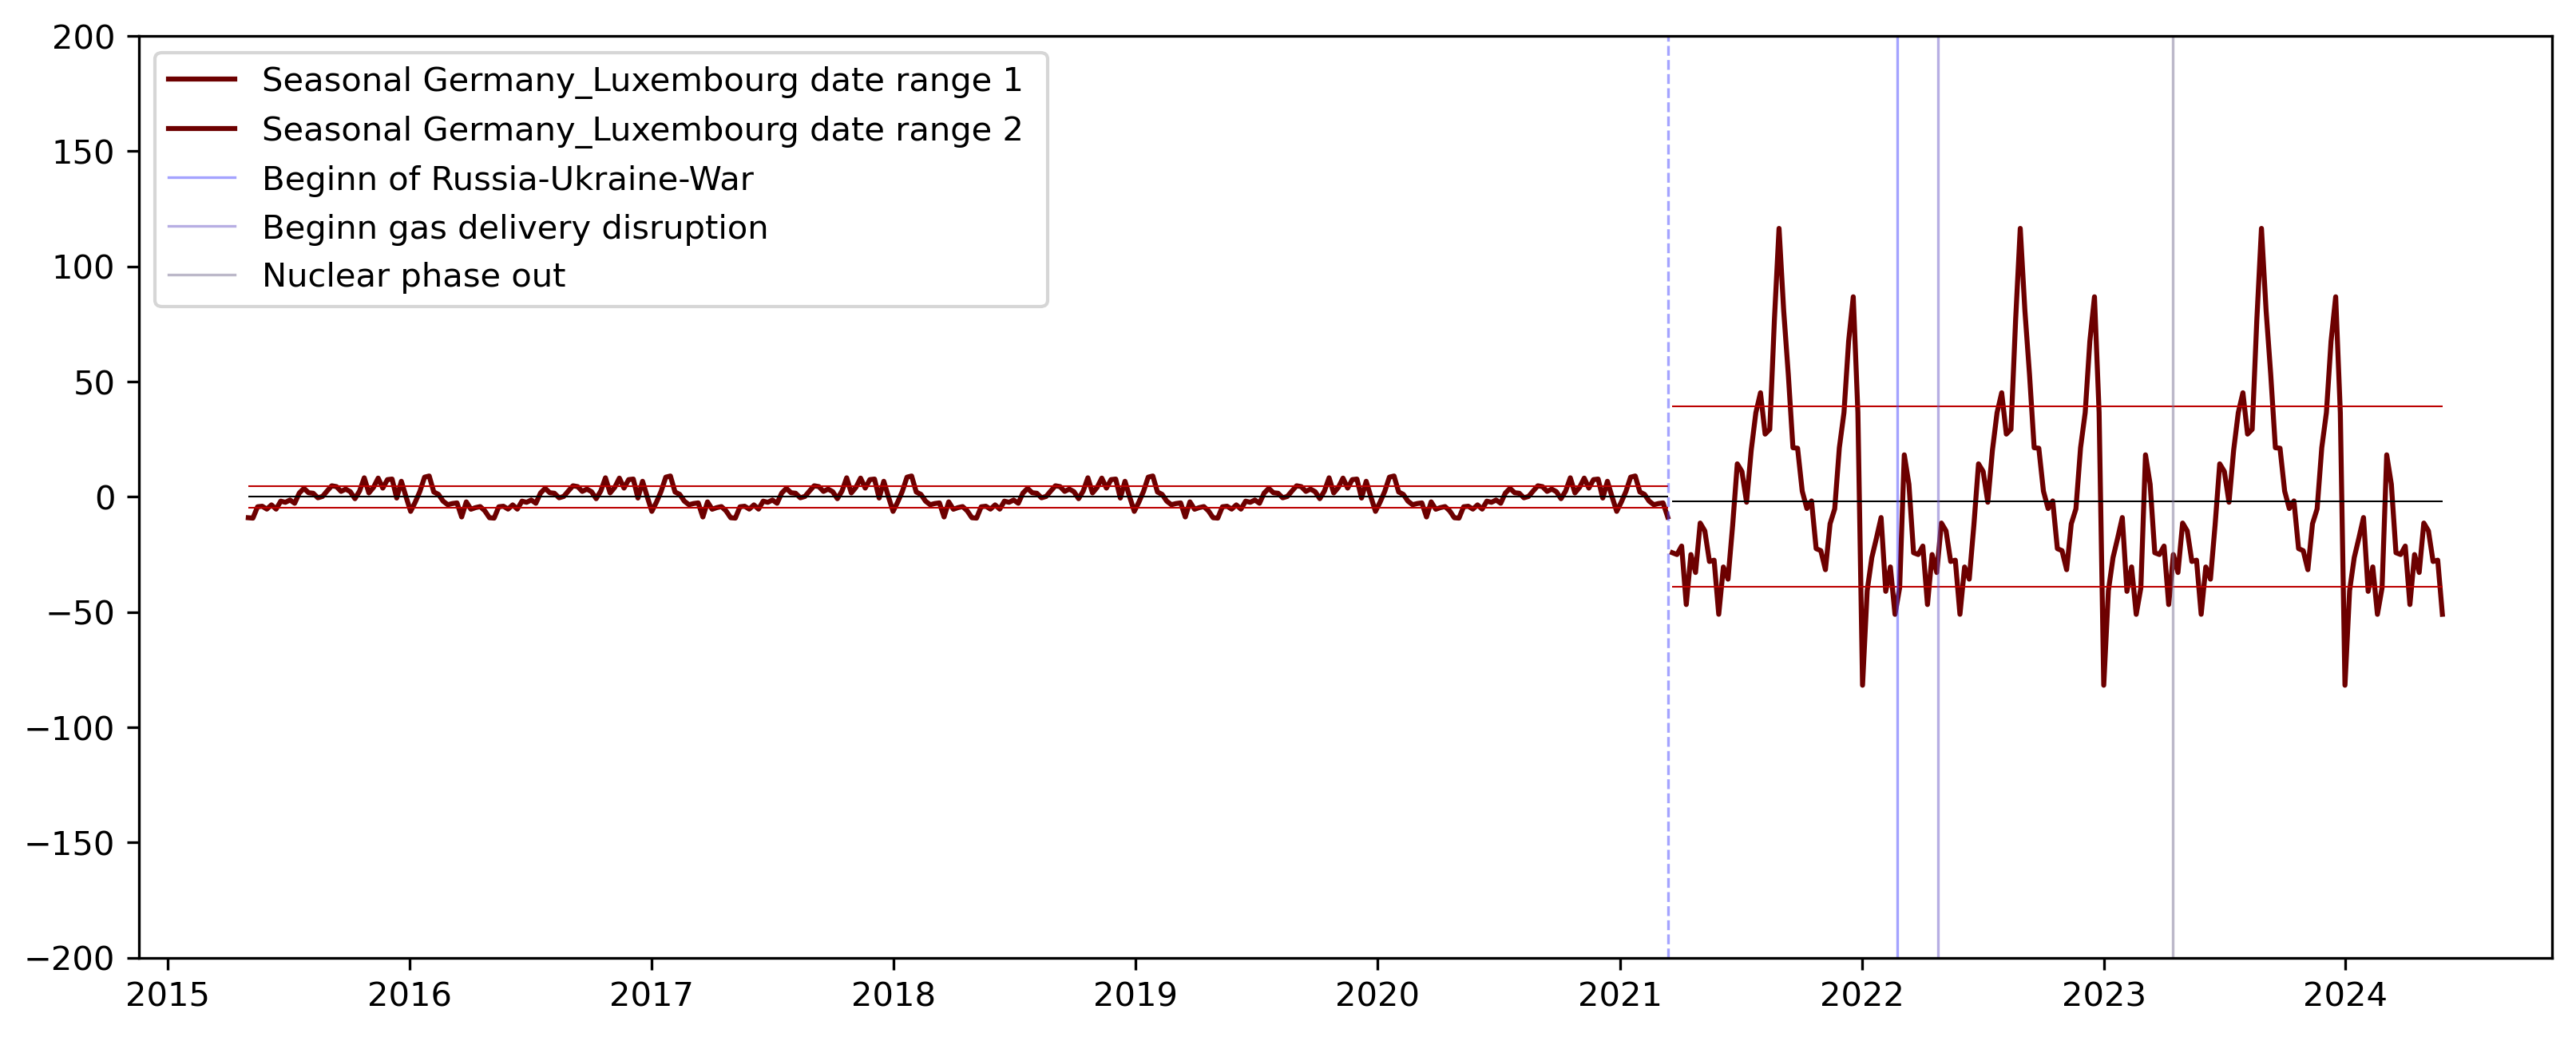

phase 1 mean: 0.07
phase 2 STD: +/- 4.7059 around 0.07
phase 2 mean: -1.84
phase 2 STD: +/- 39.1844 around -1.84


In [434]:

range1_mean = Prices_GER_weekly_date_range_1['Seasonal_adjusted'].mean()
range1_std = Prices_GER_weekly_date_range_1['Seasonal_adjusted'].std()

range2_mean = Prices_GER_weekly_date_range_2['Seasonal_adjusted'].mean()
range2_std = Prices_GER_weekly_date_range_2['Seasonal_adjusted'].std()

plt.figure(figsize= (13,5), dpi = 300)

# plt.plot(Prices_GER_monthly['Seasonal'], label = 'Seasonal Germany_Luxembourg date range 1 ', color = '#000000', linewidth = 0.2)
plt.plot(Prices_GER_weekly_date_range_1['Seasonal_adjusted'], label = 'Seasonal Germany_Luxembourg date range 1 ', color = '#6d0000')
plt.plot(Prices_GER_weekly_date_range_2['Seasonal_adjusted'], label = 'Seasonal Germany_Luxembourg date range 2 ', color = '#6d0000')





plt.hlines(y=range1_mean,xmin=Prices_GER_weekly_date_range_1.index.min() ,xmax=Prices_GER_weekly_date_range_1.index.max(), linewidth = 0.5, color = '#000000')
plt.hlines(y=range2_mean,xmax=Prices_GER_weekly_date_range_2.index.max(),xmin=Prices_GER_weekly_date_range_2.index.min(), linewidth = 0.5, color = '#000000')


plt.hlines(y=range1_std,xmin=Prices_GER_weekly_date_range_1.index.min() ,xmax=Prices_GER_weekly_date_range_1.index.max(), linewidth = 0.5, color = '#bc0000')
plt.hlines(y=-range1_std,xmin=Prices_GER_weekly_date_range_1.index.min() ,xmax=Prices_GER_weekly_date_range_1.index.max(), linewidth = 0.5, color = '#bc0000')
plt.hlines(y=range2_std,xmax=Prices_GER_weekly_date_range_2.index.max(),xmin=Prices_GER_weekly_date_range_2.index.min(), linewidth = 0.5, color = '#bc0000')
plt.hlines(y=-range2_std,xmax=Prices_GER_weekly_date_range_2.index.max(),xmin=Prices_GER_weekly_date_range_2.index.min(), linewidth = 0.5, color = '#bc0000')

plt.vlines(x=date_range_change_dt, ymin=-200,ymax=200,color = '#4a48ff', alpha = .5, linewidth = .8, linestyles='--')



plt.ylim(-200,200)
plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,4,26),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()



print(f'phase 1 mean: {(range1_mean).round(2)}')
print(f'phase 2 STD: +/- {(range1_std).round(4)} around {(range1_mean).round(2)}')
print(f'phase 2 mean: {(range2_mean).round(2)}')
print(f'phase 2 STD: +/- {(range2_std).round(4)} around {(range2_mean).round(2)}')

Question for Miranda: Sanity check - does it make sense to split the data on this point 

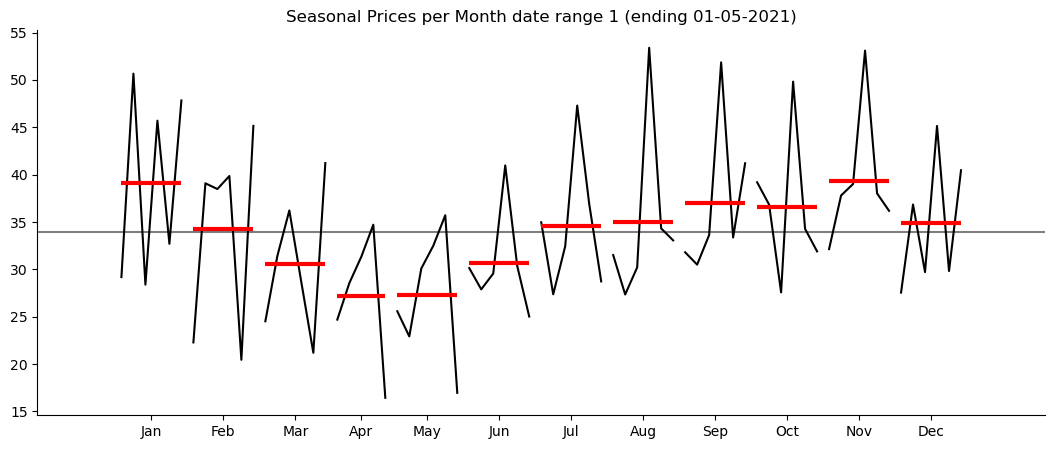

In [450]:
plt.figure(figsize=(13, 5))

month_plot(Prices_GER_monthly_date_range_1['Germany_Luxembourg_adjusted'], ax=plt.gca())
plt.title("Seasonal Prices per Month date range 1 (ending 01-05-2021)")
plt.axhline(y=Prices_GER_monthly_date_range_1['Germany_Luxembourg_adjusted'].mean(), color='#000000', alpha = .5)

sns.despine()
plt.show()

Question for Miranda: why did my Seasonality goes up in Jan-Apr (depends on the point), does it makes sense?

- Outlier detection
- 3 x Standard Deviation 
- less x standard deviation? 



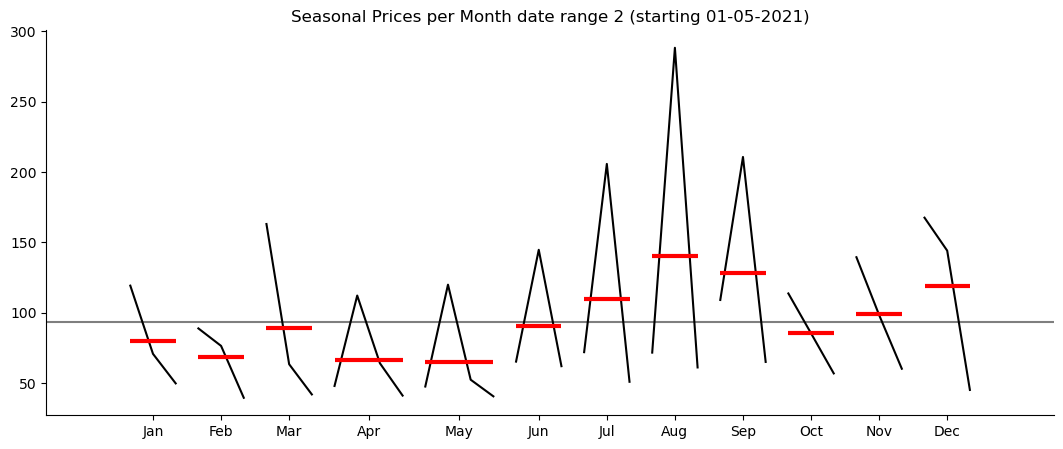

In [451]:
plt.figure(figsize=(13, 5))

month_plot(Prices_GER_monthly_date_range_2['Germany_Luxembourg_adjusted'], ax=plt.gca())
plt.title("Seasonal Prices per Month date range 2 (starting 01-05-2021)")
plt.axhline(y=Prices_GER_monthly_date_range_2['Germany_Luxembourg_adjusted'].mean(), color='#000000', alpha = .5)

sns.despine()
plt.show()

## Forecasting

Forecasting of the price with historical price data 

In [454]:
Prices_GER_weekly_date_range_1['Seasonal_difference'] = Prices_GER_weekly_date_range_1['Germany_Luxembourg'].diff(52)
Prices_GER_weekly_date_range_1['Seasonal_difference_adjusted'] = Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'].diff(52)

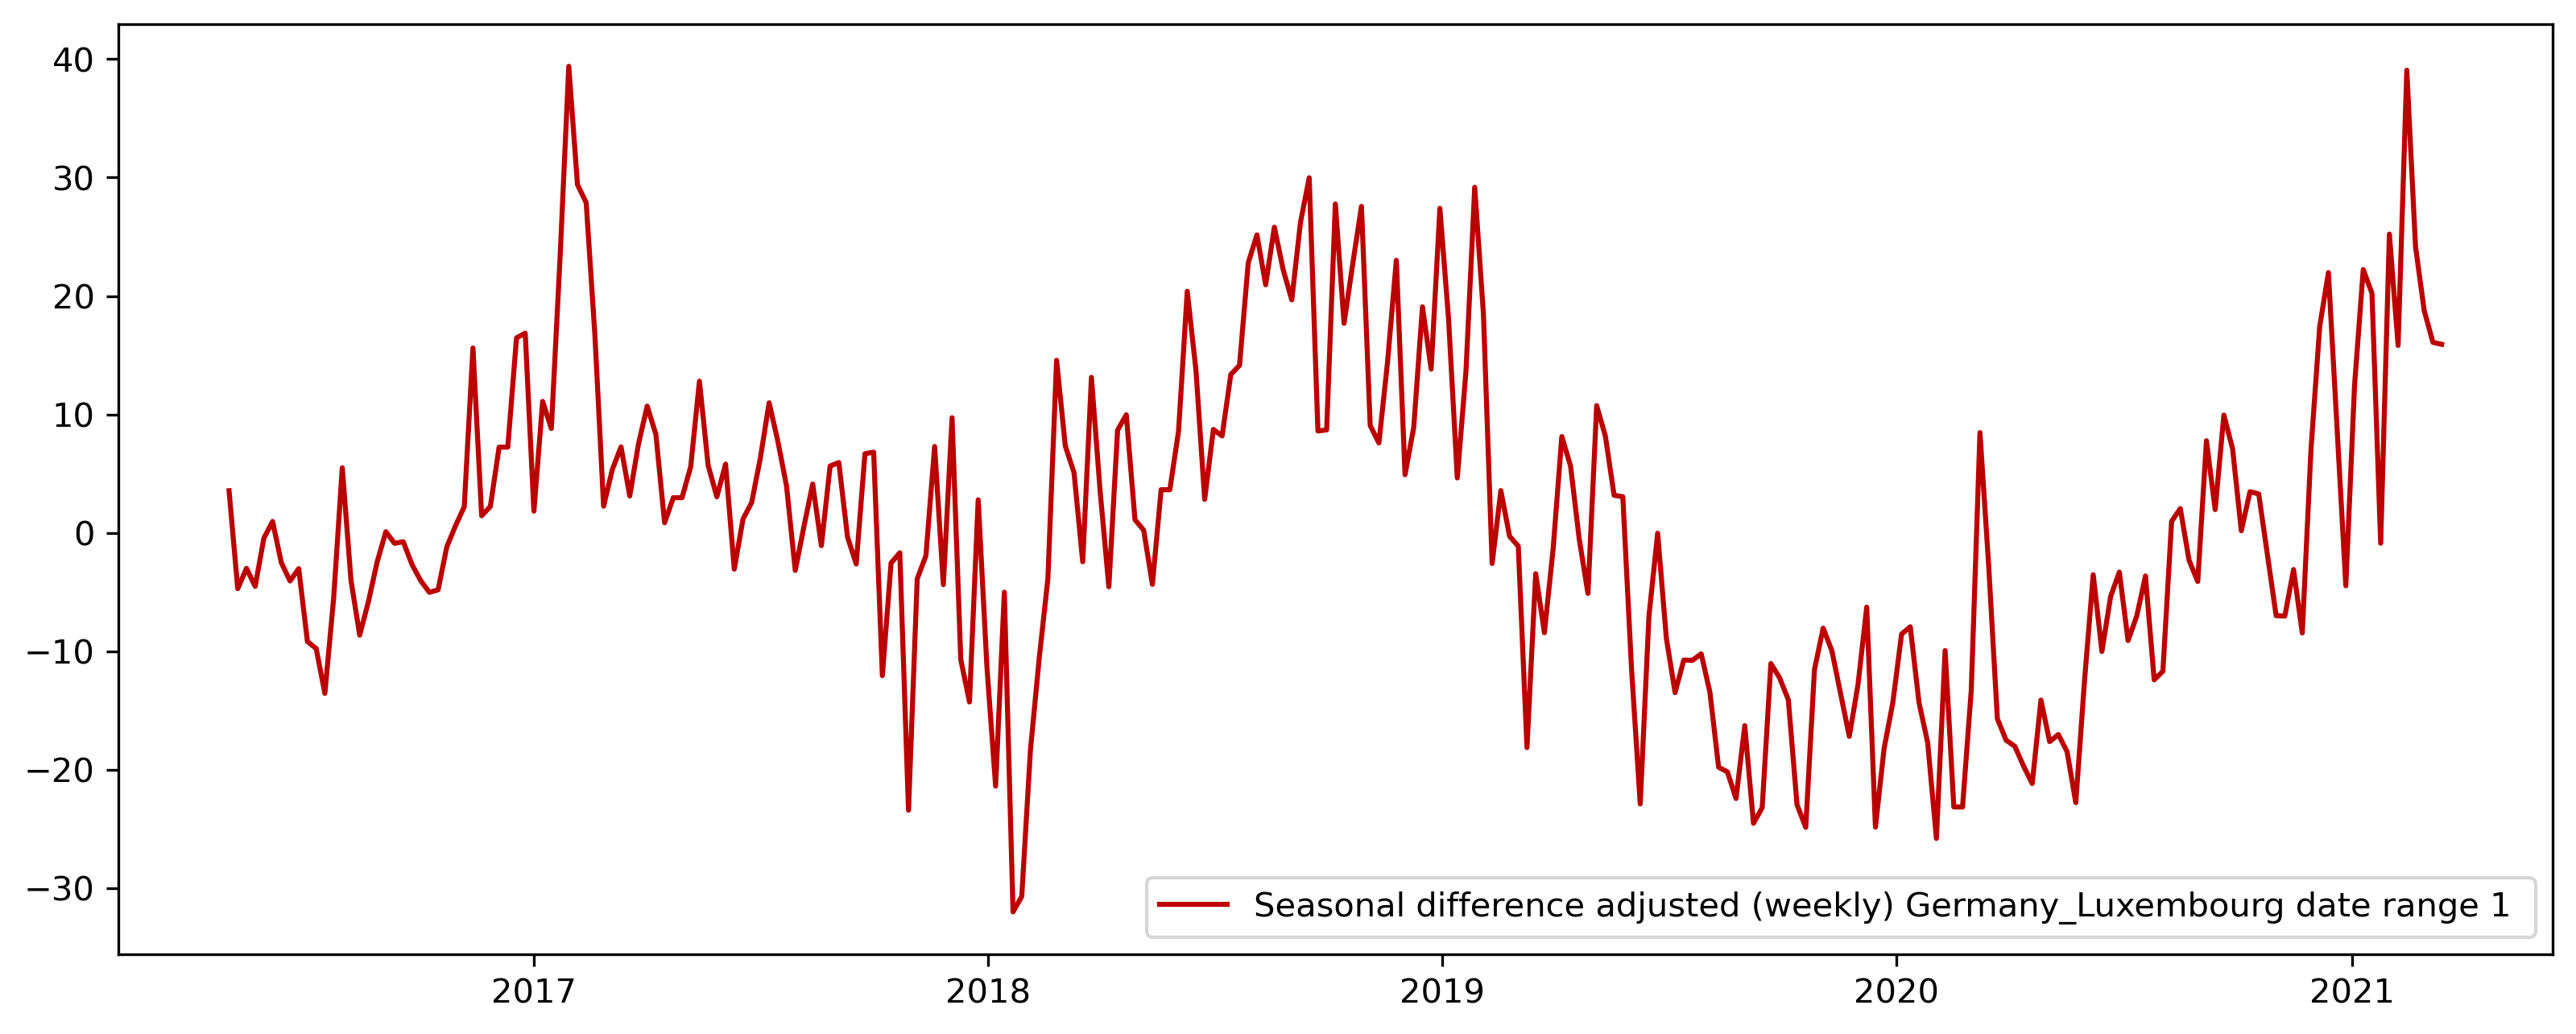

In [457]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly_date_range_1['Seasonal_difference_adjusted'], label = 'Seasonal difference adjusted (weekly) Germany_Luxembourg date range 1 ', color = '#bc0000')
plt.legend()
plt.show()

In [458]:
train = Prices_GER_weekly_date_range_1[['Seasonal_difference_adjusted']].loc[Prices_GER_weekly_date_range_1.index <= "2020-04-01"].dropna()
test = Prices_GER_weekly_date_range_1[['Seasonal_difference_adjusted']].loc[Prices_GER_weekly_date_range_1.index > "2020-04-01"]

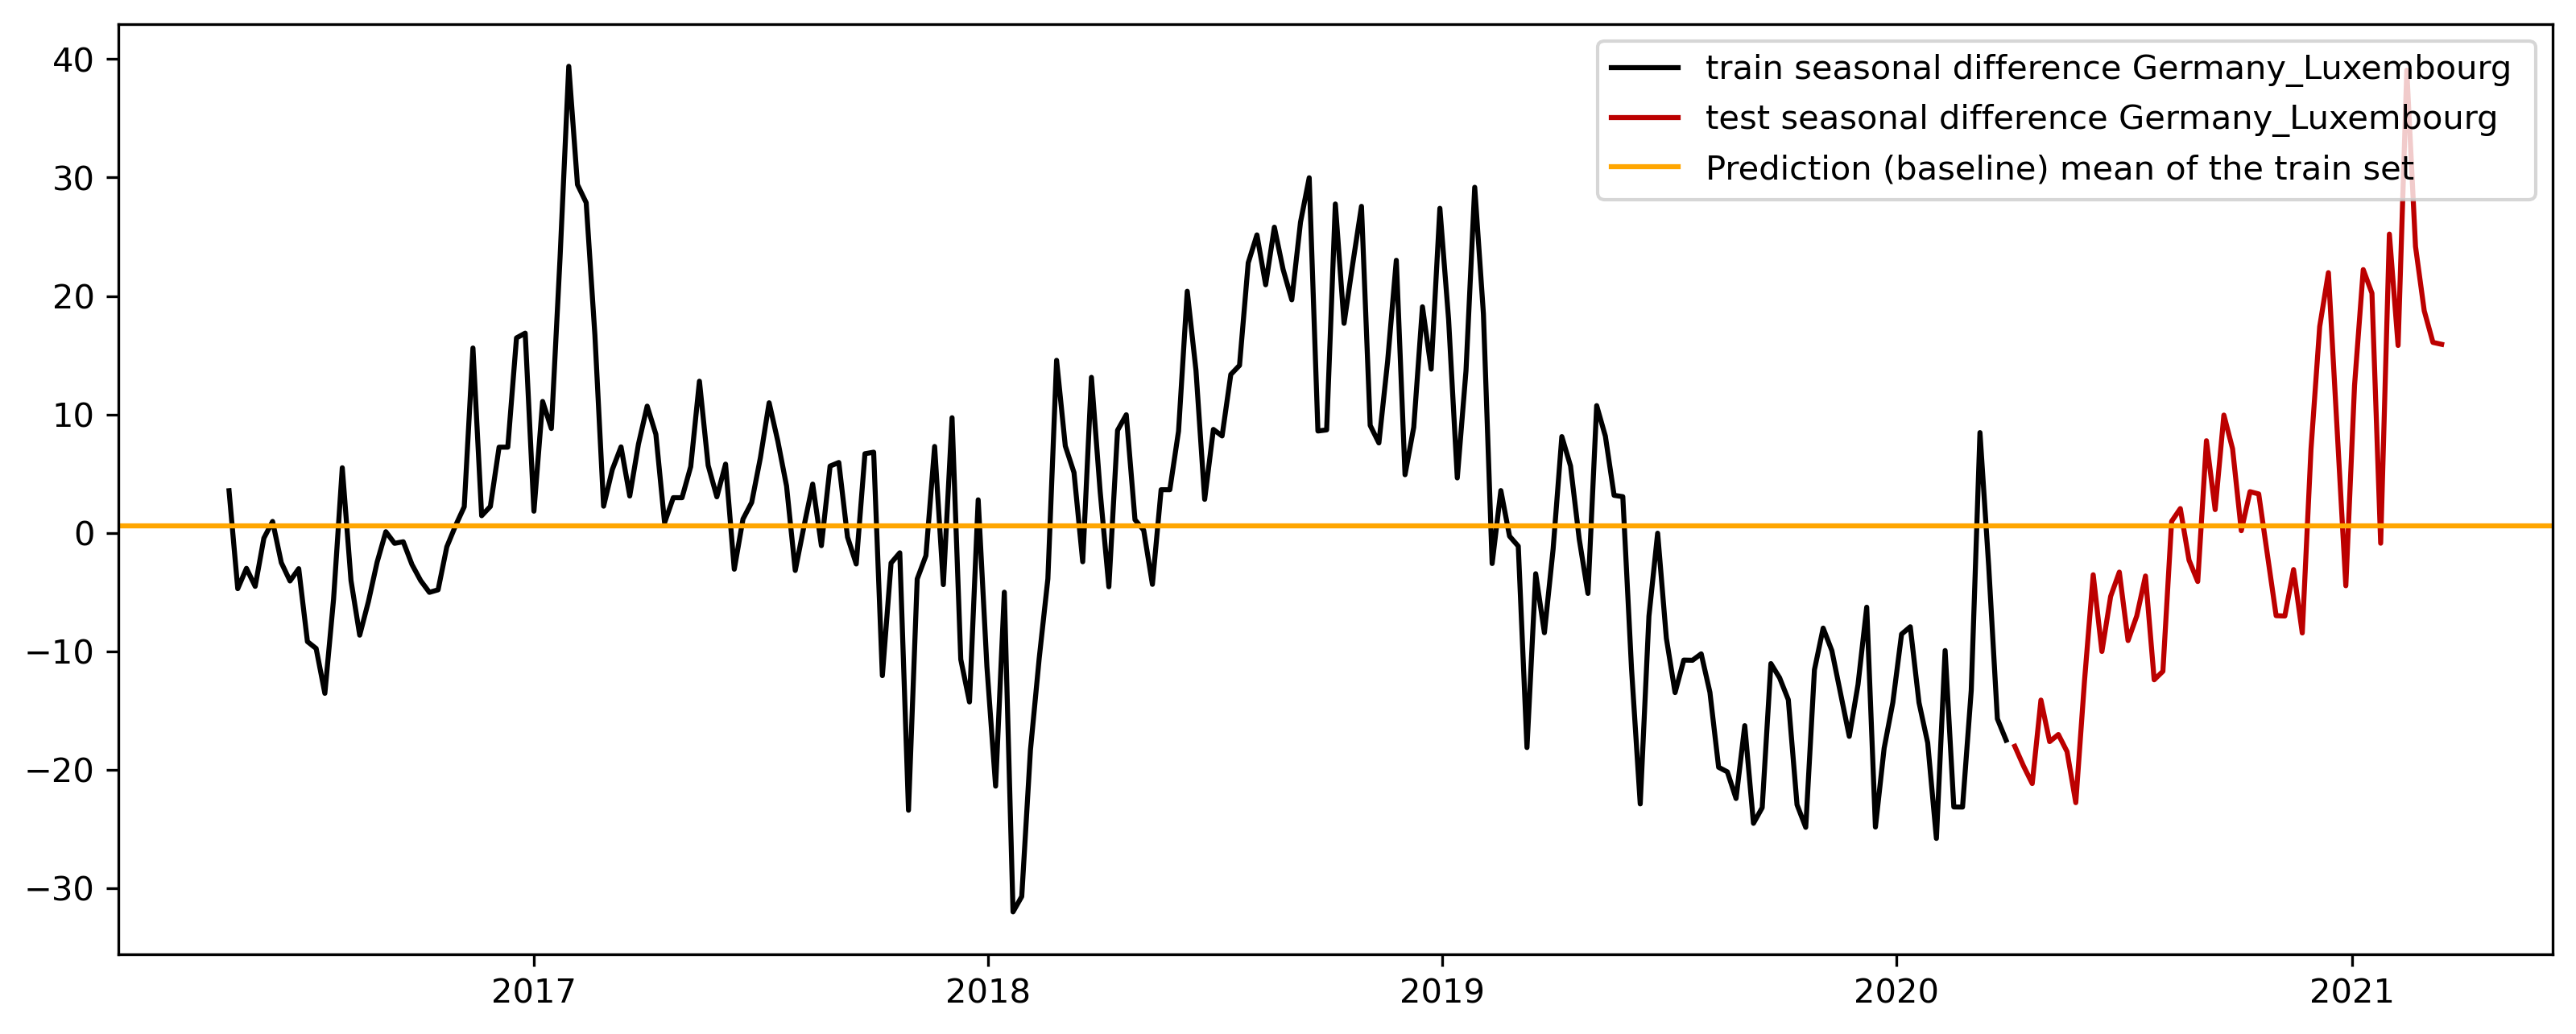

In [459]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(train['Seasonal_difference_adjusted'], label = 'train seasonal difference Germany_Luxembourg ', color = '#000000')
plt.plot(test['Seasonal_difference_adjusted'], label = 'test seasonal difference Germany_Luxembourg', color = '#bc0000')
plt.axhline(y= train['Seasonal_difference_adjusted'].mean(),xmax=0, xmin=100, label = 'Prediction (baseline) mean of the train set', color= '#ffa600')

plt.legend()
plt.show()

In [460]:
train_series = pd.Series(train['Seasonal_difference_adjusted'].values, index=train.index, name='Seasonal_difference_adjusted')
test_series =  pd.Series(test['Seasonal_difference_adjusted'].values, index=test.index, name='Seasonal_difference_adjusted')

full_index = full_index = pd.concat([train_series, test_series]).index
base_line = np.full(full_index.shape, np.mean(train_series))

predictions = pd.Series(data=base_line, index=full_index)

In [462]:
def mean_absolute_percentage_error(true_values, predicted_values):
    """
    Calculate the mean absolute percentage error. 
    Find the prediction error and devide by the true value, then average.
    """
    
    error = true_values - predicted_values
    error.dropna()
    absolute_percentage_error = np.abs(error/true_values)
    mape = absolute_percentage_error.mean() * 100
    
    return mape



In [463]:
train_mape = mean_absolute_percentage_error(train_series, predictions[train_series.index])
test_mape = mean_absolute_percentage_error(test_series, predictions[test_series.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: 117.94%
Test MAPE on the difference: 104.6%


Autocorrelation

In [464]:
Prices_GER_weekly_date_range_1['Seasonal_difference_adjusted'] = Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'].diff(52)

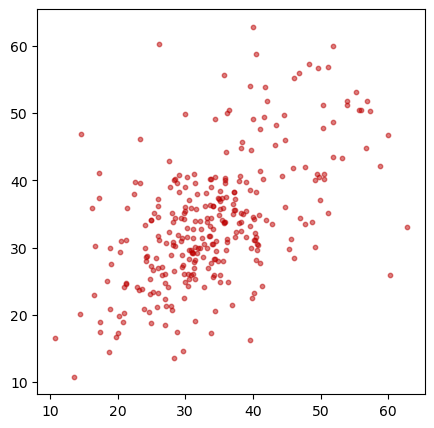

In [468]:
plt.figure(figsize=(5,5), dpi=100)

plt.scatter(x=Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'],y=Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'].shift(4), color='#bc0000', s= 10, alpha=0.5)

plt.show()

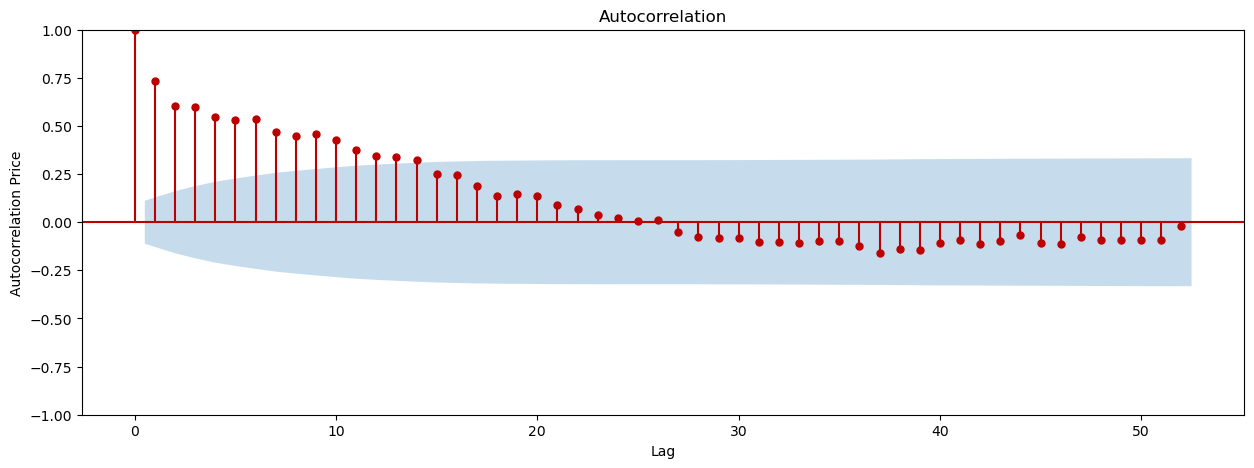

In [469]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 5))

# put the acf plot on the current axis
plot_acf(Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'], lags=52, ax=plt.gca(), color= '#bc0000', vlines_kwargs={"colors": '#bc0000'})
plt.xlabel('Lag')
plt.ylabel('Autocorrelation Price')
plt.show()

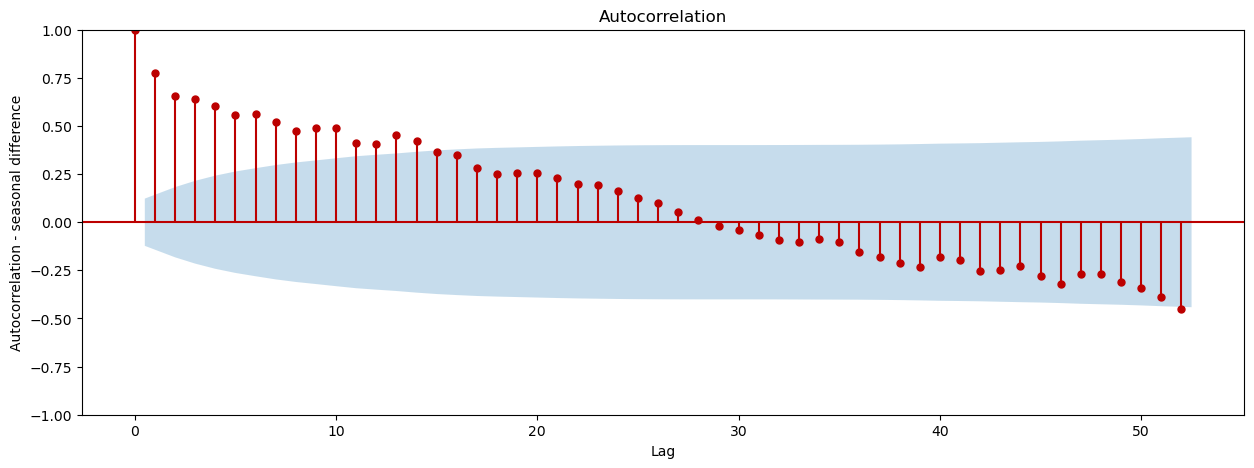

In [470]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 5))

# put the acf plot on the current axis
plot_acf(Prices_GER_weekly_date_range_1['Seasonal_difference_adjusted'].dropna(), lags=52, ax=plt.gca(), color= '#bc0000', vlines_kwargs={"colors": '#bc0000'})
plt.xlabel('Lag')
plt.ylabel('Autocorrelation - seasonal difference')
plt.show()

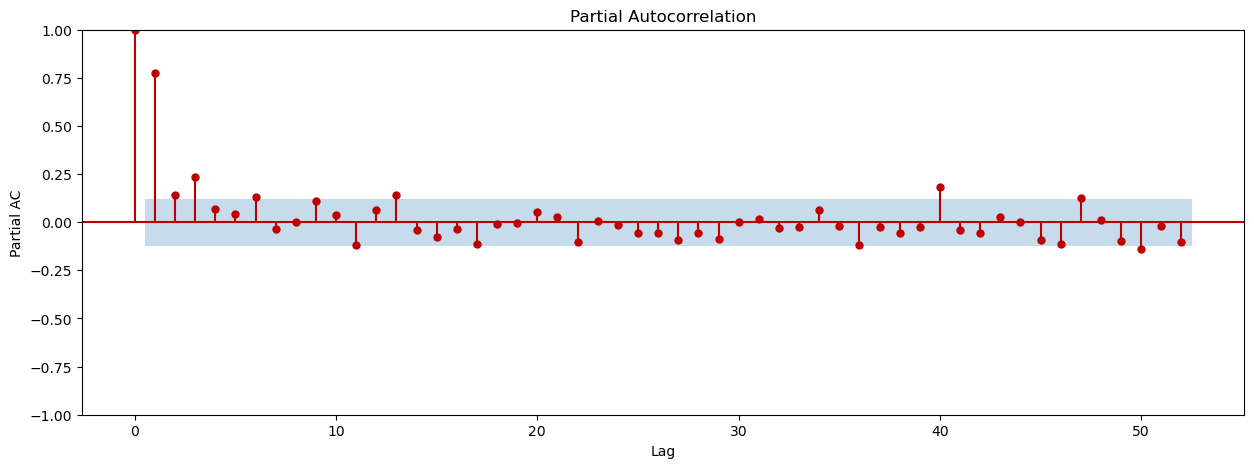

In [471]:
plt.figure(figsize=(15, 5))
plot_pacf(Prices_GER_weekly_date_range_1['Seasonal_difference_adjusted'].dropna(), lags=52, ax=plt.gca(), method='ywm', color= '#bc0000', vlines_kwargs={"colors": '#bc0000'})
plt.xlabel('Lag')
plt.ylabel('Partial AC')
plt.show()

In [472]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p_param = 4

model = SARIMAX(train, order=(p_param, 0, 0), trend="c")
model_fit = model.fit(disp=0)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:     Seasonal_difference_adjusted   No. Observations:                  205
Model:                         SARIMAX(4, 0, 0)   Log Likelihood                -718.143
Date:                          Wed, 19 Jun 2024   AIC                           1448.286
Time:                                  23:10:41   BIC                           1468.224
Sample:                              05-01-2016   HQIC                          1456.351
                                   - 03-29-2020                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.572      0.001      0.999      -1.121       1.122
ar.L1          0.6415      0.072      8.935      0.000       0.501       0.782
ar.L2         -0.0696      0.076     -0.917      0.359      -0.218       0.079
ar.L3          0.2697      0.079      3.402      0.001       0.114       0.425
ar.L4          0.0163      0.061      0.268      0.789      -0.103       0.136
sigma2        64.2389      5.804     11.068      0.000      52.863      75.615
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.25
Prob(Q):                              0.98   Prob(JB):                         0.20
Heteroskedasticity (H):               1.79   Skew:                            -0.07
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [473]:
predictions_SARIMAX = model_fit.predict(start=0, end=len(train)+len(test)-1)

In [474]:
train.index.max()

Timestamp('2020-03-29 00:00:00')

In [475]:
model_fit.forecast(steps=10)

2020-04-05   -10.737878
2020-04-12    -9.947018
2020-04-19   -10.608448
2020-04-26    -9.293890
2020-05-03    -8.080986
2020-05-10    -7.559985
2020-05-17    -6.966424
2020-05-24    -6.273329
2020-05-31    -5.709733
2020-06-07    -5.227852
Freq: W-SUN, Name: predicted_mean, dtype: float64

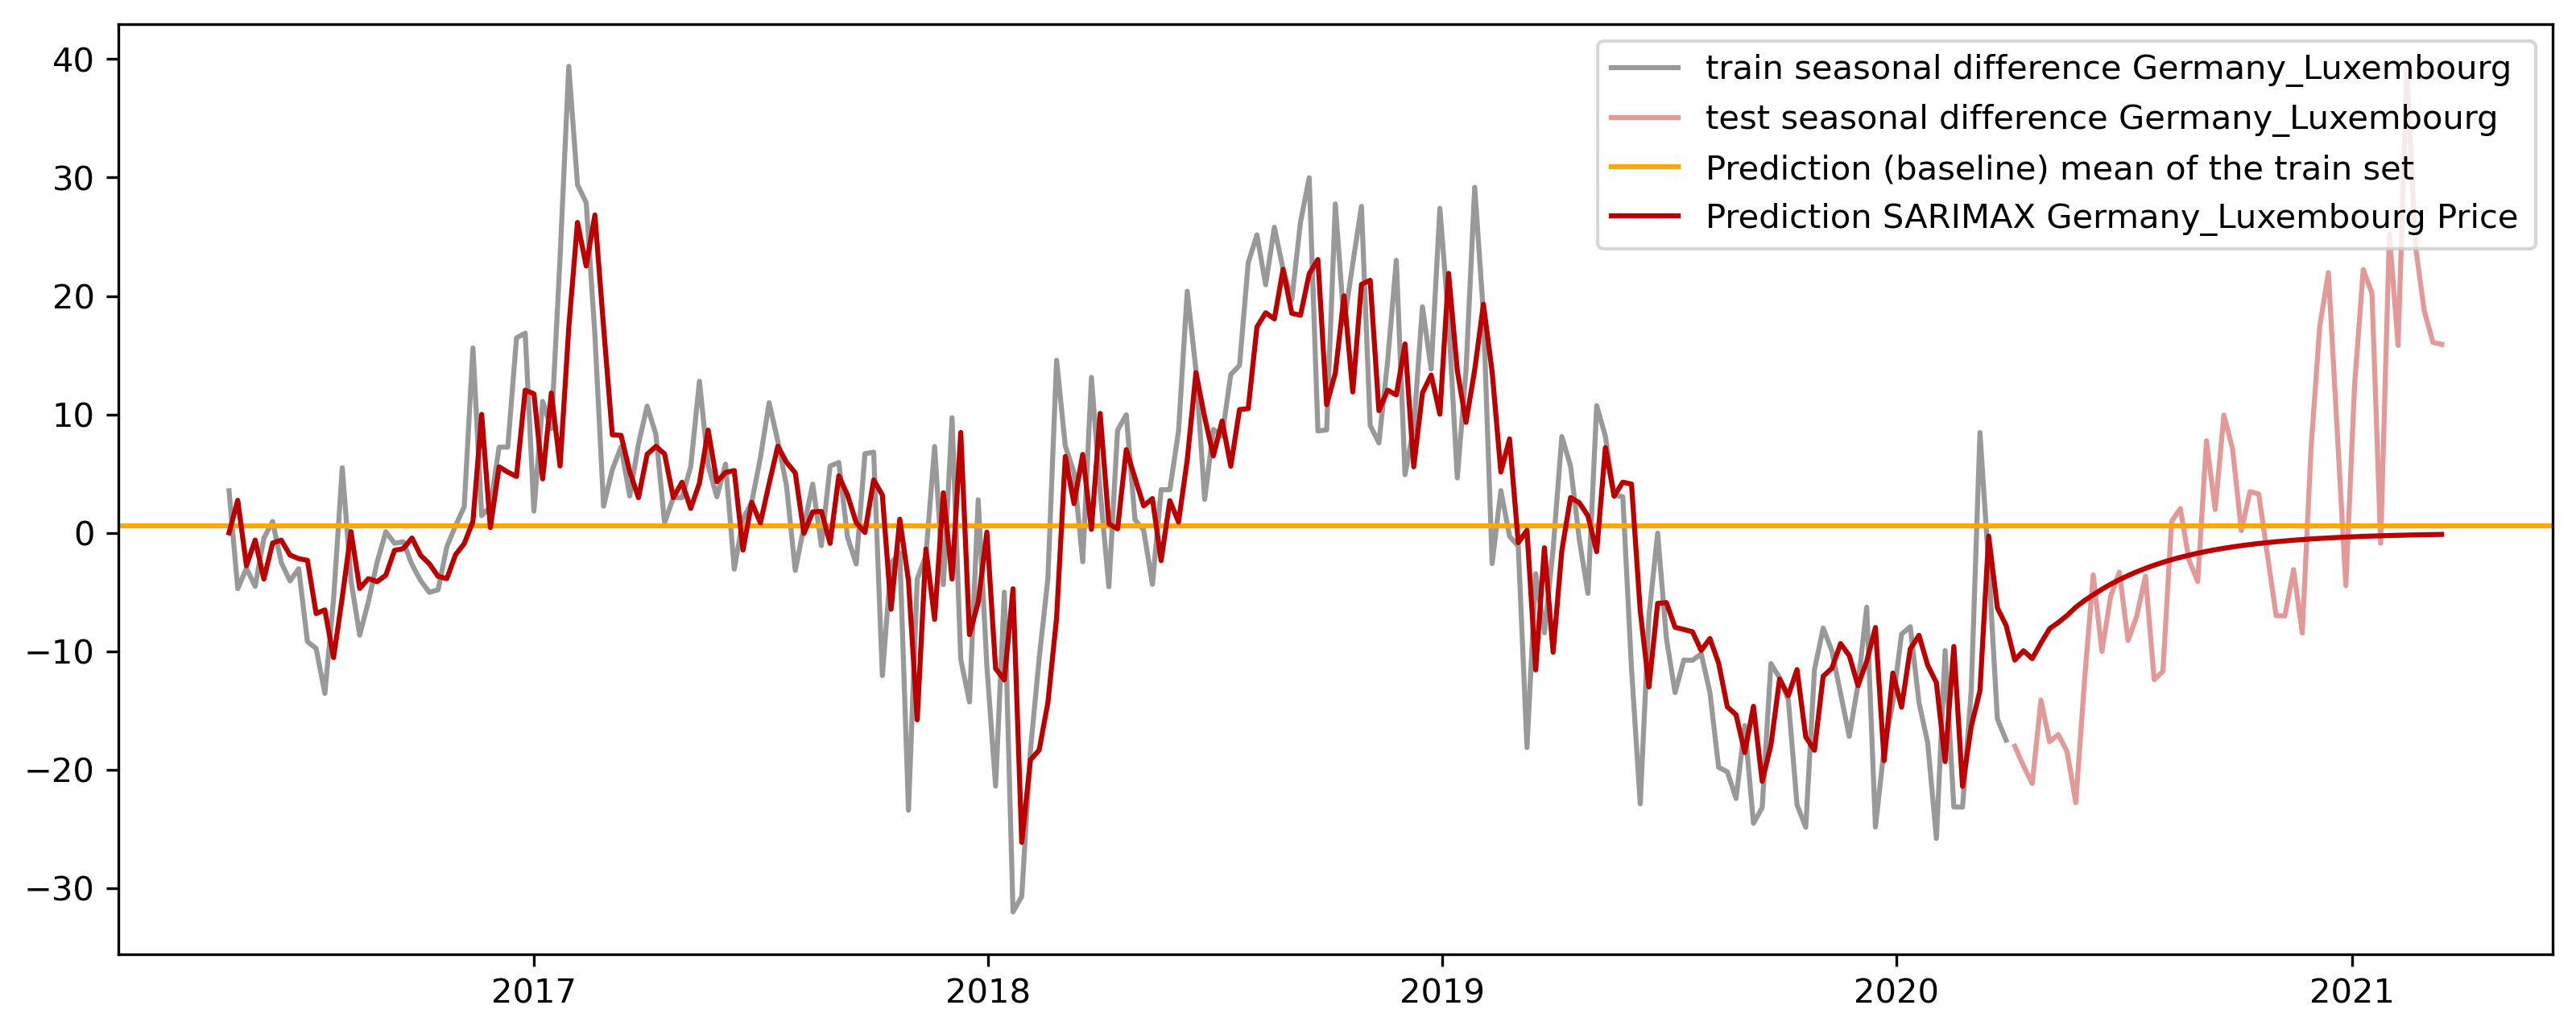

In [477]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(train['Seasonal_difference_adjusted'], label = 'train seasonal difference Germany_Luxembourg ', color = '#000000', alpha = 0.4)
plt.plot(test['Seasonal_difference_adjusted'], label = 'test seasonal difference Germany_Luxembourg', color = '#bc0000', alpha =.4)
plt.axhline(y= train['Seasonal_difference_adjusted'].mean(),xmax=0, xmin=100, label = 'Prediction (baseline) mean of the train set', color= '#ffa600')
plt.plot(predictions_SARIMAX, label = 'Prediction SARIMAX Germany_Luxembourg Price', color = '#bc0000')

plt.legend()
plt.show()

In [530]:
#TODO: why is the performance of the SARIMAX-model so bad?

train_mape_SARIMAX = mean_absolute_percentage_error(train['Seasonal_difference_adjusted'], predictions_SARIMAX[train_series.index])
test_mape_SARIMAX = mean_absolute_percentage_error(test['Seasonal_difference_adjusted'], predictions_SARIMAX[test_series.index])


print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")
print(f"Train MAPE SARIMAX on the difference: {round(train_mape_SARIMAX, 2)}%")
print(f"Test MAPE SARIMAX on the difference: {round(test_mape_SARIMAX, 2)}%")

Train MAPE on the difference: 117.94%
Test MAPE on the difference: 104.6%
Train MAPE SARIMAX on the difference: 263.89%
Test MAPE SARIMAX on the difference: 99.28%


#### MAPE Model evaluation 

Question for Miranda: how could the baseline be better than the SARIMAX in the train data? 


![alt text](image.png)


"where At is the actual value and Ft is the forecast value. Their difference is divided by the actual value At. The absolute value of this ratio is summed for every forecasted point in time and divided by the number of fitted points n." 

Source: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

Systematical approach

In [126]:
predictions_SARIMAX[train.index].mean()
Prices_GER_weekly_date_range_1['Germany_Luxembourg'].mean()

35.357135102222344

In [123]:
np.abs(((train_series-predictions_SARIMAX).dropna())/train_series).sum()


438.09124181122206

In [67]:
np.abs((train_series-1.5)/train_series).sum()

292.4336536900829

In [68]:
SARIMAX_wnan = (np.abs((train_series-predictions_SARIMAX)/train_series))
(np.abs((train_series-predictions_SARIMAX)/train_series))

2016-05-01    0.869810
2016-05-08    1.559434
2016-05-15    0.098893
2016-05-22    0.855795
2016-05-29    5.103222
                ...   
2021-03-14         NaN
2021-03-21         NaN
2021-03-28         NaN
2021-04-04         NaN
2021-04-11         NaN
Freq: W-SUN, Length: 259, dtype: float64

In [69]:
(np.abs((train_series-1.5)/train_series))

Start
2016-05-01    0.548511
2016-05-08    1.311449
2016-05-15    1.478115
2016-05-22    1.320986
2016-05-29    3.293829
                ...   
2020-03-01    1.103942
2020-03-08    0.829186
2020-03-15    1.478133
2020-03-22    1.088395
2020-03-29    1.079501
Freq: W-SUN, Name: Seasonal_difference, Length: 205, dtype: float64

In [70]:
(np.abs((train_series-predictions_SARIMAX)/train_series)).sum()

438.0912418112222

In [71]:
(np.abs((train_series-1.5)/train_series)).sum()

292.4336536900829

In [72]:
np.abs((train_series-predictions_SARIMAX)/train_series).sum()/len(train_series)*100

np.abs((train_series-1.5)/train_series).sum()/len(train_series)*100

142.6505627756502

In [73]:
(np.abs((train_series-predictions_SARIMAX)/len(train_series))).sum()


6.33021247145556

In [74]:
(np.abs((train_series-1.5)/len(train_series))).sum()

11.095866676345334

### Reconstruction


In [490]:
# we slice out the first 52 weeks and the rest of the dates
first_year_indices = Prices_GER_weekly_date_range_1.index[:52]
remaining_indices = Prices_GER_weekly_date_range_1.index[52:]



In [509]:
# create an empty restored column
Prices_GER_weekly_date_range_1['reconstructed'] = np.nan

# fill in the first 52 weeek values into the empty restored column
Prices_GER_weekly_date_range_1.loc[first_year_indices, 'reconstructed'] = Prices_GER_weekly_date_range_1.loc[first_year_indices, 'Germany_Luxembourg_adjusted']
# use the current difference value and 52-week lagged restored value to get the next restored value
for current_date in remaining_indices:
    current_value = Prices_GER_weekly_date_range_1.loc[current_date, 'Seasonal_difference_adjusted']
    print(current_value)
    print(current_date)
    year_before_restored = Prices_GER_weekly_date_range_1.loc[current_date - pd.DateOffset(weeks=52), 'reconstructed']
    print(year_before_restored)
    Prices_GER_weekly_date_range_1.loc[current_date, 'reconstructed'] = year_before_restored + current_value

    break


In [497]:

# check agreement everywhere (rounding errors can come up so check closeness rather than strict equality)
np.allclose(Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'], Prices_GER_weekly_date_range_1['reconstructed'])

True

In [519]:
# use the original train diff values and predicted test values
Prices_GER_weekly_date_range_1.loc[train.index, "AR_difference"] = Prices_GER_weekly_date_range_1.loc[train.index, 'Seasonal_difference_adjusted']
Prices_GER_weekly_date_range_1.loc[test.index, "AR_difference"] = predictions[test_series.index]


Germany_Luxembourg  Trend  Seasonal  Residual  Trend+Seasonal  \
Start                                                                       
2015-05-03           22.145694    NaN -9.850069       NaN             NaN   
2015-05-10           23.005893    NaN -9.838026       NaN             NaN   
2015-05-17           24.078571    NaN -4.818609       NaN             NaN   
2015-05-24           28.988155    NaN -4.607636       NaN             NaN   
2015-05-31           26.735714    NaN -5.921149       NaN             NaN   

            Germany_Luxembourg_adjusted  Trend_adjusted  Seasonal_adjusted  \
Start                                                                        
2015-05-03                    22.337800             NaN          -9.080243   
2015-05-10                    23.205460             NaN          -9.240643   
2015-05-17                    24.287443             NaN          -4.323569   
2015-05-24                    29.239615             NaN          -4.087723   
2015-05-31                    26.967636             NaN          -5.328697   

            Residual_adjusted  Trend+Seasonal_adjusted  Seasonal_difference  \
Start                                                                         
2015-05-03                NaN                      NaN                  NaN   
2015-05-10                NaN                      NaN                  NaN   
2015-05-17                NaN                      NaN                  NaN   
2015-05-24                NaN                      NaN                  NaN   
2015-05-31                NaN                      NaN                  NaN   

            Seasonal_difference_adjusted   restored  AR_difference  \
Start                                                                
2015-05-03                           NaN  22.337800            NaN   
2015-05-10                           NaN  23.205460            NaN   
2015-05-17                           NaN  24.287443            NaN   
2015-05-24                           NaN  29.239615            NaN   
2015-05-31                           NaN  26.967636            NaN   

            AR_restored  reconstructed  
Start                                   
2015-05-03    22.337800      22.337800  
2015-05-10    23.205460      23.205460  
2015-05-17    24.287443      24.287443  
2015-05-24    29.239615      29.239615  
2015-05-31    26.967636      26.967636

In [520]:
#TODO: why is it above the model? 
Prices_GER_weekly_date_range_1['AR_restored'] = np.nan

# fill in the first 12 original values into the empty restored column
Prices_GER_weekly_date_range_1.loc[first_year_indices, 'AR_restored'] = Prices_GER_weekly_date_range_1.loc[first_year_indices, 'Germany_Luxembourg_adjusted']

# use the current difference value and 12-month lagged restored value to get the next restored value
for current_date in remaining_indices:
    current_value = Prices_GER_weekly_date_range_1.loc[current_date, 'AR_difference']
    year_before_restored = Prices_GER_weekly_date_range_1.loc[current_date - pd.DateOffset(weeks=52), 'AR_restored']

    ## pd.DataOffset Question for Miranda
    
    Prices_GER_weekly_date_range_1.loc[current_date, 'AR_restored'] = year_before_restored + current_value



In [ ]:
train = Prices_GER_weekly_date_range_1[['Seasonal_difference_adjusted']].loc[Prices_GER_weekly_date_range_1.index <= "2020-04-01"].dropna()
test = Prices_GER_weekly_date_range_1[['Seasonal_difference_adjusted']].loc[Prices_GER_weekly_date_range_1.index > "2020-04-01"]

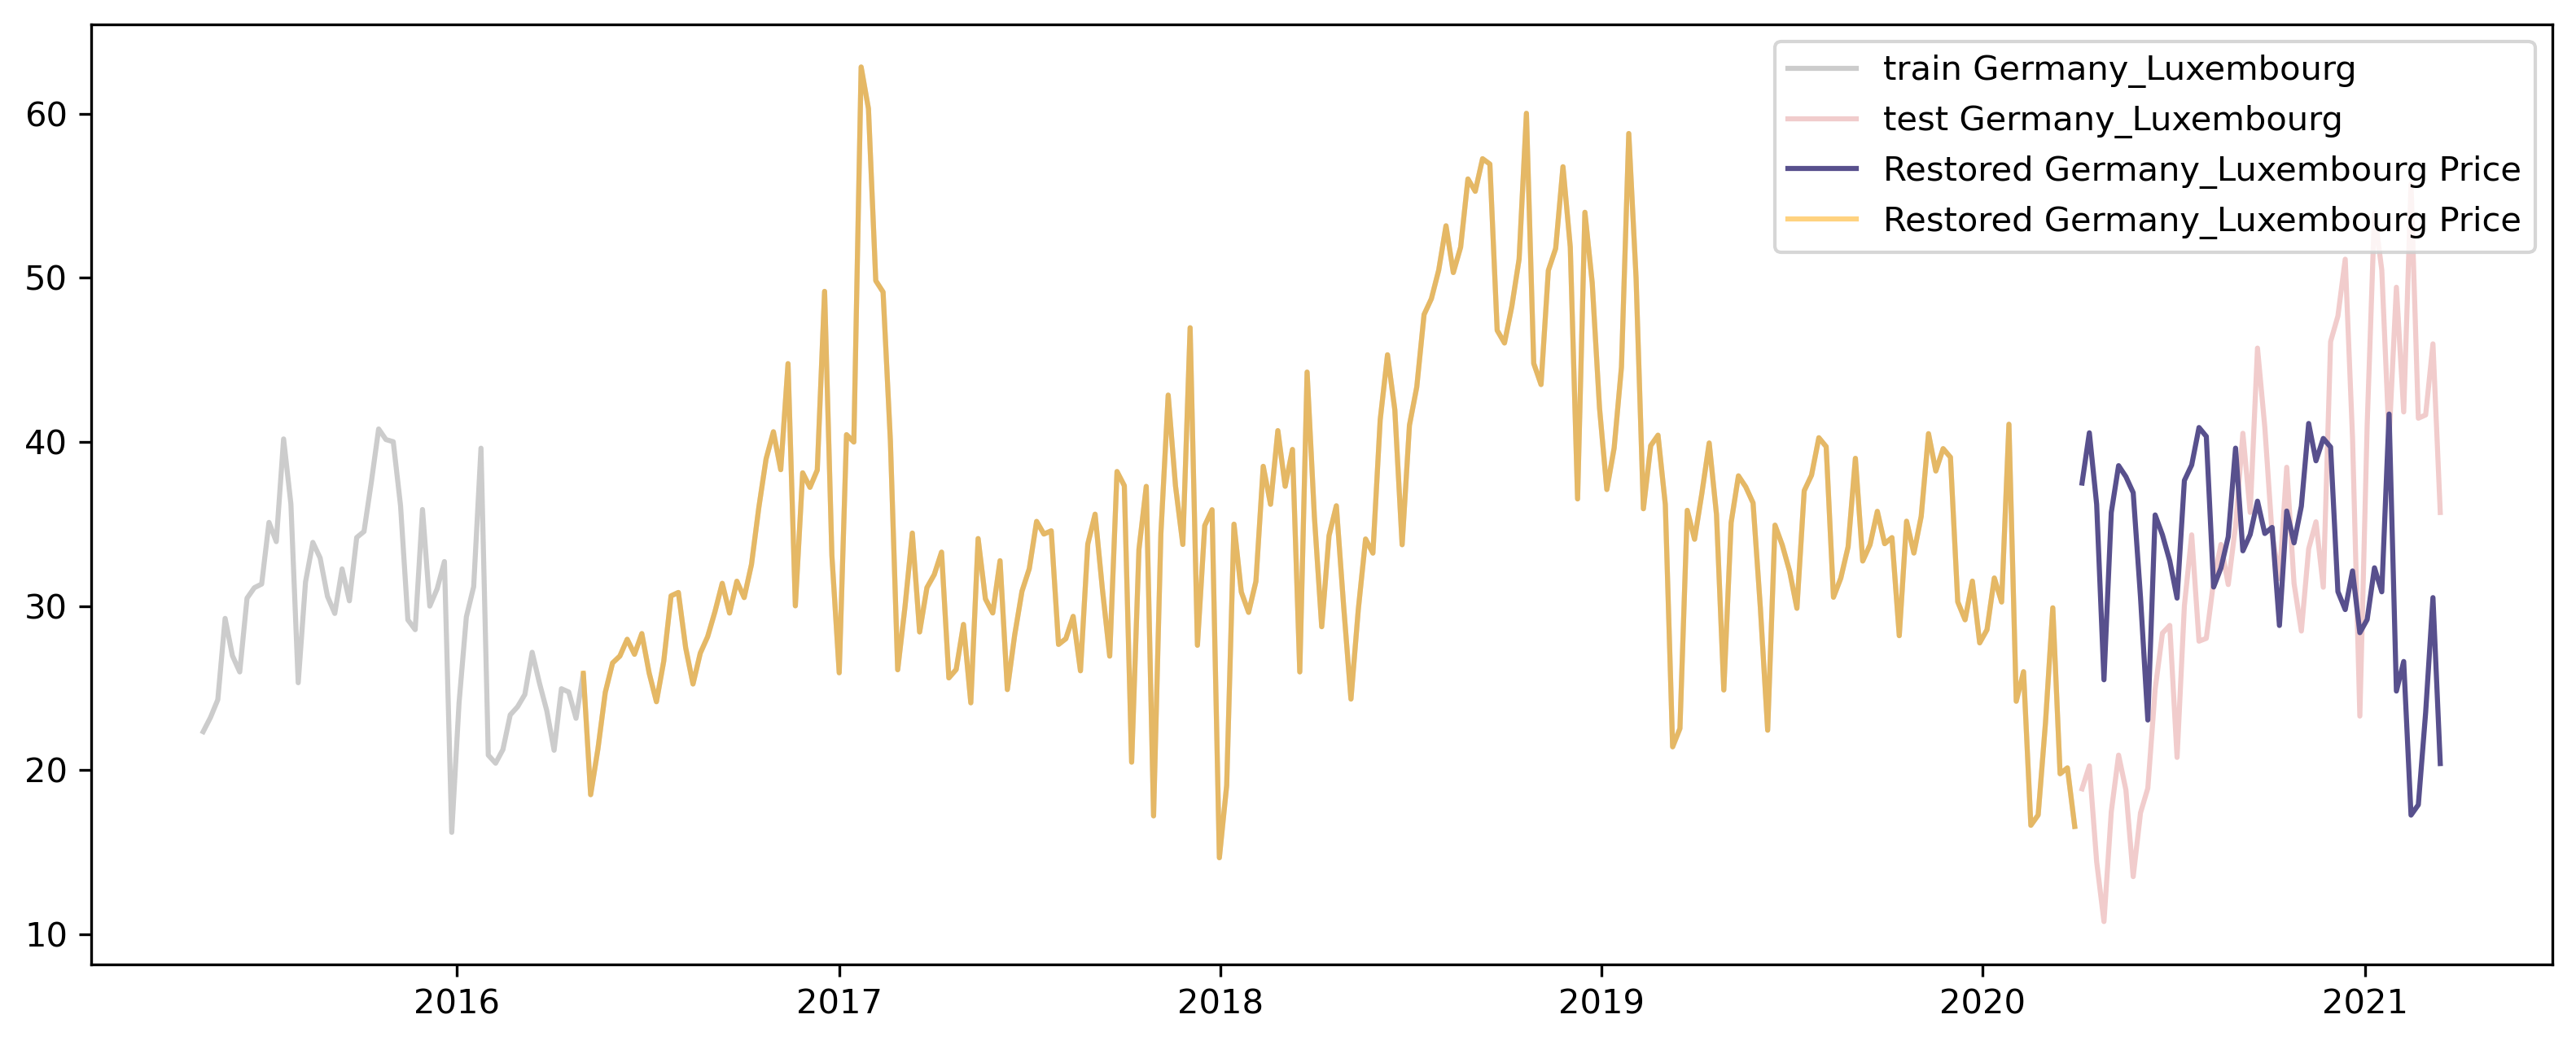

In [527]:
plt.figure(figsize= (13,5), dpi = 300)


plt.plot(Prices_GER_weekly_date_range_1.loc[Prices_GER_weekly_date_range_1.index <= '2020-04-01','Germany_Luxembourg_adjusted'], label = 'train Germany_Luxembourg ', color = '#000000', alpha = 0.2)
plt.plot(Prices_GER_weekly_date_range_1.loc[Prices_GER_weekly_date_range_1.index > '2020-04-01','Germany_Luxembourg_adjusted'], label = 'test Germany_Luxembourg', color = '#bc0000', alpha =.2)

#plt.plot(predictions_SARIMAX, label = 'Prediction SARIMAX Germany_Luxembourg Price', color = '#bc0000')
plt.plot(Prices_GER_weekly_date_range_1.loc[test.index, 'AR_restored'], label = 'Restored Germany_Luxembourg Price', color = '#58508d')
plt.plot(Prices_GER_weekly_date_range_1.loc[train.index, 'AR_restored'], label = 'Restored Germany_Luxembourg Price', color = '#ffa600', alpha =0.5)

plt.legend()
plt.show()

In [535]:
train_mape_RESTORED = mean_absolute_percentage_error(train_series, Prices_GER_weekly_date_range_1.loc[train.index, 'AR_restored'])
test_mape_RESTORED = mean_absolute_percentage_error(test_series, Prices_GER_weekly_date_range_1.loc[test.index, 'AR_restored'])


print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

print('------------------------------------------------------------------------------')

print(f"Train MAPE SARIMAX on the difference: {round(train_mape_SARIMAX, 2)}%")
print(f"Test MAPE SARIMAX on the difference: {round(test_mape_SARIMAX, 2)}%")

print('------------------------------------------------------------------------------')

print(f"Train MAPE RESTORED on the difference: {round(train_mape_RESTORED, 2)}%")
print(f"Test MAPE RESTORED on the difference: {round(test_mape_RESTORED, 2)}%")

Train MAPE on the difference: 117.94%
Test MAPE on the difference: 104.6%
------------------------------------------------------------------------------
Train MAPE SARIMAX on the difference: 263.89%
Test MAPE SARIMAX on the difference: 99.28%
------------------------------------------------------------------------------
Train MAPE RESTORED on the difference: 1746.19%
Test MAPE RESTORED on the difference: 1023.29%
